# ------------------------SECOM USING MACHINE LEARNING WITH PYTHON--------------------------

In [2]:
import warnings
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### IMPORTING DATA

In [4]:
data = pd.read_csv('uci-secom.csv')

In [5]:
data.head()

Time        0        1        2        3     4       5  \
0  2008-07-19 11:55:00 3030.930 2564.000 2187.733 1411.127 1.360 100.000   
1  2008-07-19 12:32:00 3095.780 2465.140 2230.422 1463.661 0.829 100.000   
2  2008-07-19 13:17:00 2932.610 2559.940 2186.411 1698.017 1.510 100.000   
3  2008-07-19 14:43:00 2988.720 2479.900 2199.033  909.793 1.320 100.000   
4  2008-07-19 15:22:00 3032.240 2502.870 2233.367 1326.520 1.533 100.000   

        6     7     8      9     10    11      12    13     14      15     16  \
0  97.613 0.124 1.500  0.016 -0.003 0.946 202.440 0.000  7.956 414.871 10.043   
1 102.343 0.125 1.497 -0.001 -0.015 0.963 200.547 0.000 10.155 414.735  9.260   
2  95.488 0.124 1.444  0.004  0.001 0.962 202.018 0.000  9.516 416.707  9.314   
3 104.237 0.122 1.488 -0.012 -0.003 0.963 201.848 0.000  9.605 422.289  9.692   
4 100.397 0.123 1.503 -0.003 -0.007 0.957 201.942 0.000 10.566 420.592 10.339   

     17      18     19    20        21       22        23        24    25  \
0 0.968 192.396 12.519 1.403 -5419.000 2916.500 -4043.750   751.000 0.895   
1 0.970 191.287 12.461 1.383 -5441.500 2604.250 -3498.750 -1640.250 1.297   
2 0.967 192.703 12.540 1.412 -5447.750 2701.750 -4047.000 -1916.500 1.312   
3 0.969 192.156 12.478 1.401 -5468.250 2648.250 -4515.000 -1657.250 1.314   
4 0.974 191.604 12.473 1.389 -5476.250 2635.250 -3987.500   117.000 1.289   

     26    27     28    29    30    31     32    33     34     35     36  \
0 1.773 3.049 64.233 2.022 0.163 3.519 83.397 9.513 50.617 64.259 49.383   
1 2.014 7.390 68.422 2.267 0.210 3.417 84.905 9.800 50.660 64.283 49.340   
2 2.030 7.579 67.133 2.333 0.173 3.599 84.757 8.659 50.153 64.111 49.847   
3 2.004 7.314 62.933 2.644 0.207 3.381 84.910 8.679 50.510 64.112 49.490   
4 1.991 7.275 62.833 3.156 0.270 3.273 86.327 8.768 50.248 64.151 49.752   

      37     38      39     40    41     42      43     44      45      46  \
0 66.314 86.956 117.513 61.290 4.515 70.000 352.717 10.184 130.369 723.309   
1 64.919 87.524 118.119 78.250 2.773 70.000 352.245 10.037 133.173 724.826   
2 65.839 84.733 118.613 14.370 5.434 70.000 364.378  9.878 131.803 734.792   
3 65.195 86.687 117.044 76.900 1.279 70.000 363.027  9.931 131.803 733.878   
4 66.154 86.147 121.436 76.390 2.209 70.000 353.340 10.409 176.314 789.752   

     47      48    49      50      51    52    53    54       55    56    57  \
0 1.307 141.228 1.000 624.314 218.317 0.000 4.592 4.841 2834.000 0.932 0.948   
1 1.289 145.845 1.000 631.262 205.169 0.000 4.590 4.842 2853.000 0.932 0.948   
2 1.299 141.084 1.000 637.265 185.757 0.000 4.486 4.748 2936.000 0.914 0.945   
3 1.303 142.543 1.000 637.373 189.908 0.000 4.486 4.748 2936.000 0.914 0.945   
4 1.034 138.088 1.000 667.742 233.549 0.000 4.624 4.894 2865.000 0.930 0.945   

     58      59      60     61      62     63     64     65      66    67  \
0 4.706  -1.726 350.926 10.623 108.643 16.145 21.726 29.537 693.772 0.923   
1 4.682   0.807 352.007 10.309 113.980 10.904 19.193 27.630 697.196 1.160   
2 4.587  23.825 364.536 10.168 115.627 11.302 16.175 24.283 710.510 0.869   
3 4.587  24.379 361.458 10.211 116.182 13.560 15.621 23.474 710.404 0.976   
4 4.641 -12.294 355.081  9.795 144.019 21.978 32.294 44.150 745.602 0.926   

       68    69      70     71      72      73    74     75     76     77  \
0 148.601 1.000 608.170 84.079     NaN     NaN 0.000  0.013 -0.021  0.014   
1 154.371 1.000 620.358 82.349     NaN     NaN 0.000 -0.004 -0.020  0.000   
2 145.800 1.000 625.964 84.768 140.697 485.267 0.000 -0.008 -0.033 -0.005   
3 147.655 1.000 625.294 70.229 160.321 464.974 0.000 -0.056 -0.046 -0.040   
4 146.664 1.000 645.764 65.842     NaN     NaN 0.000 -0.053  0.018 -0.017   

      78     79     80     81     82    83    84  85    86    87       88  \
0 -0.031 -0.008 -0.003 -0.057 -0.004 7.216 0.132 NaN 2.389 0.969 1747.605   
1 -0.044 -0.036 -0.012 -0.038  0.002 6.804 0.136 NaN 2.375 0.989 1931.646   
2  0.021 -0.005 -0.113 -0.018  0.029 7.104 0.13

# ------------------------------------EXPLORING THE DATASET-----------------------------------------

### check the shape of the dataset

In [8]:
data.shape

(1567, 592)

### check the columns present in the dataset

In [10]:
data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

### check the data types of each column

In [12]:
#data.dtypes

### check for the missing values

In [14]:
#data.isnull().sum()
#round(100 * data.isnull().sum() / data.shape[0], 2)

<Axes: title={'center': 'Missing values w.r.t each column'}>

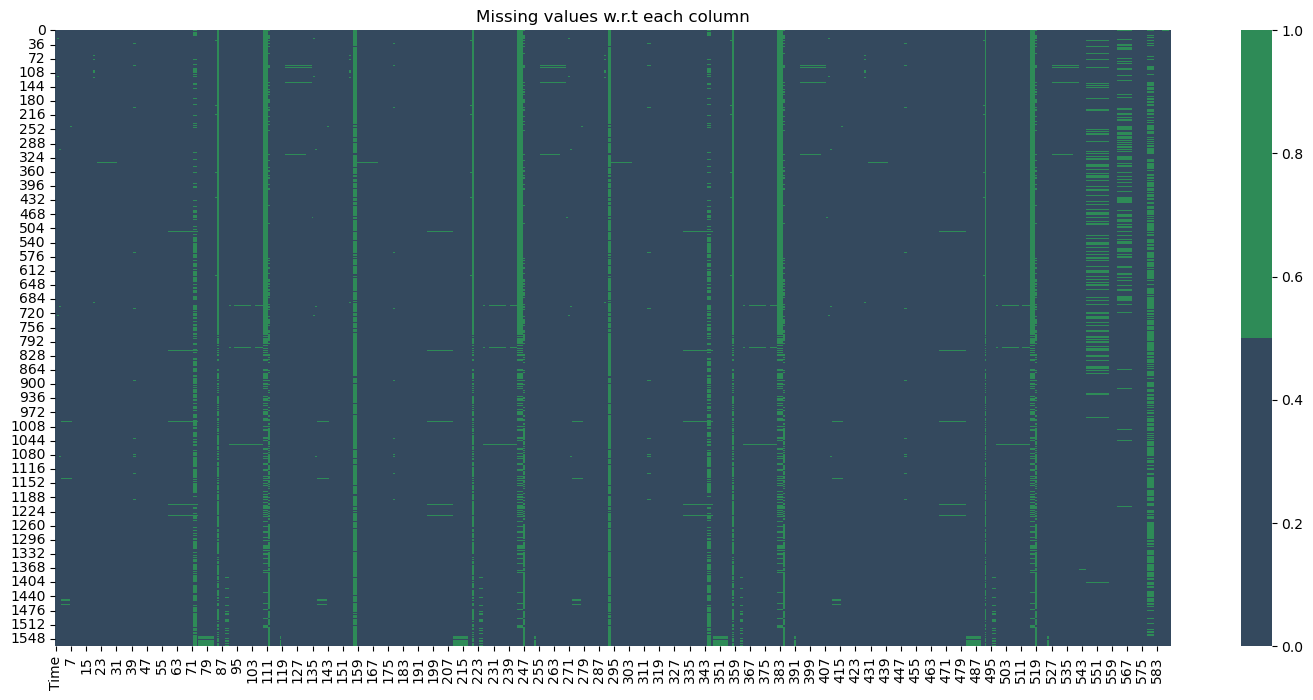

In [15]:
plt.figure(figsize=(18,8))
plt.title('Missing values w.r.t each column')
colours = ['#34495E', 'seagreen'] 
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

### check for the duplicated data

In [17]:
data.duplicated().sum()

0

### check the statistics of the data

In [19]:
#data.describe().T

### check the information of data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


### check the number of numerical and categorical features

In [23]:
numerical_columns = data.select_dtypes(include=['float', 'int']).columns

categorical_columns = data.select_dtypes(include=['object']).columns

In [24]:
len(numerical_columns)

591

In [25]:
len(categorical_columns)

1

# -------------------------------------------DATA CLEANING----------------------------------------------

### Removing missing values having more than 20% and imputing the remaining with mean of the individual features

In [28]:
for feature in data.select_dtypes(include = ['float64']).columns:
    
    null_percentage = (data[feature].isnull().sum() / data.shape[0])

    if null_percentage > 0.2:
        data.drop(feature, axis = 1, inplace = True)

    elif null_percentage:
        data[feature].fillna(data[feature].mean(), inplace = True)
        

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 560 entries, Time to Pass/Fail
dtypes: float64(558), int64(1), object(1)
memory usage: 6.7+ MB


In [30]:
data.shape

(1567, 560)

### Features with zero standard deviation

In [32]:
no_std_cols = [feature for feature in data.select_dtypes(include=['float64']).columns if data[feature].std() == 0]

#data[no_std_cols].describe().T

In [33]:
data[no_std_cols].shape

(1567, 116)

### Dropping the features that has zero standard deviation

In [35]:
data.drop(no_std_cols, axis = 1, inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 444 entries, Time to Pass/Fail
dtypes: float64(442), int64(1), object(1)
memory usage: 5.3+ MB


In [36]:
data.shape

(1567, 444)

In [37]:
data['Time'] = pd.to_datetime(data['Time'])

### Features with weak correlation(<0.05) w.r.t target feature

In [39]:
corr_features = abs(data.corr()['Pass/Fail'])
weak_corr_features = corr_features[corr_features < 0.05]

len(weak_corr_features)

360

### Dropping all the weak correlation features(<0.05) since they do not much effect the target feature

In [41]:
data.drop(list(weak_corr_features.index), axis = 1, inplace = True)

In [42]:
data.shape

(1567, 84)

In [43]:
#data.info()

### Features with high correlation(>0.95) w.r.t each other

In [45]:
corr_features = []
data_corr_df = data.select_dtypes(include = ['float64']).corr()
for i in range(len(data_corr_df.columns)):
    for j in range(i+1, len(data_corr_df.columns)):
        if abs(data_corr_df.iloc[i, j]) > 0.95:
            corr_features.append(data_corr_df.columns[j])

In [46]:
#remove duplicate entries
corr_features = list(set(corr_features))
corr_features

['300',
 '469',
 '249',
 '557',
 '477',
 '298',
 '455',
 '127',
 '436',
 '299',
 '319',
 '295',
 '437',
 '554',
 '294',
 '387',
 '435',
 '165',
 '575',
 '452']

### Dropping the high correlated(>0.95) features from the dataset

In [48]:
data.drop(corr_features, axis = 1, inplace = True)

In [49]:
data.shape

(1567, 64)

# --------------------------------DATA ANALYSIS & VISUALIZATION-------------------------------------

In [51]:
data.head()

14        21       22    26     28     32    33     38     40    56  \
0  7.956 -5419.000 2916.500 1.773 64.233 83.397 9.513 86.956 61.290 0.932   
1 10.155 -5441.500 2604.250 2.014 68.422 84.905 9.800 87.524 78.250 0.932   
2  9.516 -5447.750 2701.750 2.030 67.133 84.757 8.659 84.733 14.370 0.914   
3  9.605 -5468.250 2648.250 2.004 62.933 84.910 8.679 86.687 76.900 0.914   
4 10.566 -5476.250 2635.250 1.991 62.833 86.327 8.768 86.147 76.390 0.930   

     58      59     63     64     65      68      70     76     79       90  \
0 4.706  -1.726 16.145 21.726 29.537 148.601 608.170 -0.021 -0.008 8671.930   
1 4.682   0.807 10.904 19.193 27.630 154.371 620.358 -0.020 -0.036 8407.030   
2 4.587  23.825 11.302 16.175 24.283 145.800 625.964 -0.033 -0.005 9317.170   
3 4.587  24.379 13.560 15.621 23.474 147.655 625.294 -0.046  0.068 8205.700   
4 4.641 -12.294 21.978 32.294 44.150 146.664 645.764  0.018  0.003 9014.460   

      95    100    103   114    121   122    123    124   125   126    129  \
0  0.000  0.000 -0.004 0.000 15.880 2.639 15.940 15.930 0.866 3.353 -0.047   
1  0.000 -0.000 -0.004 0.000 15.880 2.541 15.910 15.880 0.870 2.771 -0.095   
2  0.000  0.001 -0.003 0.000 15.900 2.882 15.940 15.950 0.880 3.094 -0.189   
3  0.000 -0.000 -0.006 0.000 15.550 3.132 15.610 15.590 1.366 2.480  0.284   
4 -0.000  0.000 -0.004 0.000 15.750 3.148 15.730 15.710 0.946 3.027 -0.568   

    130      133      159     160   163   164   166    180    183   196  \
0 0.724 1000.726 1017.000 967.000 0.090 0.048 2.000 20.950 16.713 5.380   
1 0.812  998.108  568.000  59.000 0.112 0.115 2.200 17.990 16.358 3.740   
2 0.819  998.444  562.000 788.000 0.187 0.117 2.100 17.780 22.912 5.090   
3 0.724  980.451  859.000 355.000 0.068 0.108 1.700 16.220 22.562 5.920   
4 0.778  993.127  699.000 283.000 0.147 0.040 3.900 15.240 37.715 5.520   

     197    199    200    205   210   280   316   337   348   365    430  \
0 20.100 10.620 10.300  8.640 0.077 0.020 6.270 1.599 0.021 0.017 18.767   
1 19.590 11.650  8.020  8.960 0.057 0.017 5.652 1.151 0.014 0.005 10.438   
2 19.750  9.710 16.730 13.300 0.034 0.015 5.725 1.548 0.011 0.005 10.316   
3 23.600 10.630 13.560  9.560 0.125 0.011 5.444 1.732 0.041 0.005 15.709   
4 15.760 10.710 19.770  9.090 0.091 0.012 4.896 1.622 0.025 0.006 12.764   

     431    434    460     468    471     510     511   542   543    551  \
0 33.156 10.050 29.939 311.638  9.775  64.671   0.000 0.110 0.008  0.780   
1  2.265  8.634 40.447 463.288 10.221 141.436   0.000 0.110 0.008  1.330   
2 29.166 14.250 32.359  21.364  8.398 240.777 244.275 0.110 0.008  0.850   
3 13.405  5.176 27.682  24.283  9.149 113.559   0.000 0.110 0.008 39.330   
4 10.739 11.406 30.892  44.898  7.436 148.066   0.000 0.110 0.008  1.980   

    573  Pass/Fail  
0 0.316         -1  
1 0.265         -1  
2 0.188          1  
3 0.174         -1  
4 0.222         -1

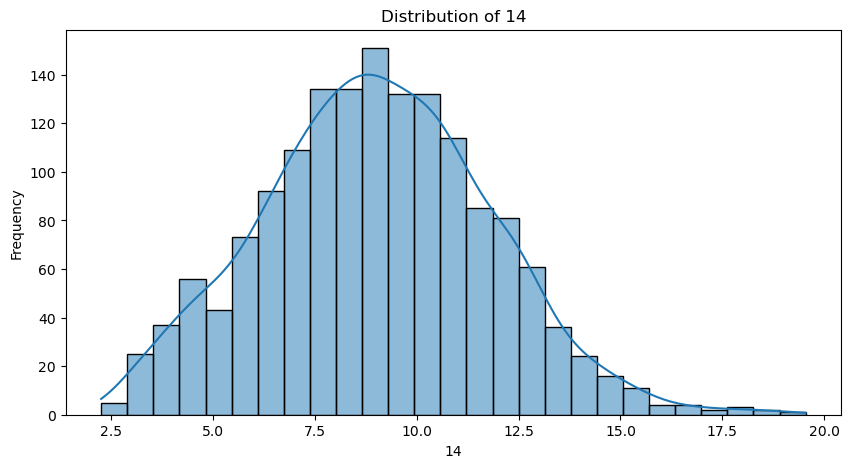

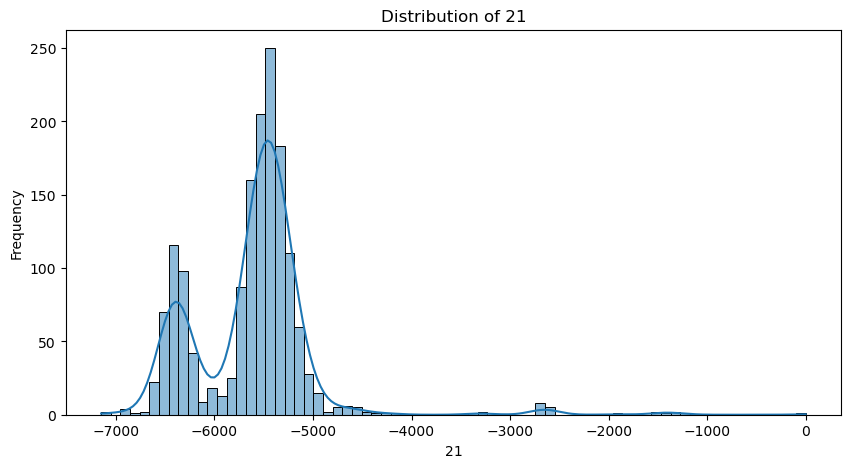

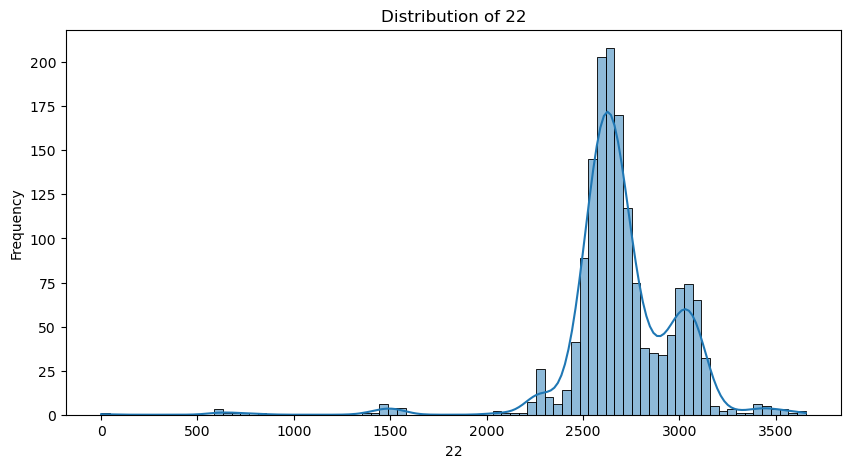

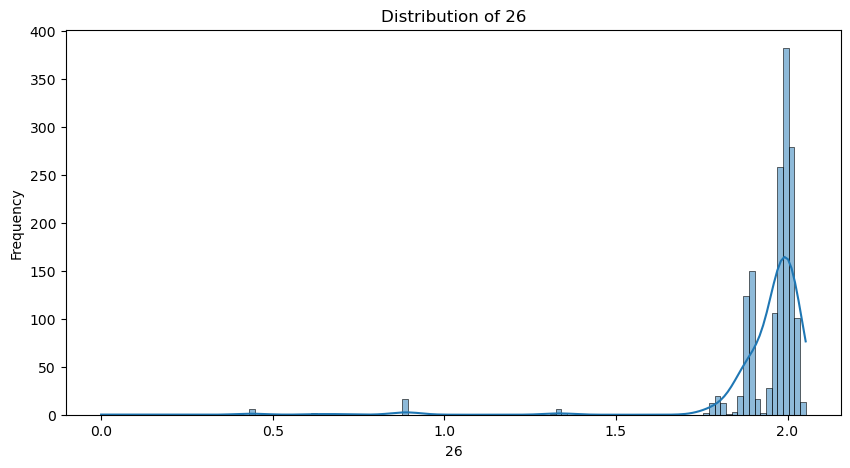

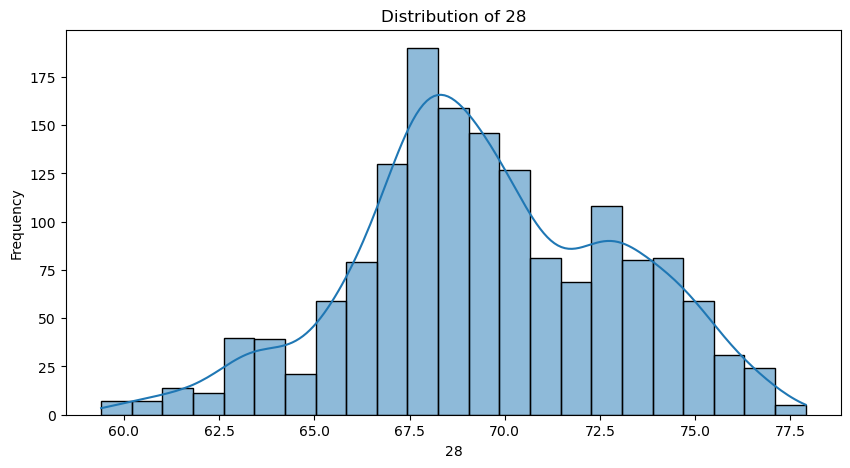

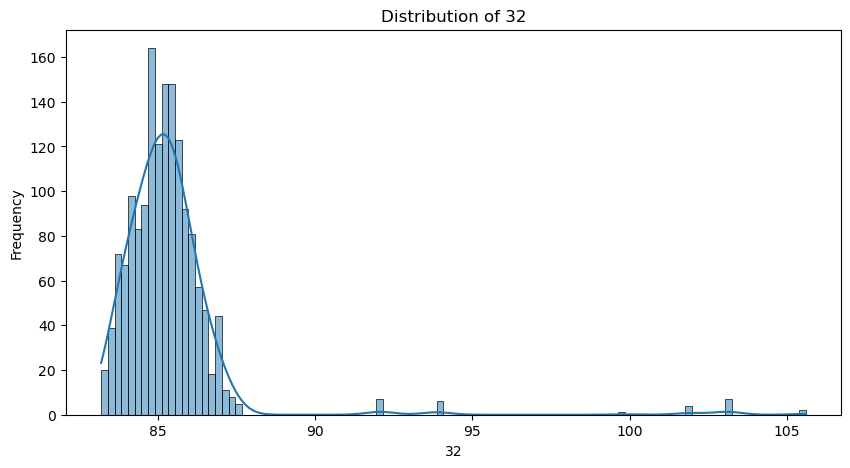

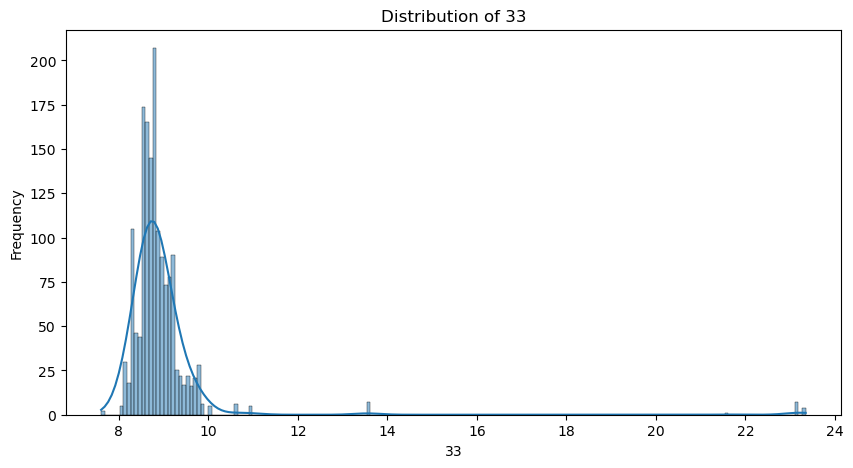

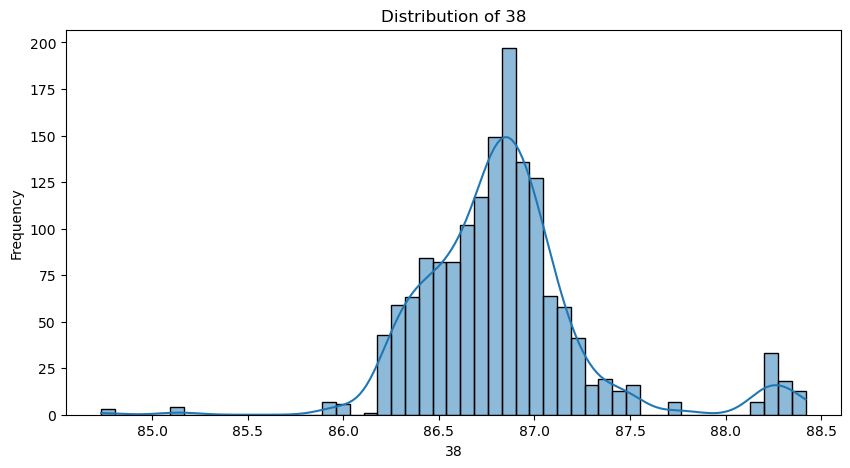

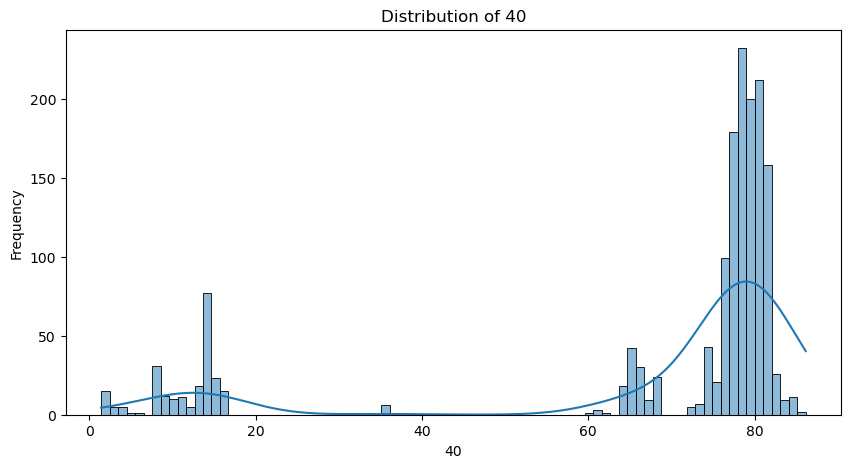

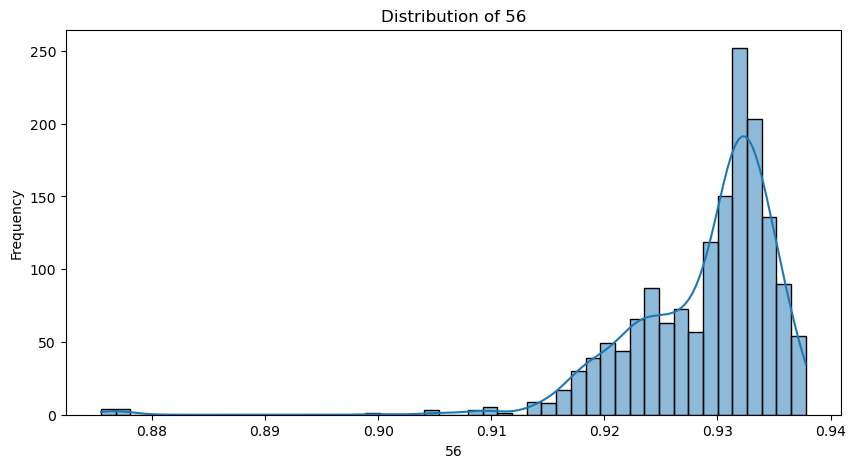

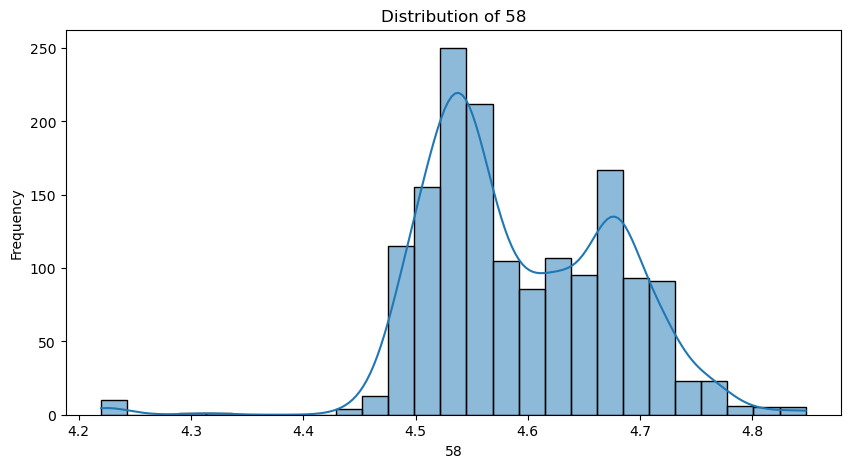

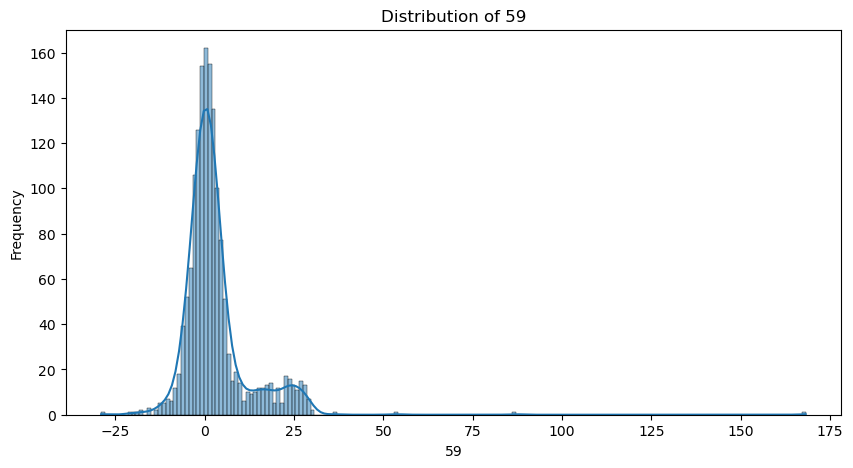

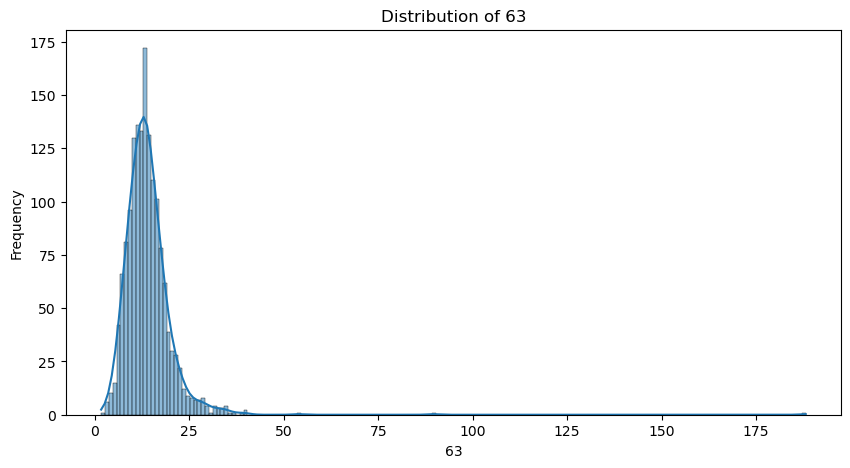

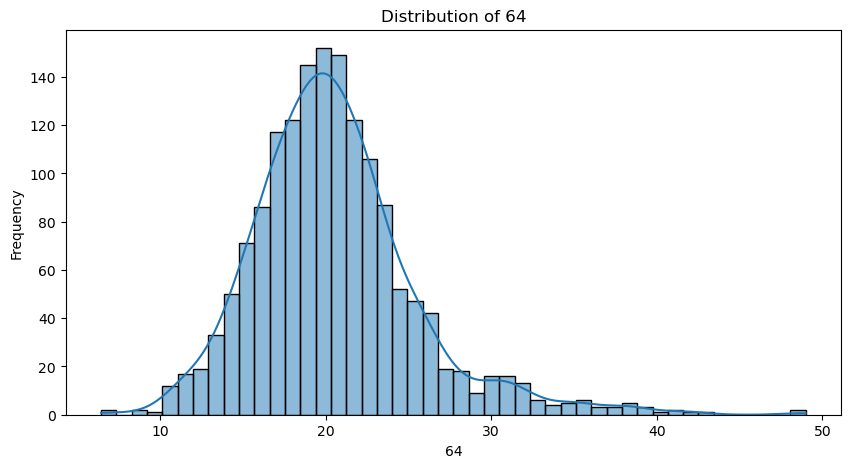

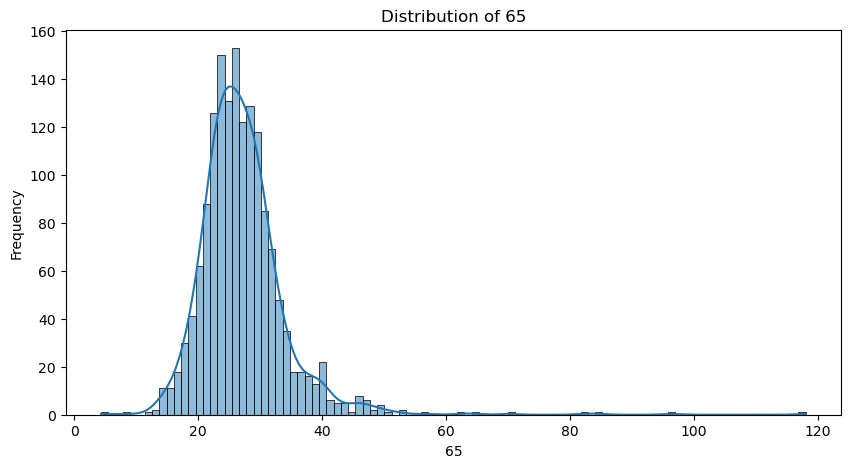

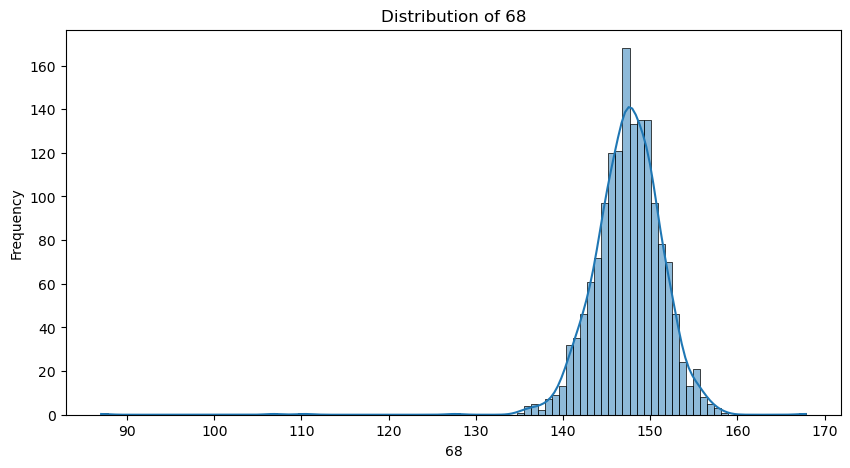

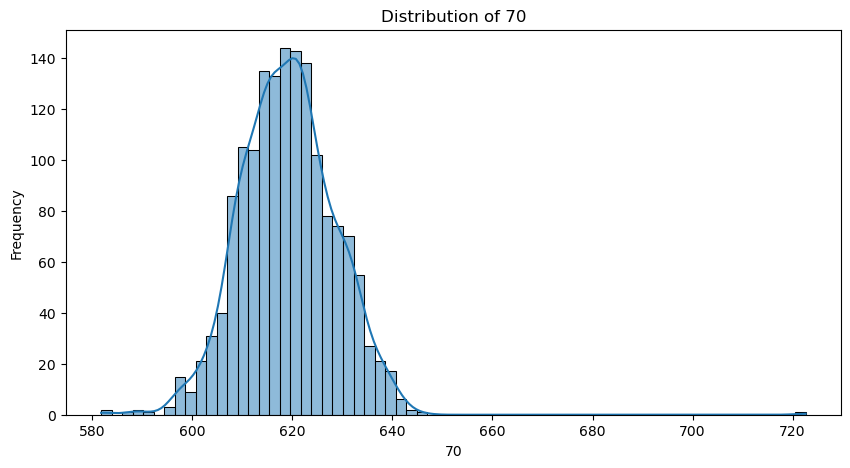

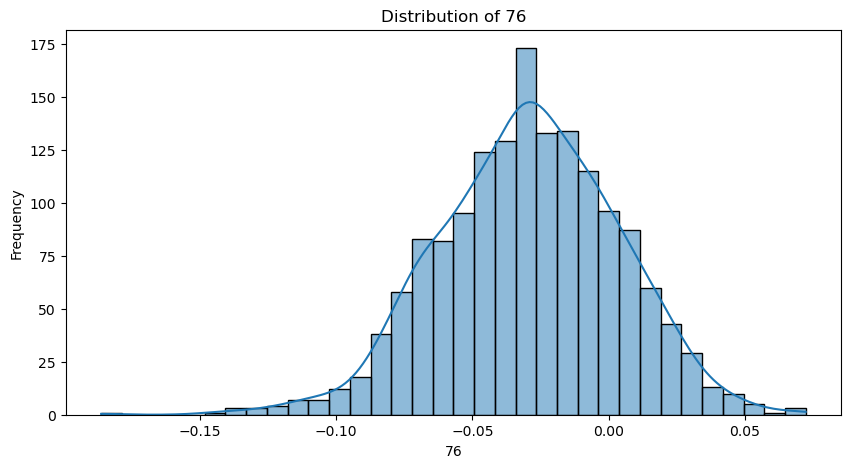

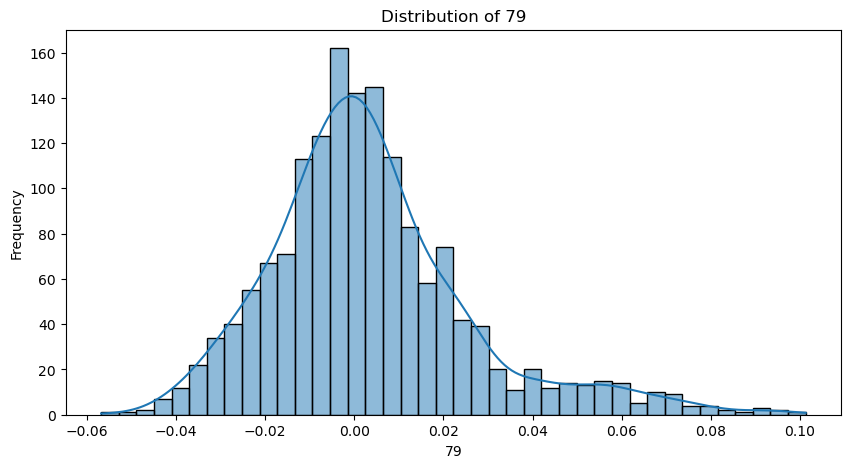

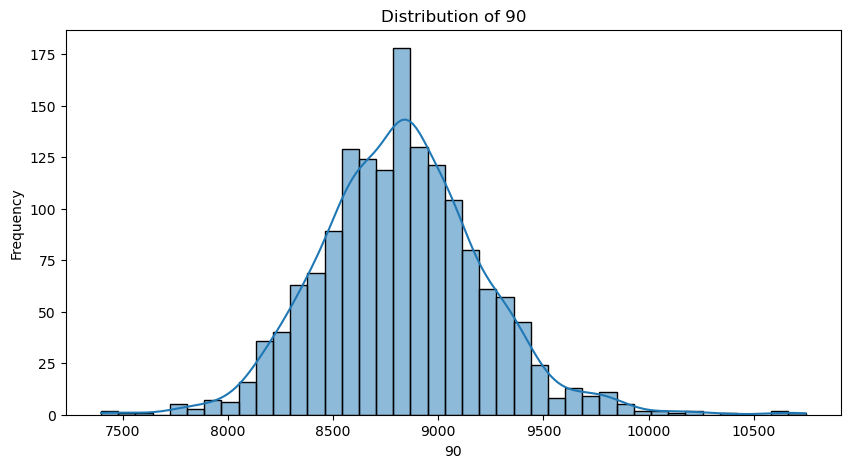

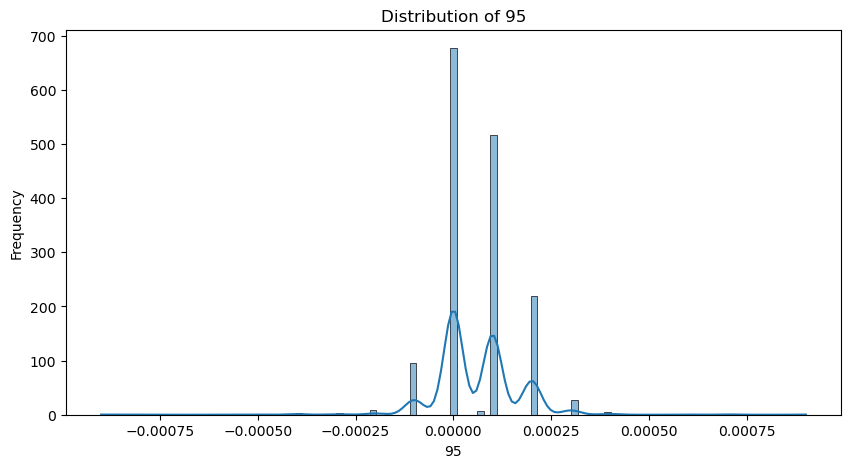

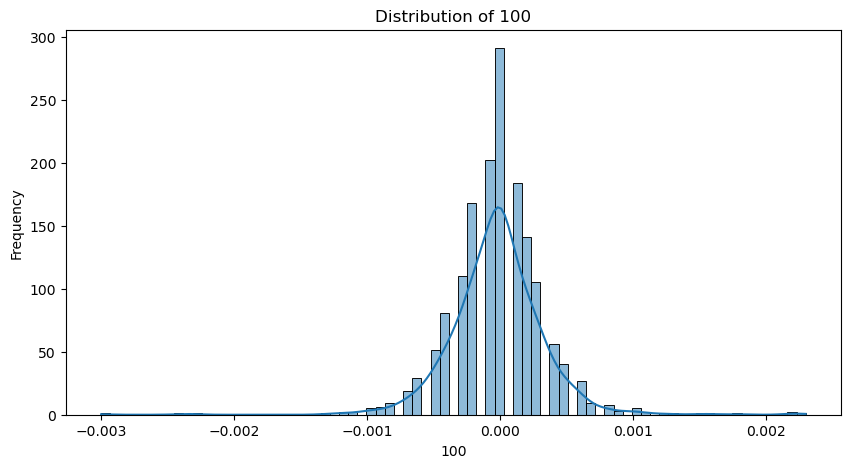

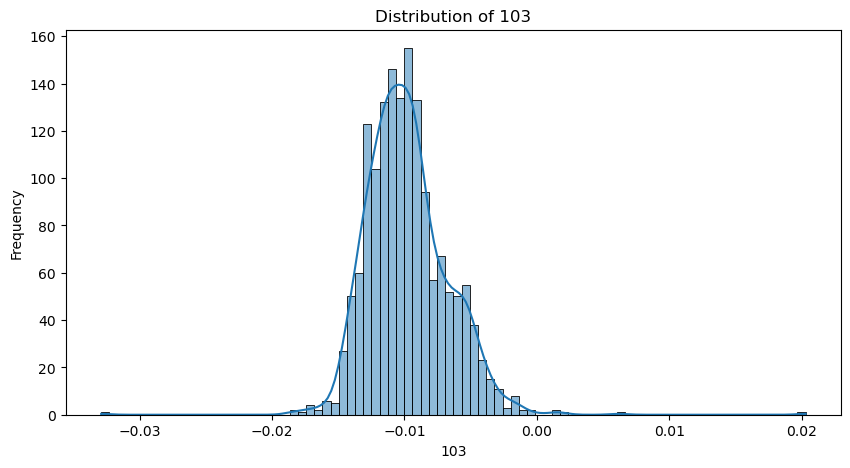

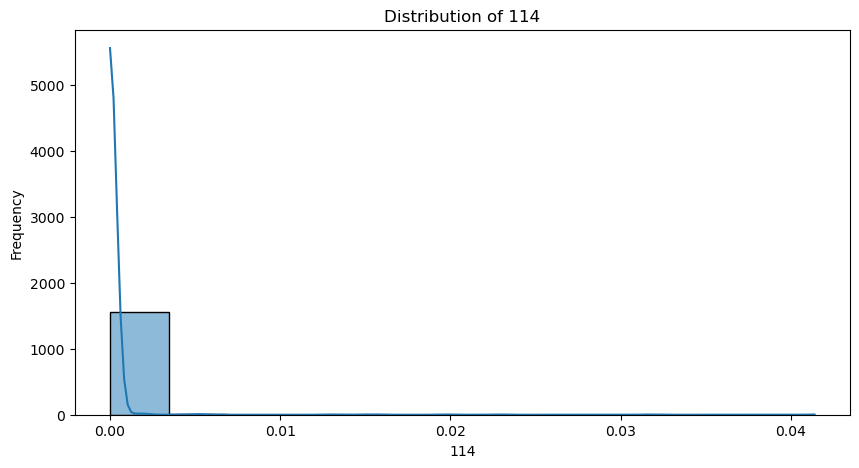

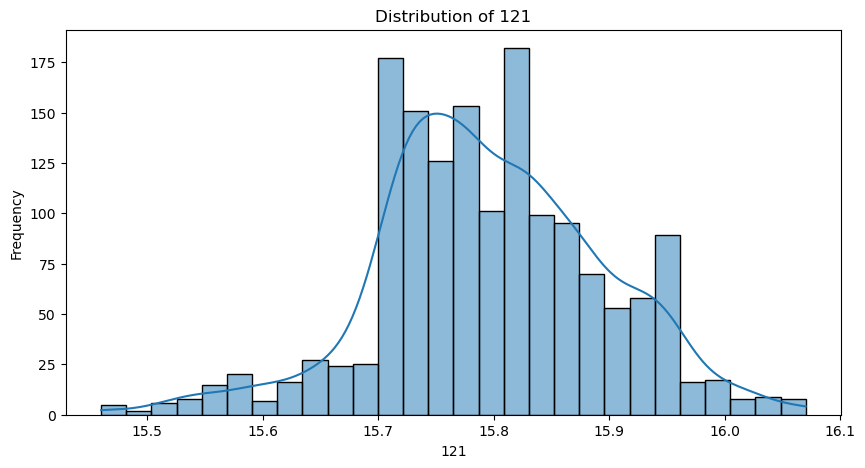

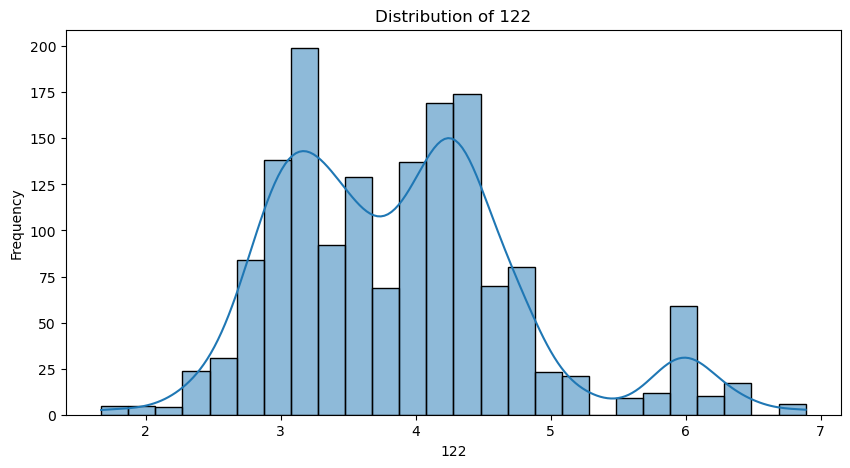

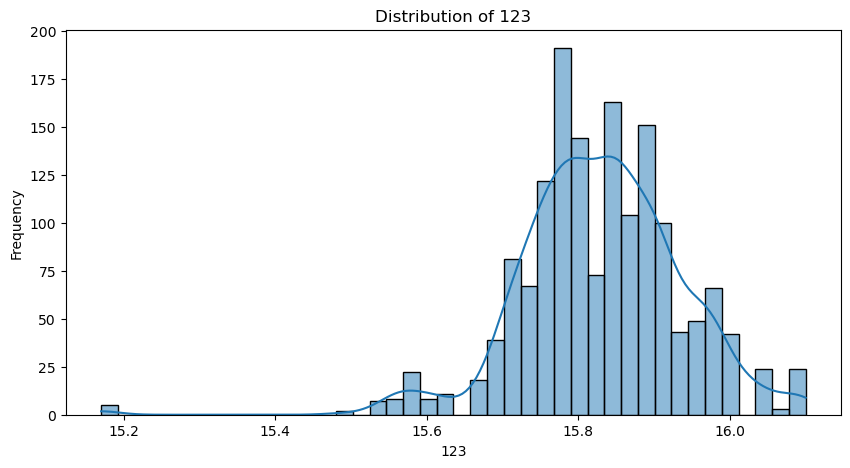

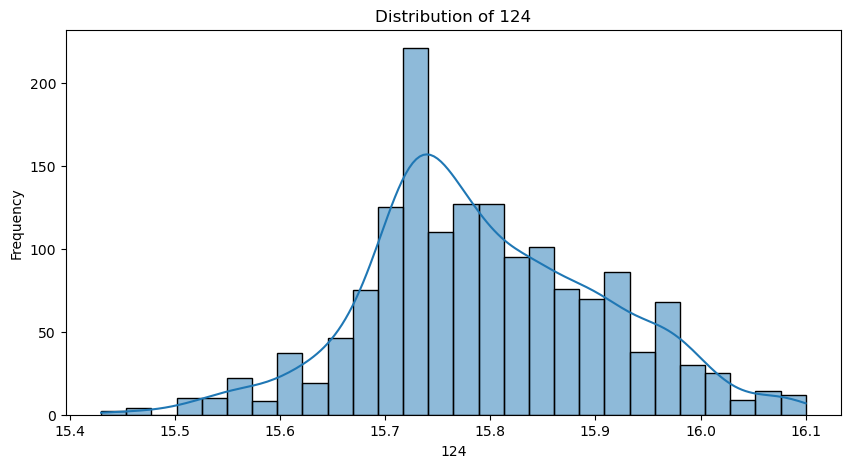

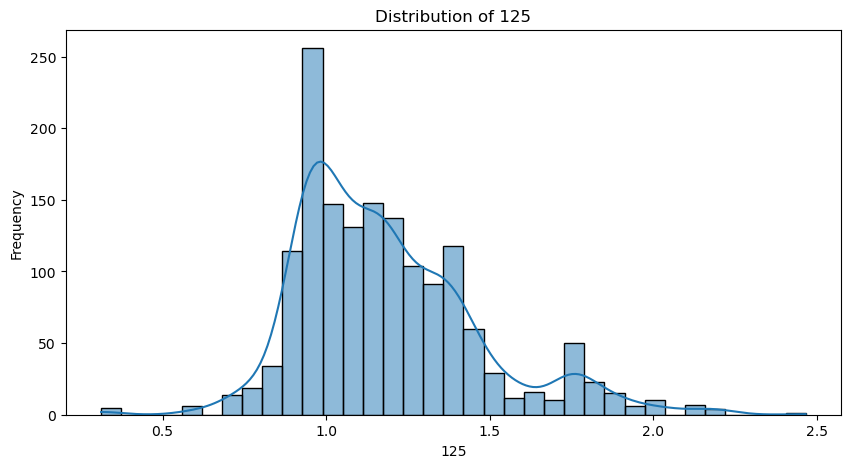

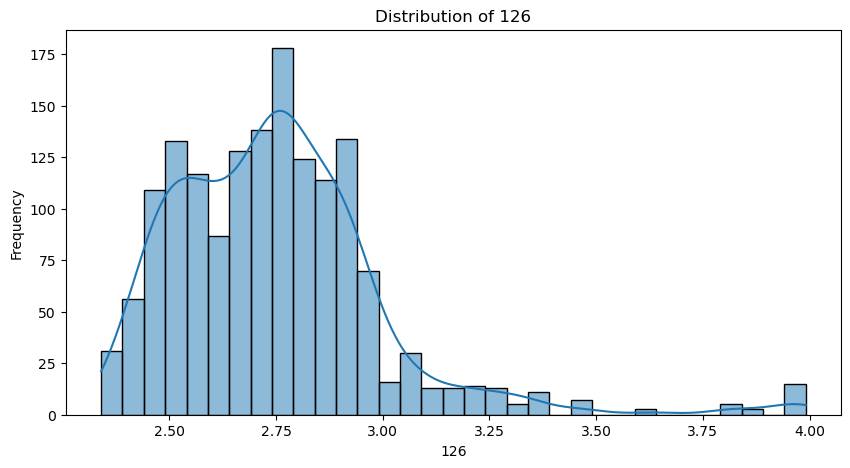

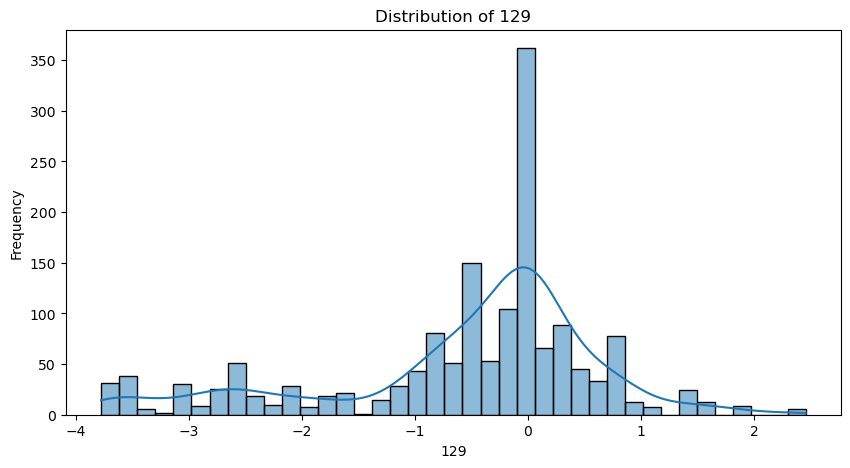

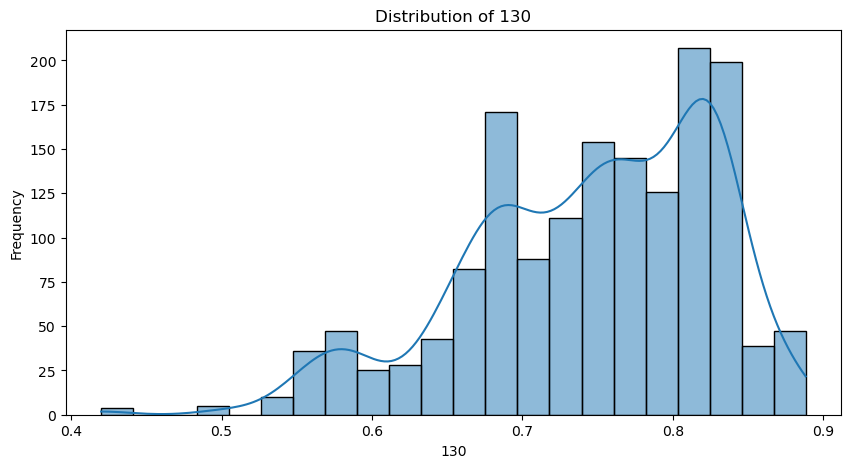

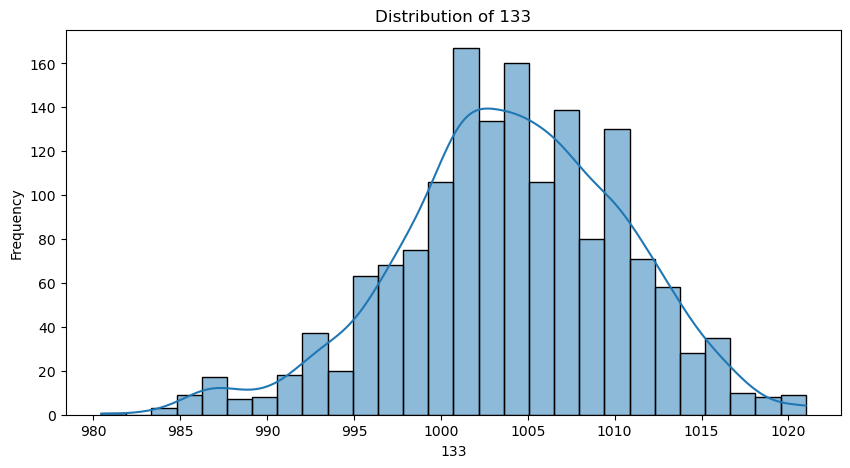

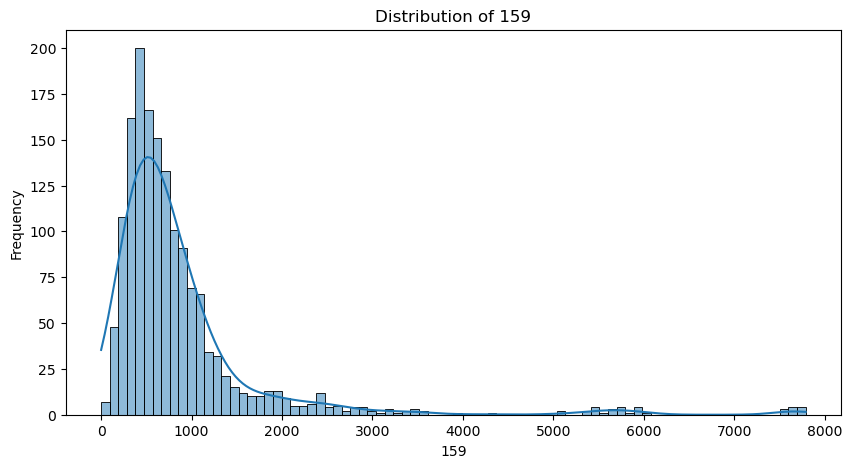

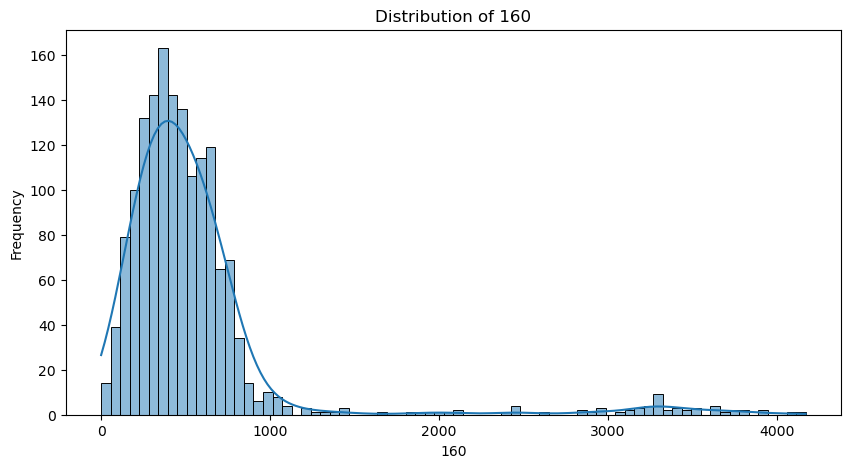

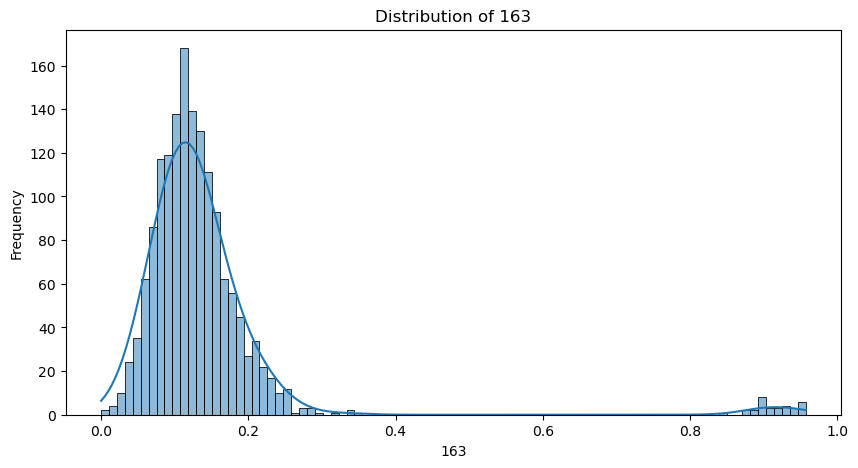

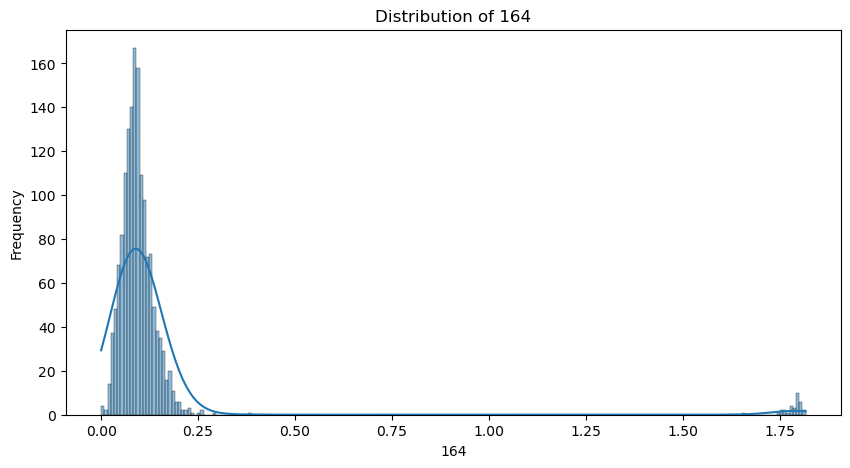

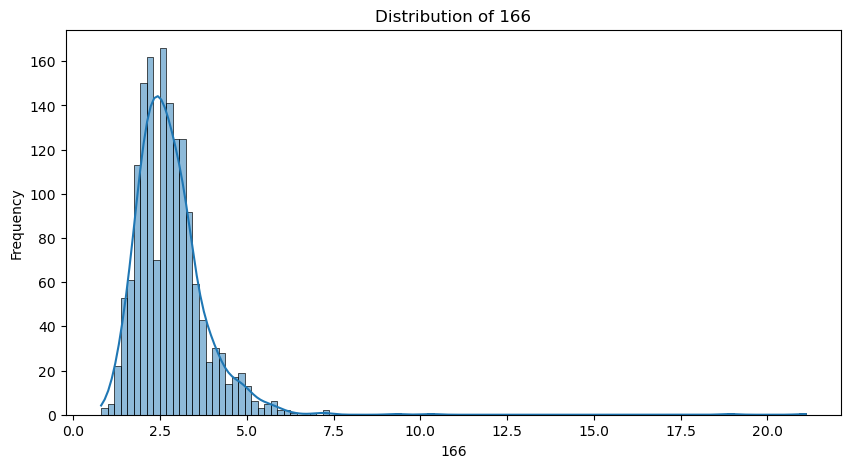

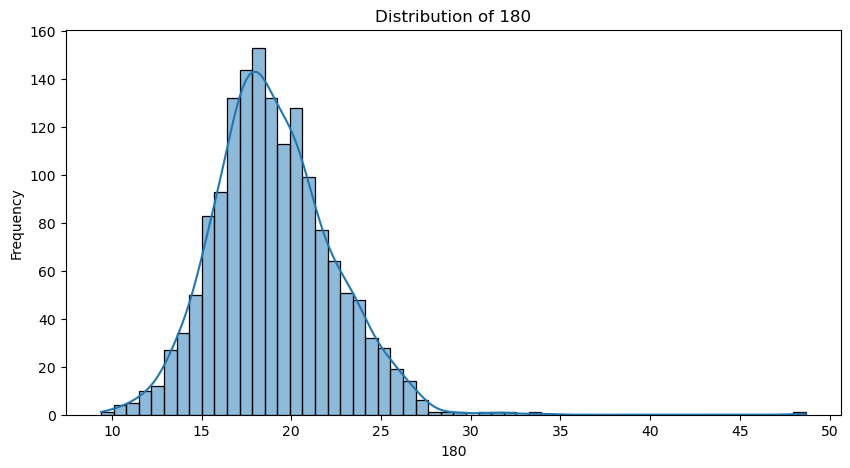

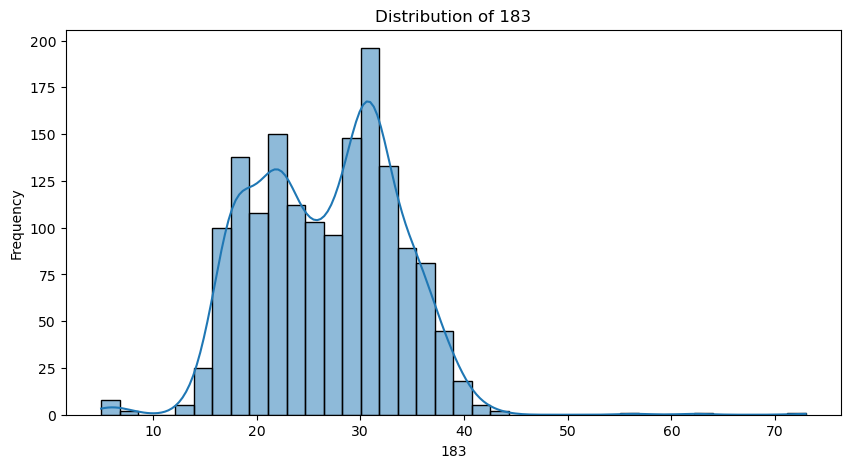

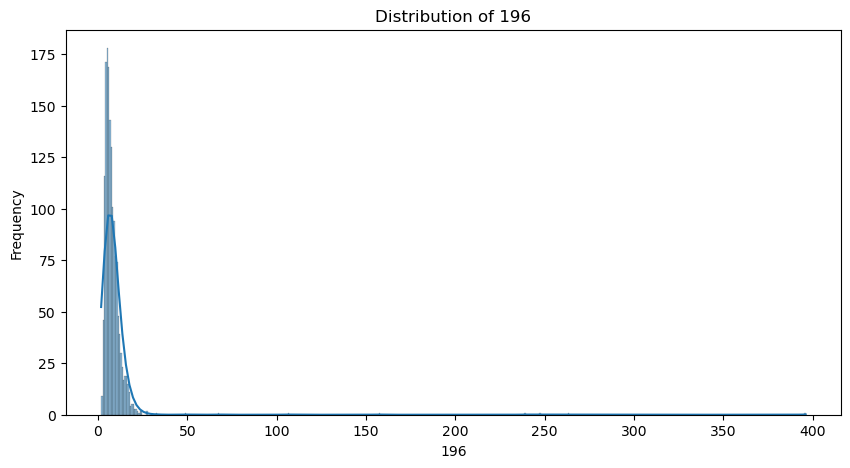

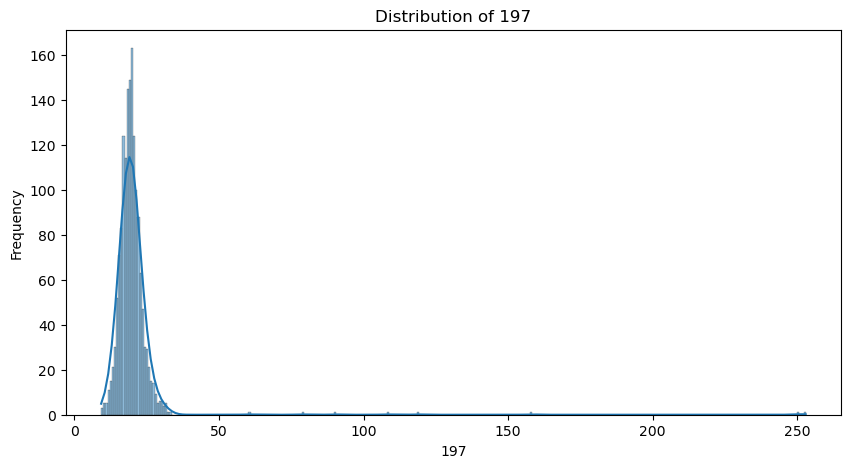

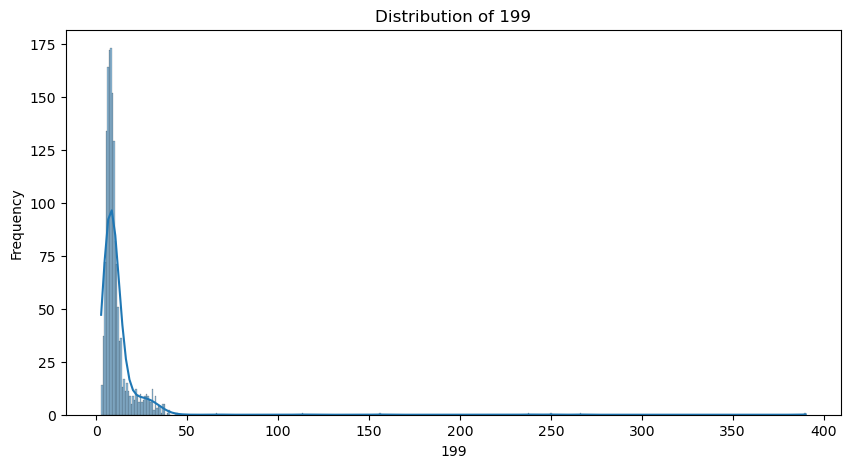

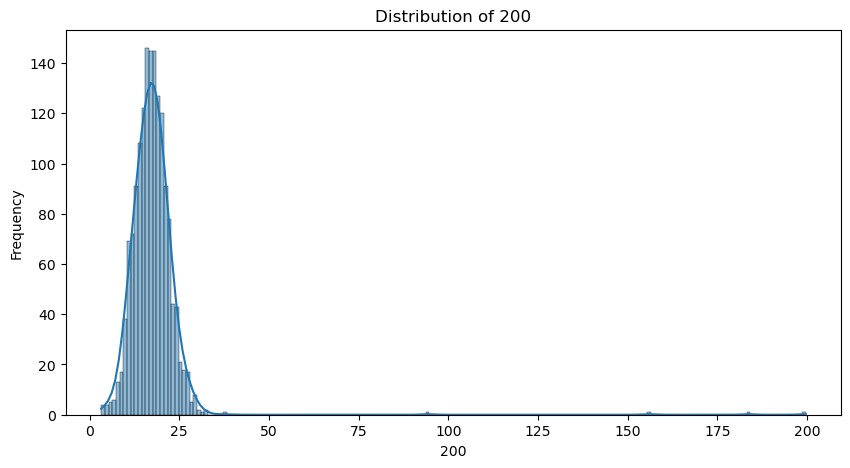

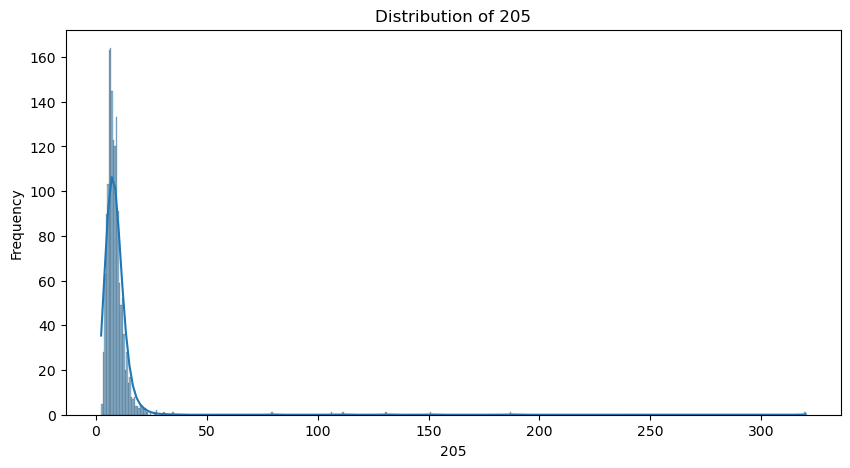

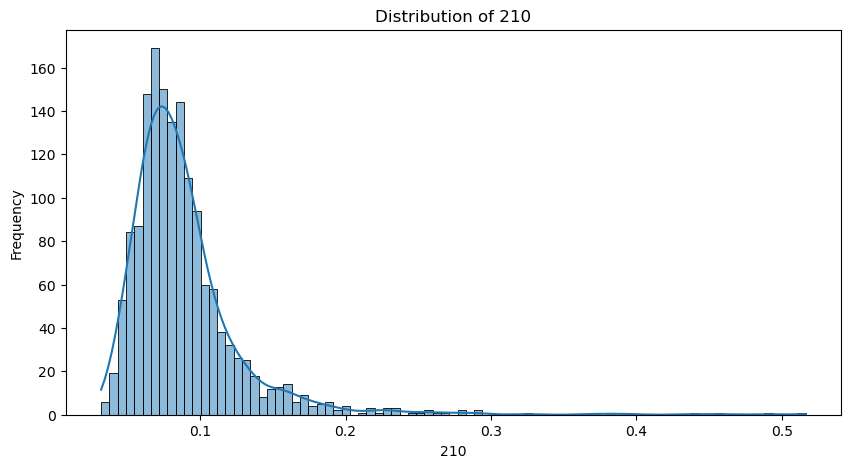

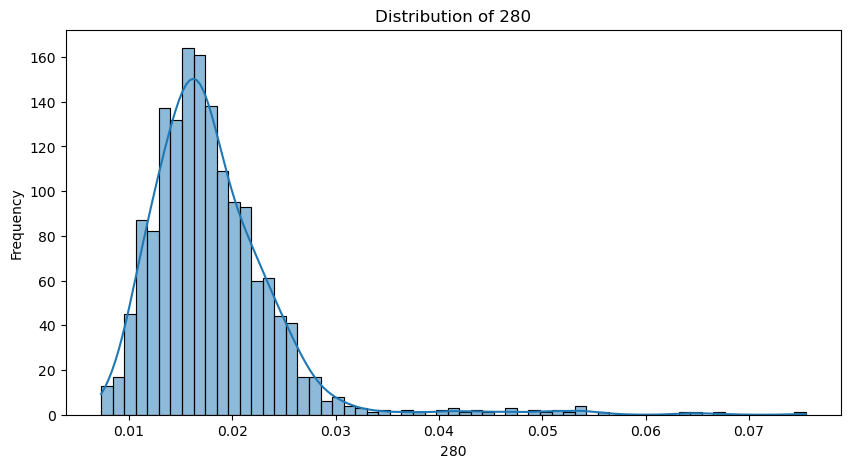

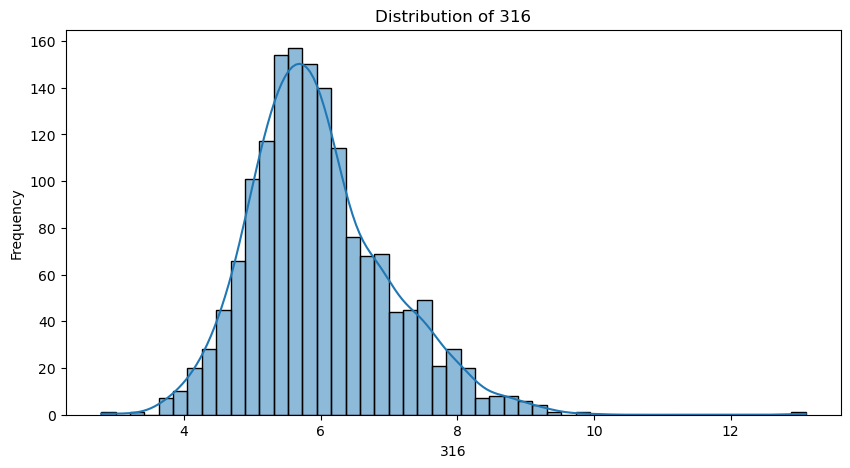

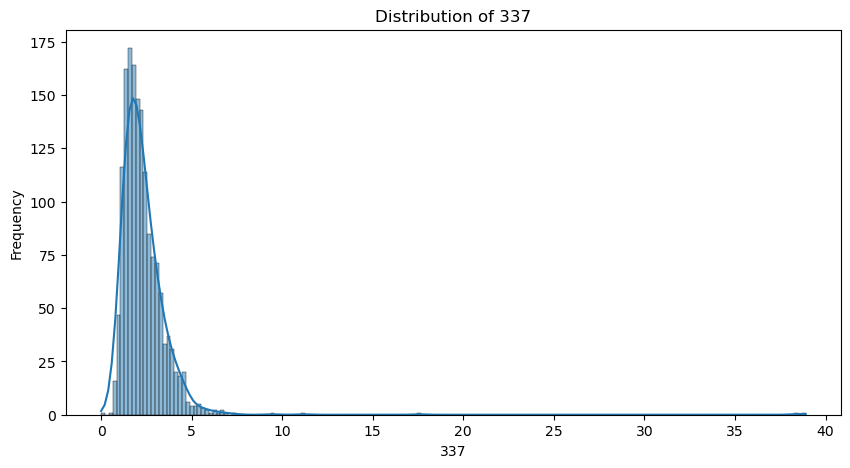

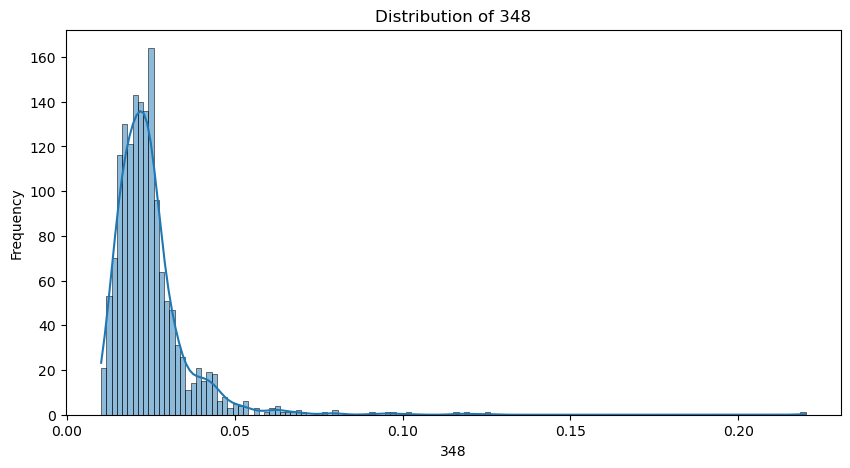

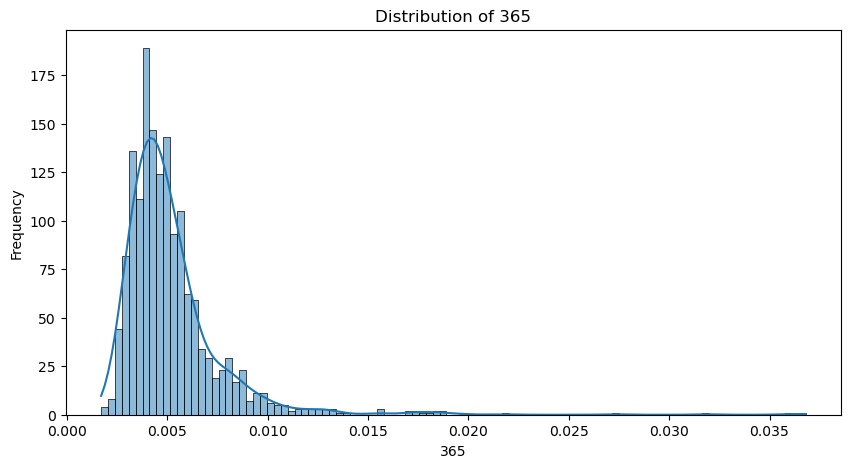

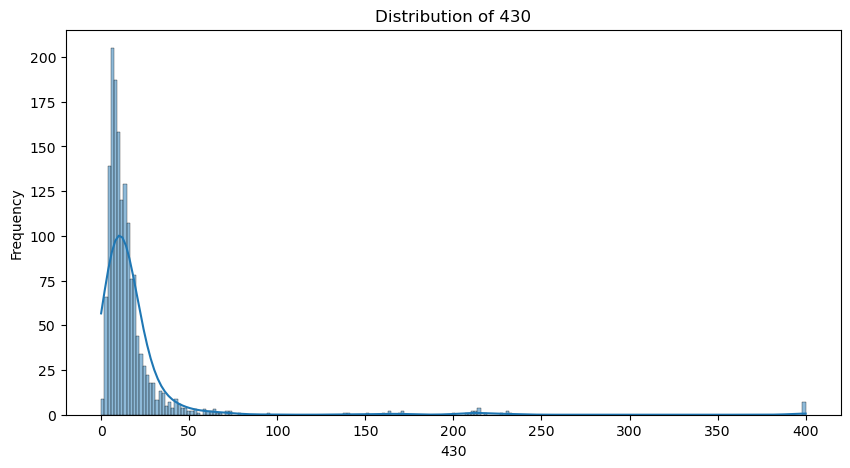

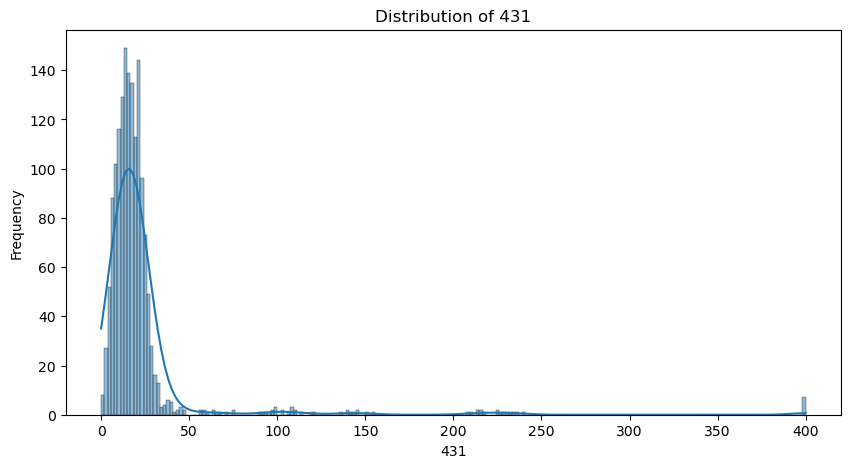

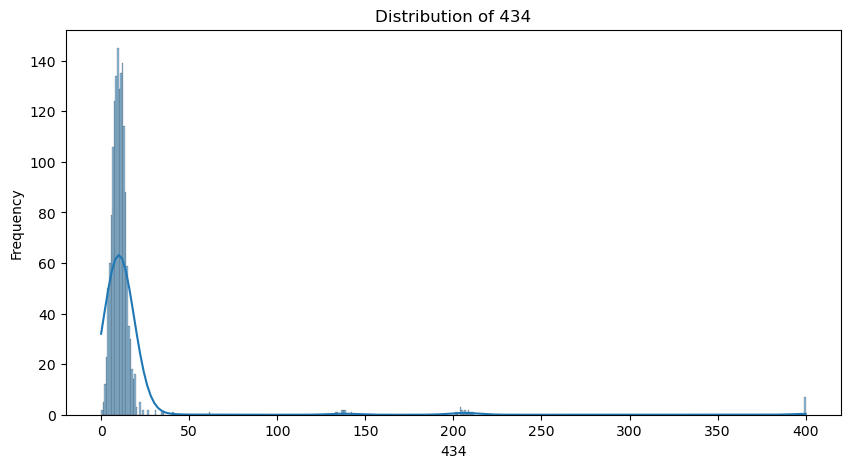

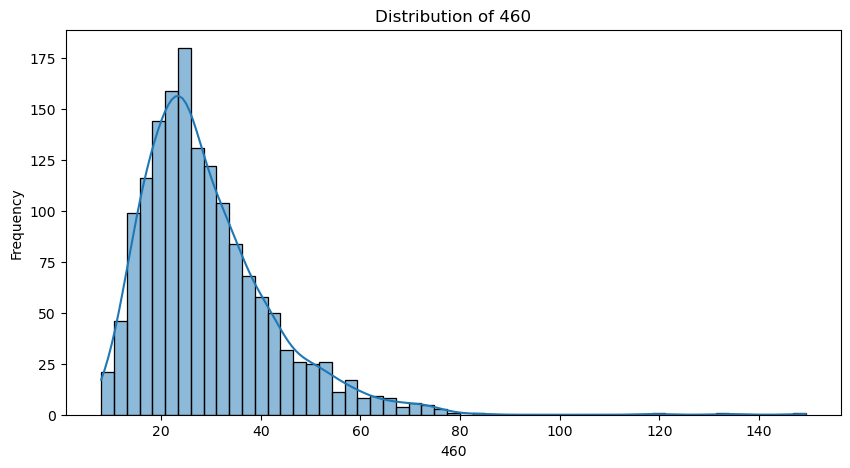

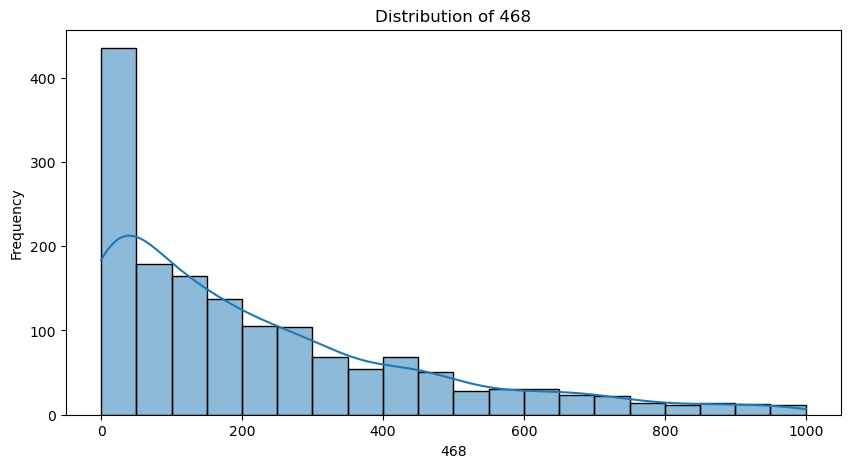

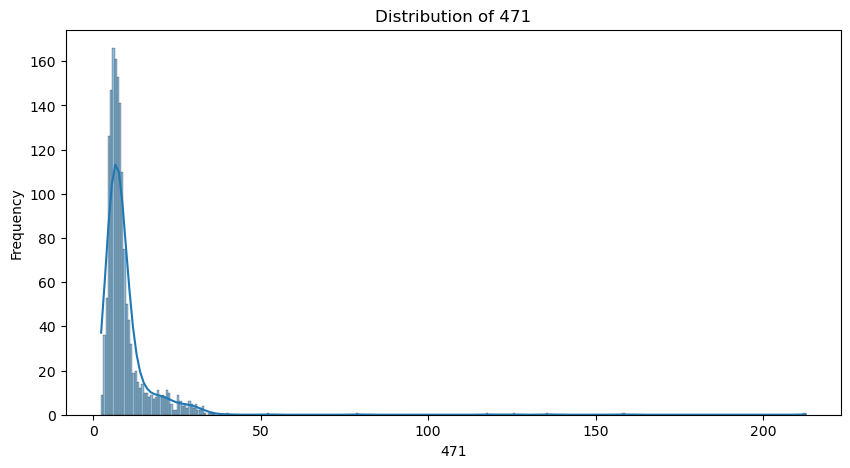

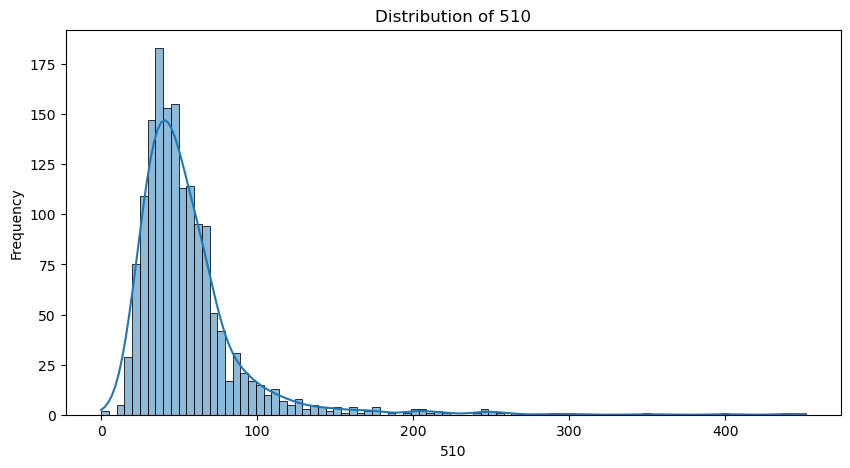

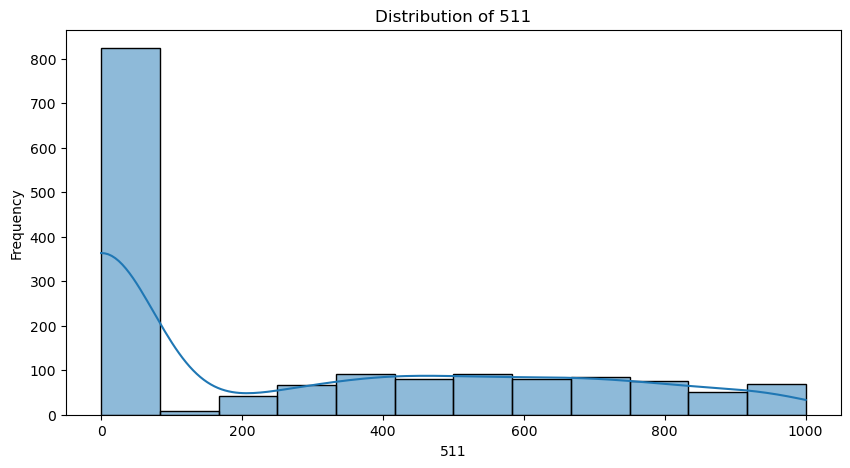

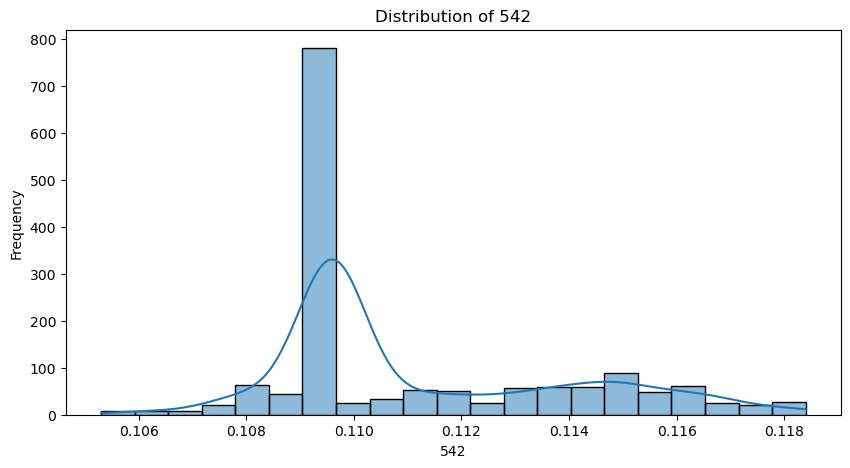

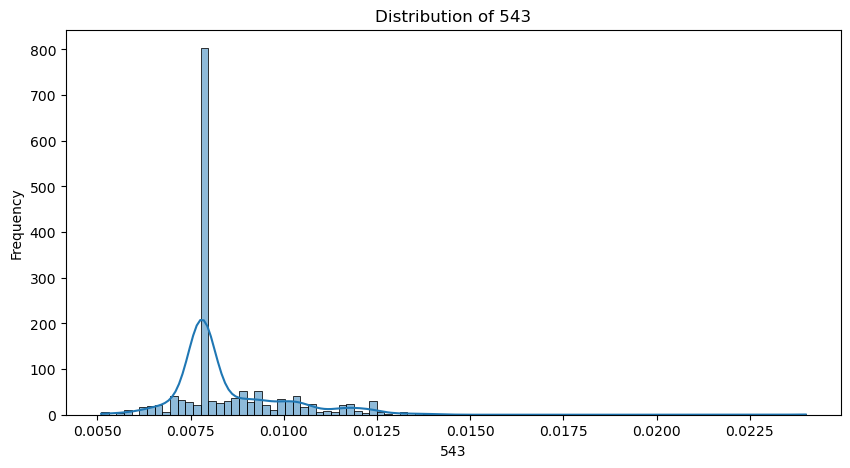

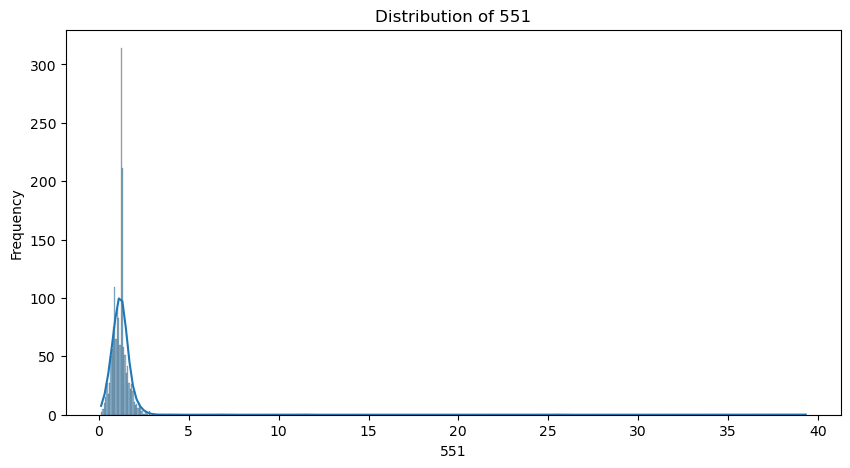

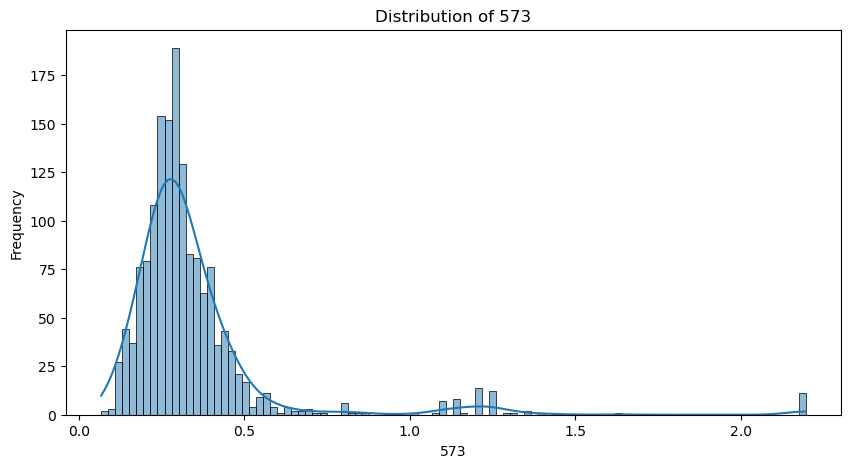

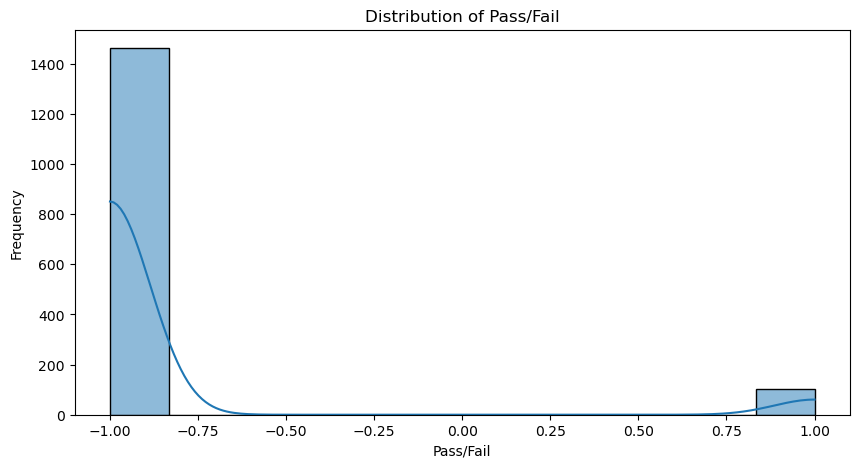

In [52]:
for col in data.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde = True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# INSIGHTS FROM THE ABOVE HISTOGRAM CHARTS

#### Target feature is completely imbalanced with value -1 as majority class and +1 as minority class
#### most of the features are having outliers
#### most of the data is left skewed, right skewed and normally distributed

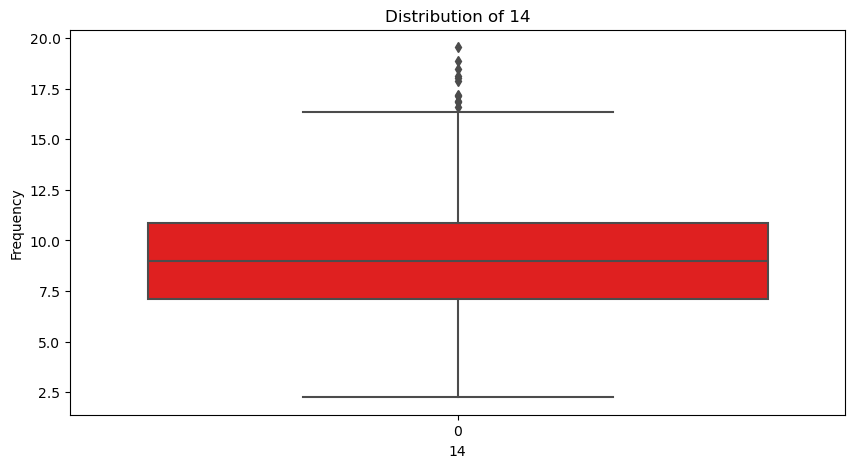

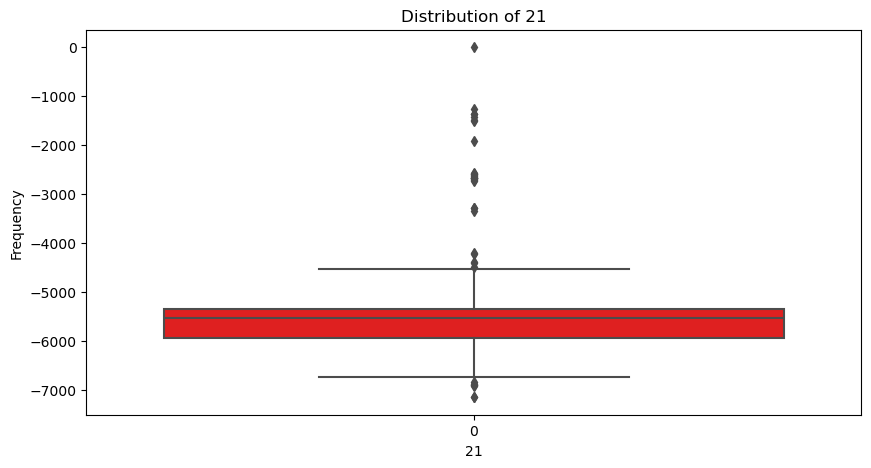

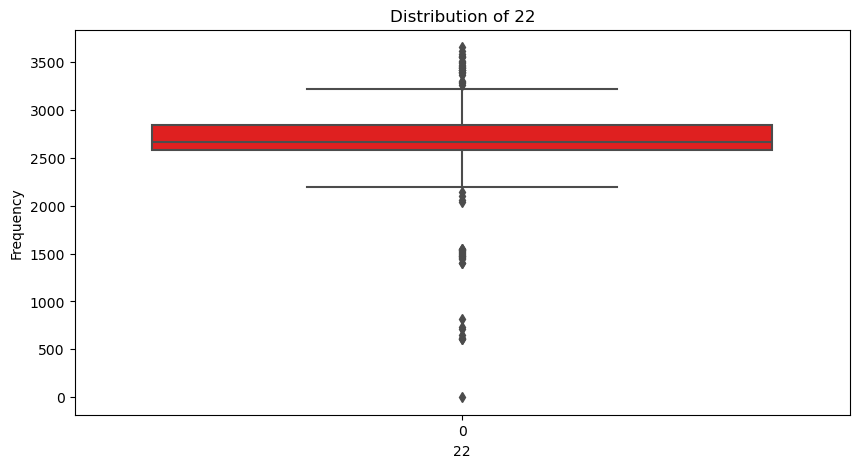

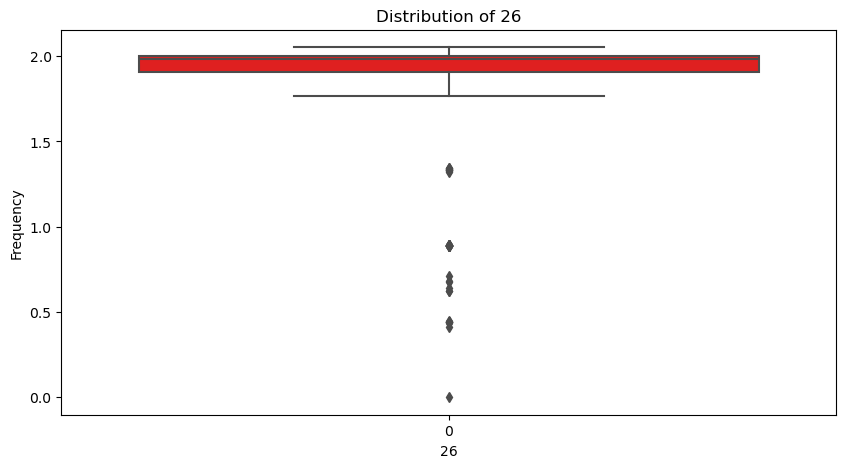

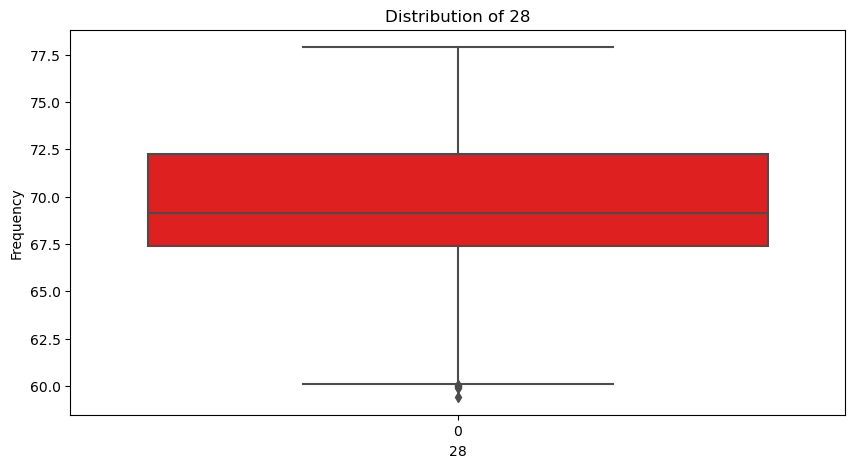

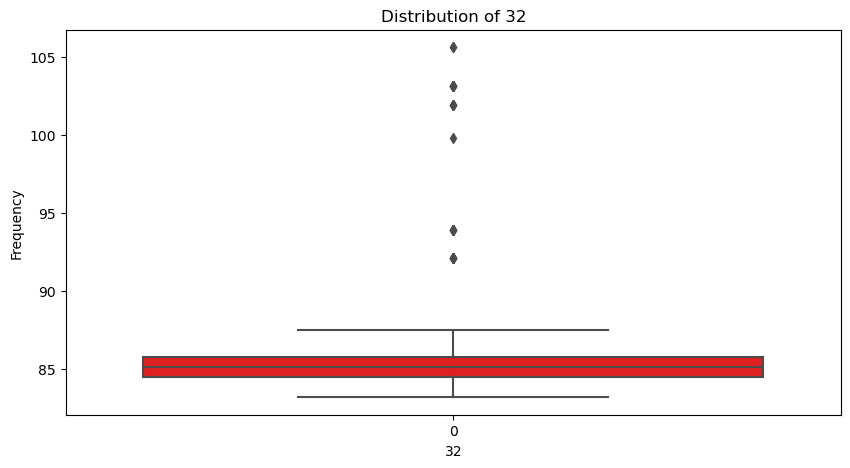

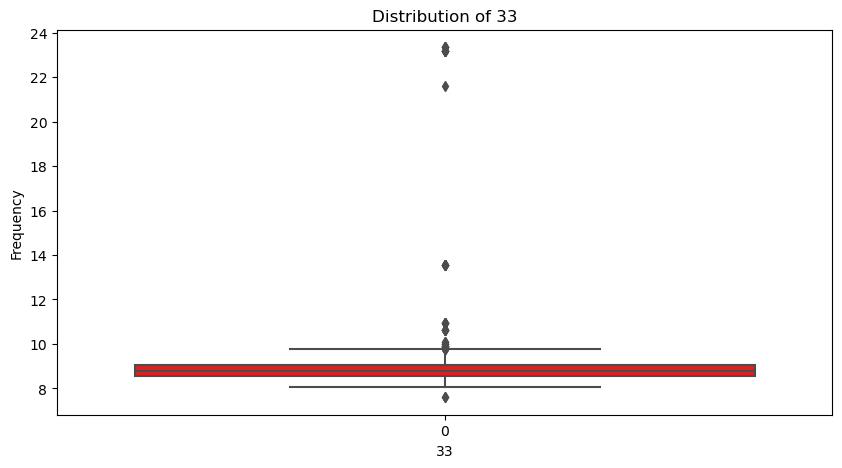

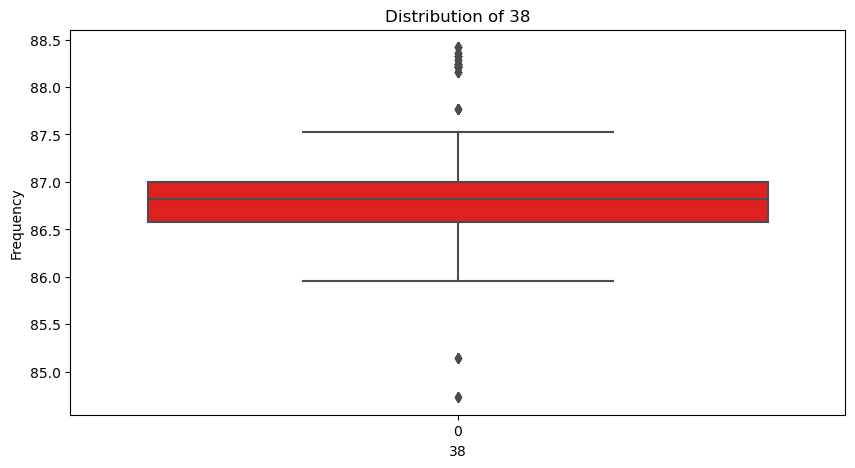

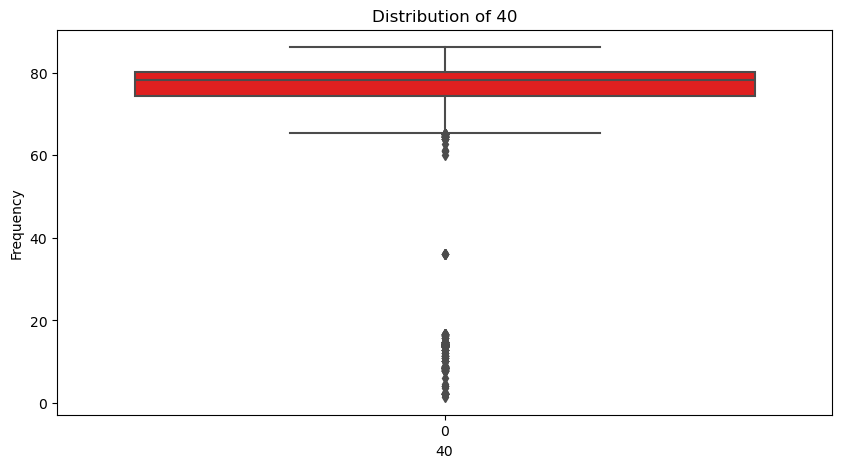

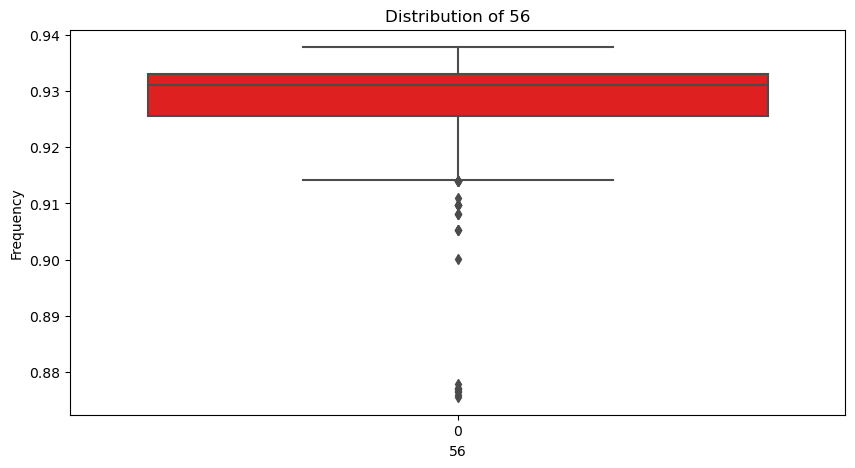

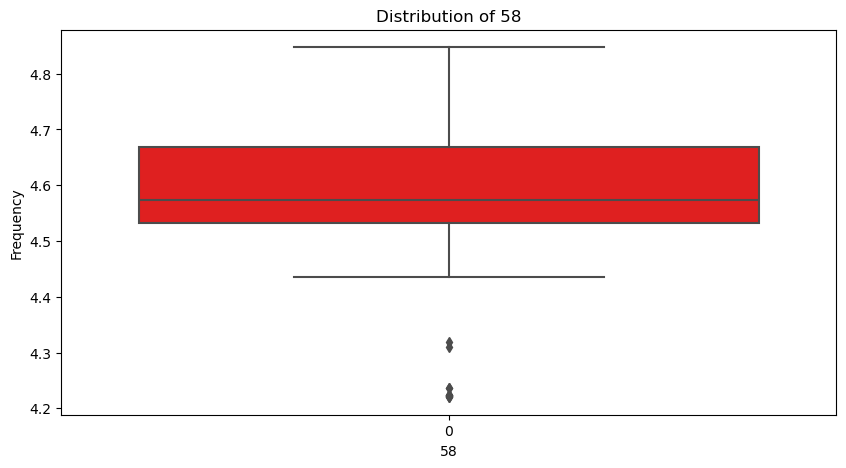

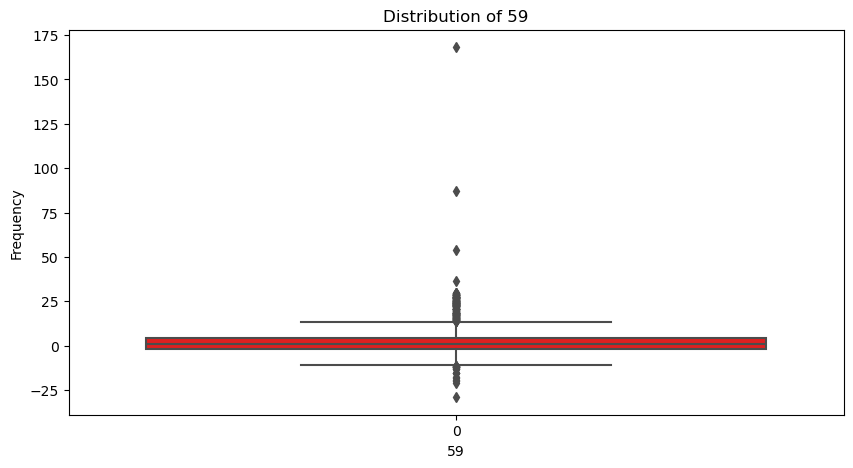

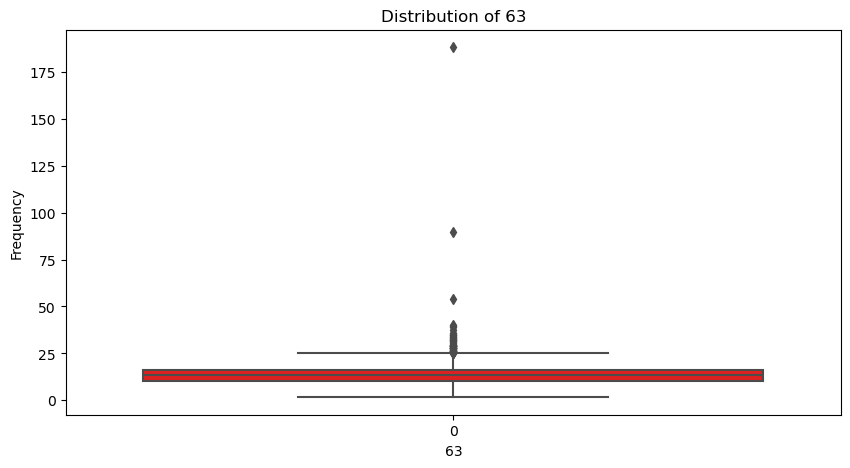

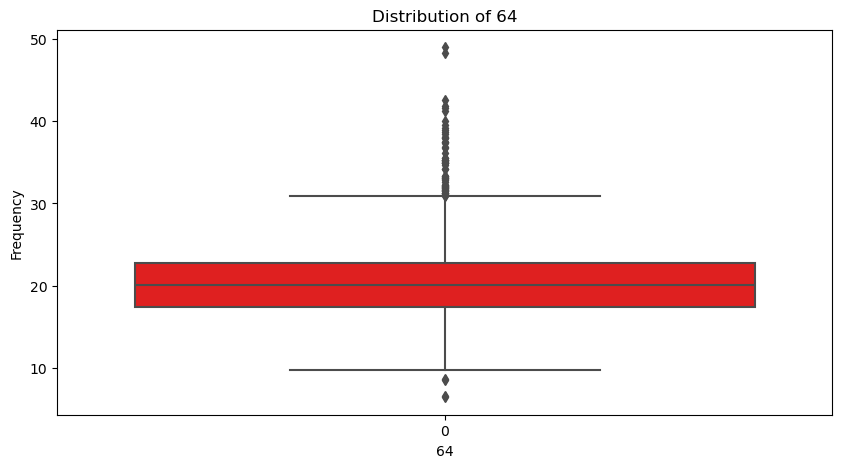

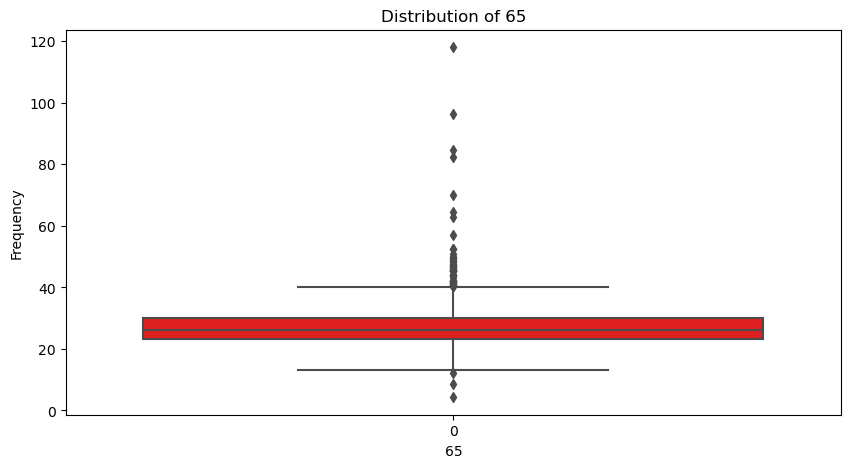

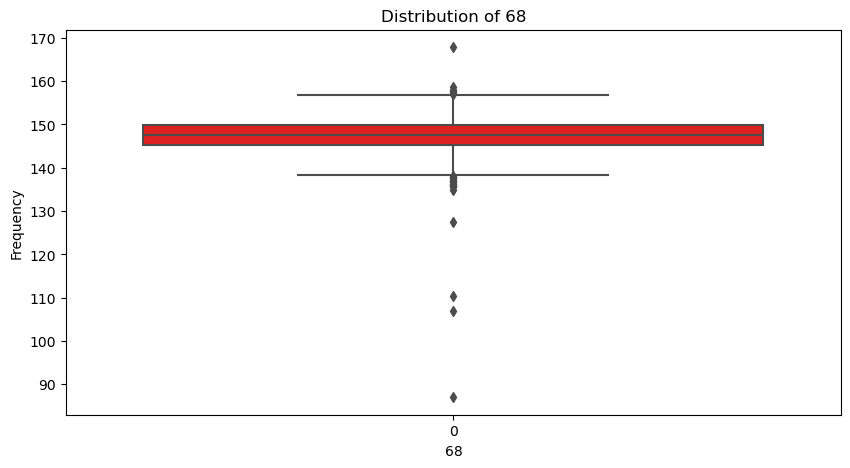

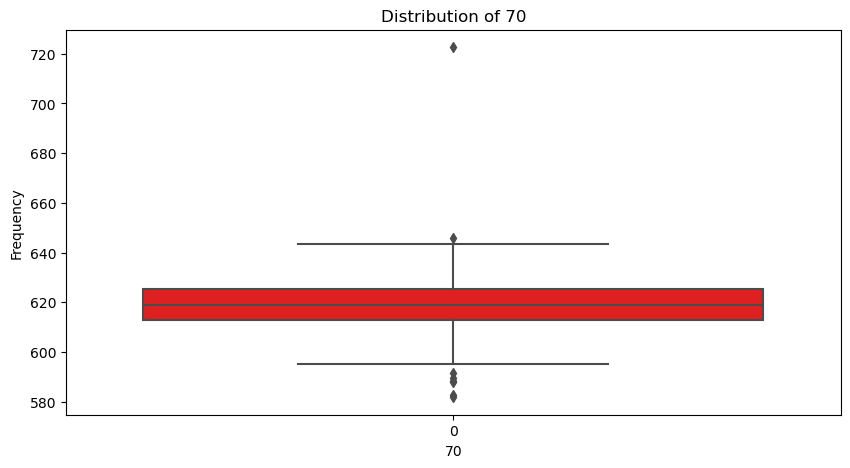

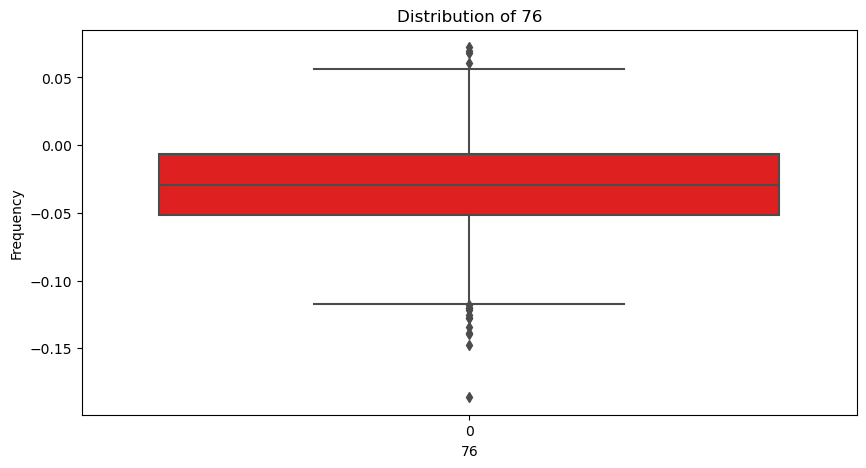

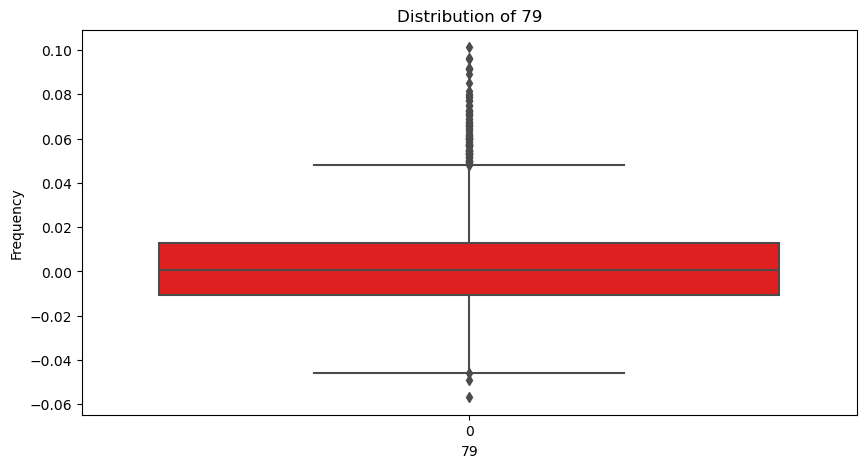

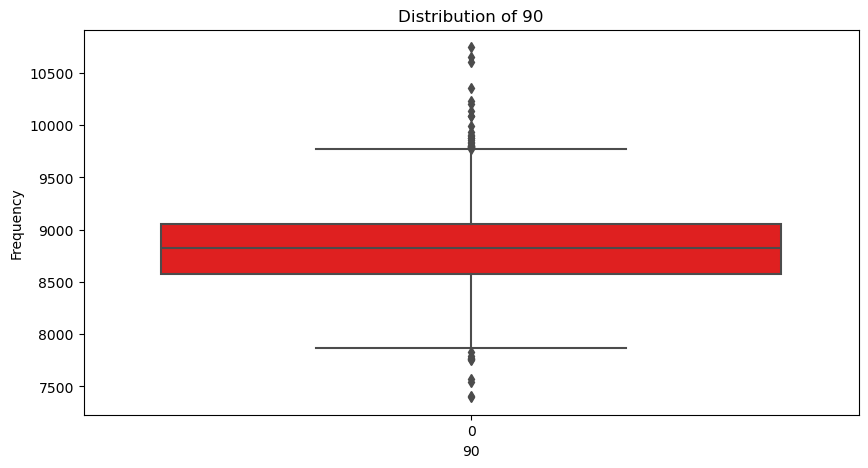

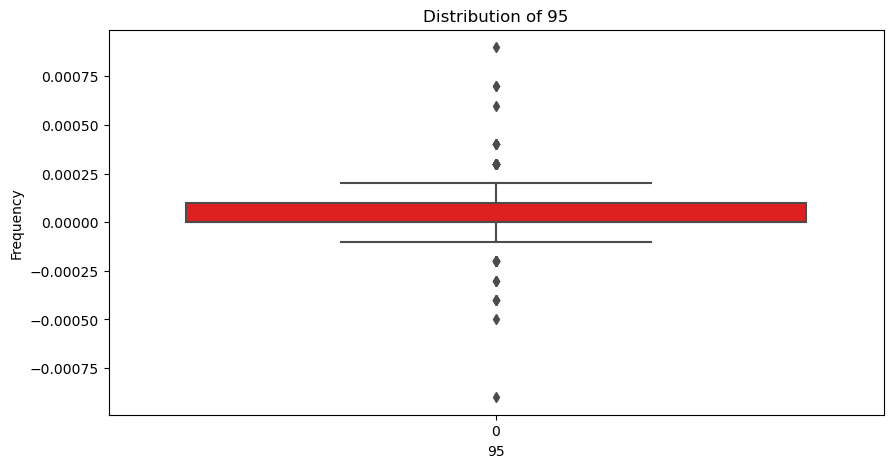

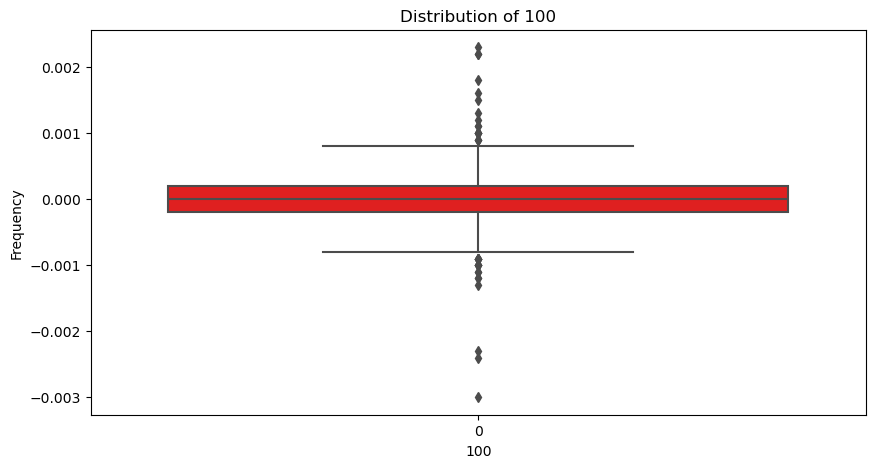

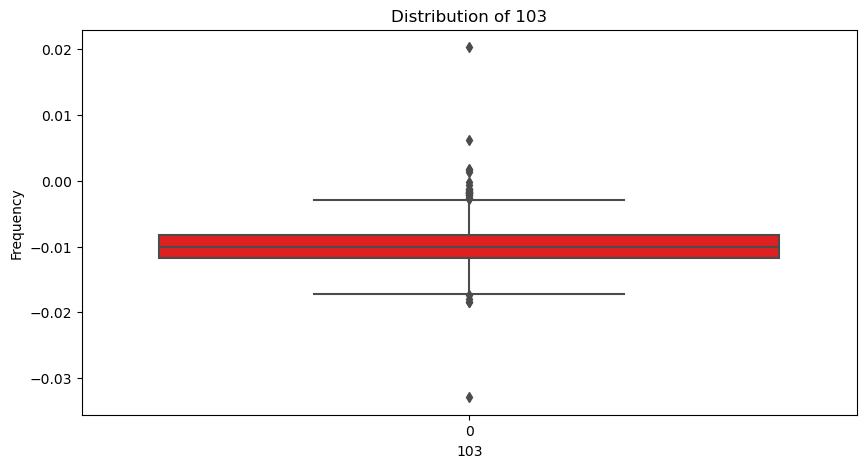

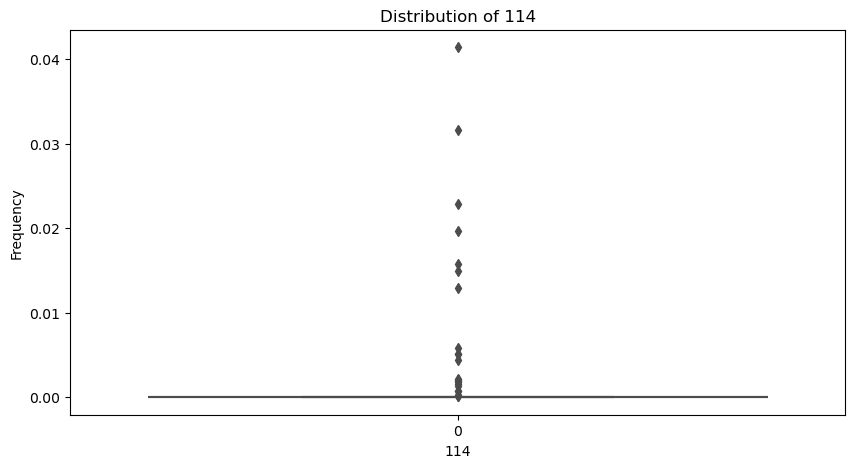

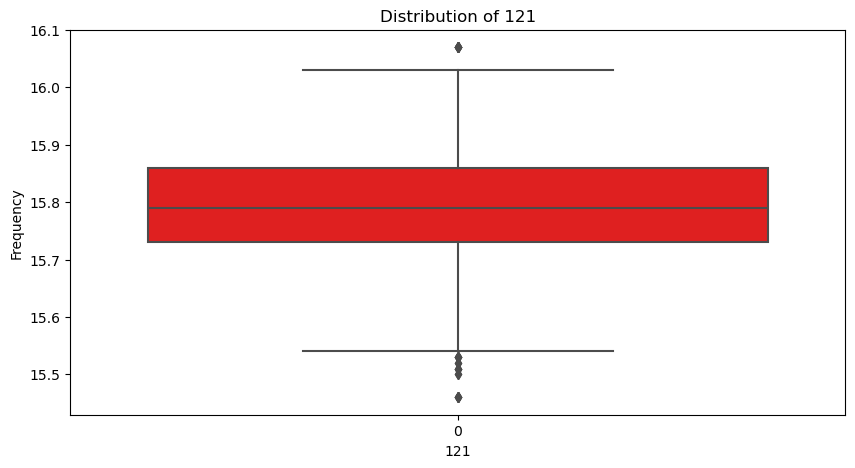

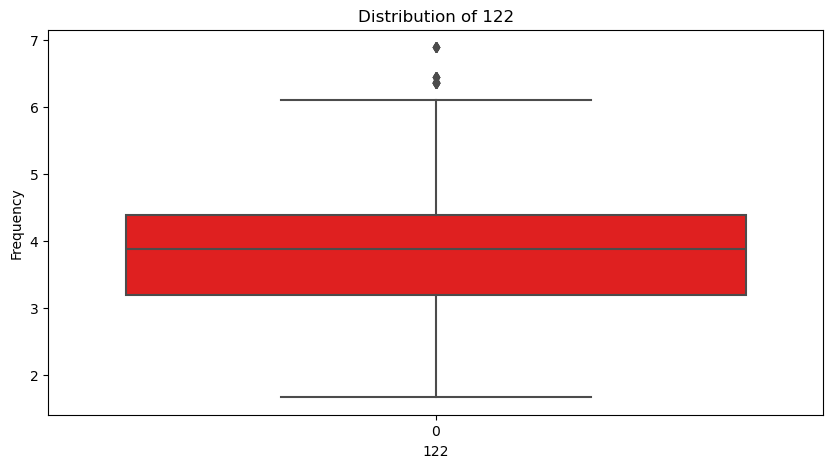

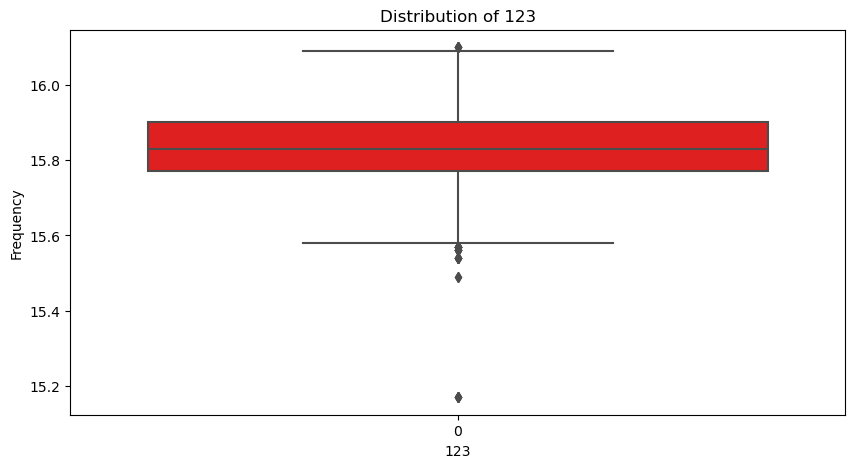

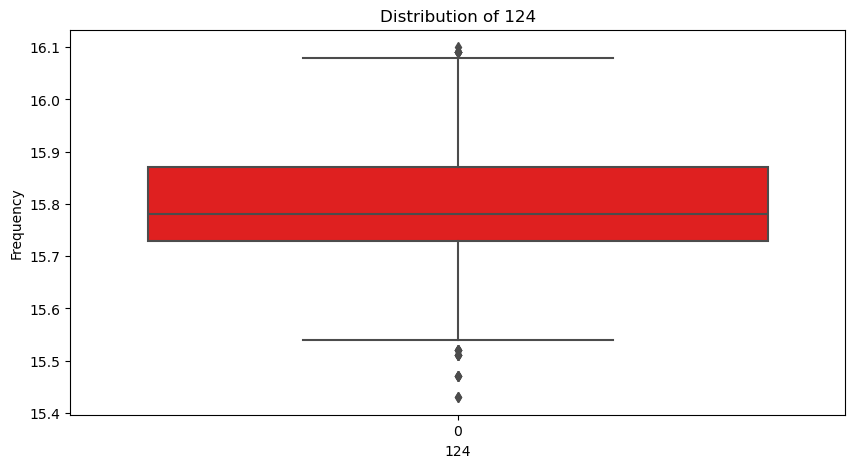

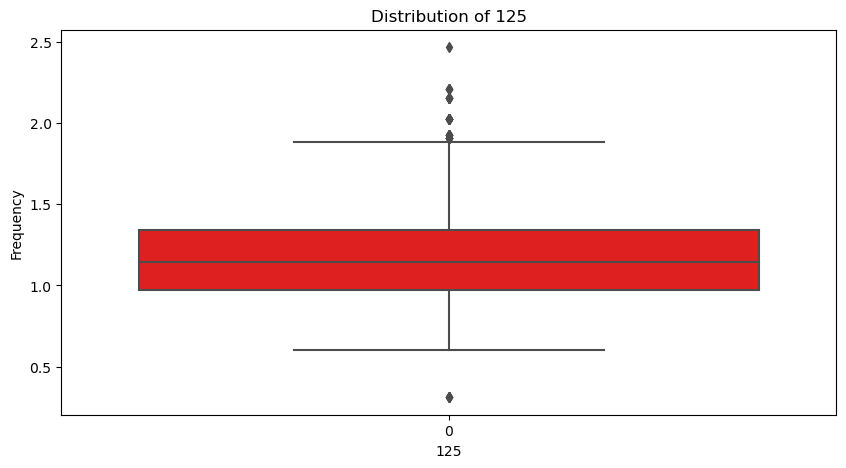

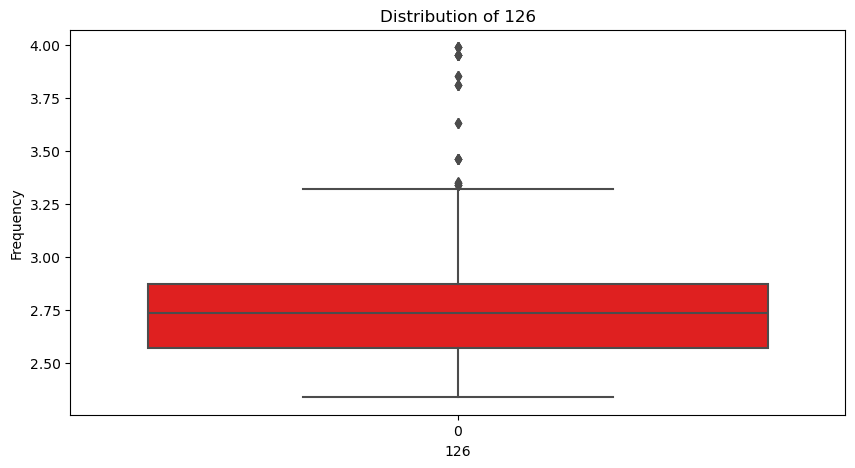

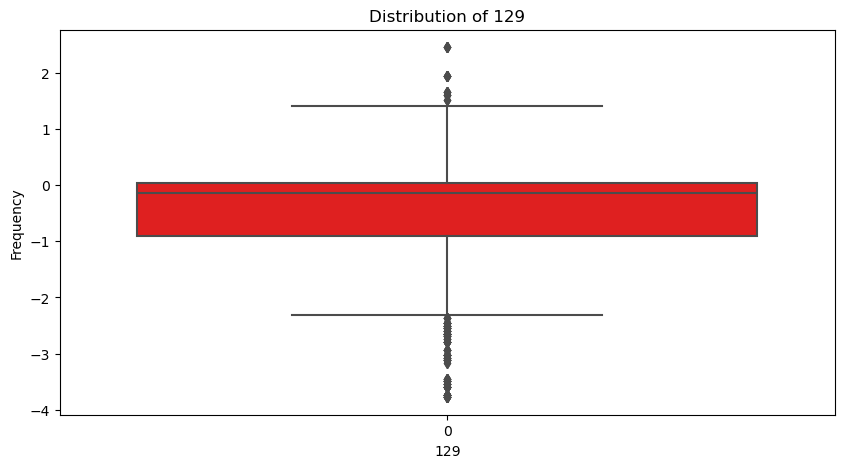

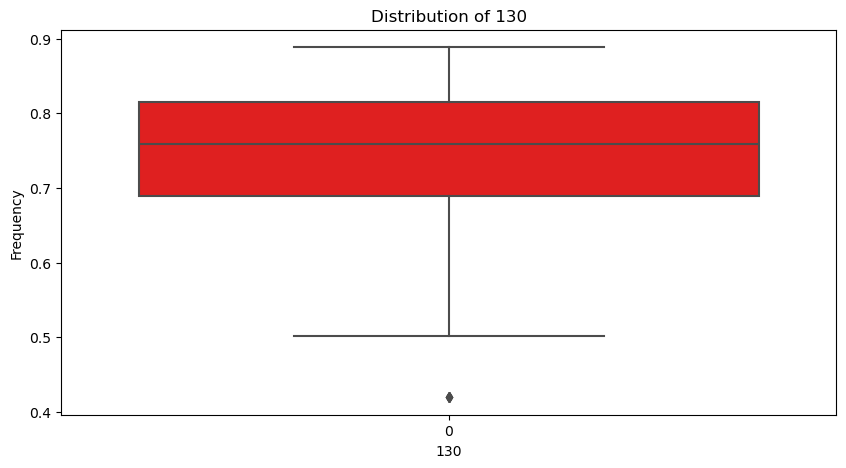

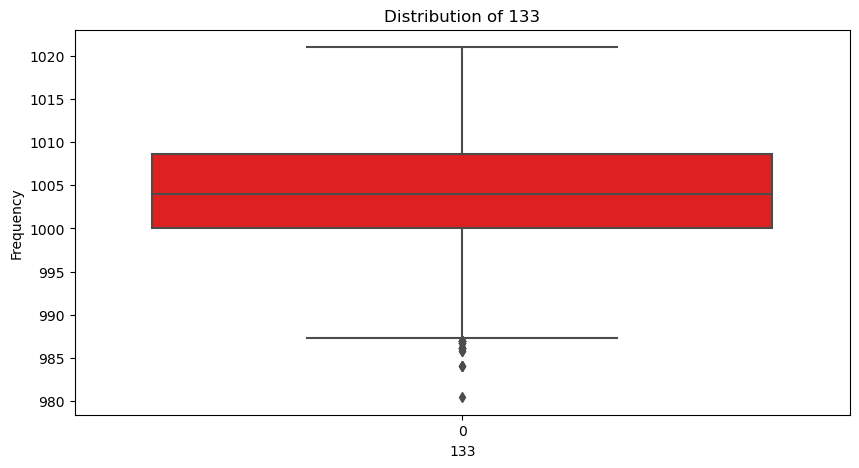

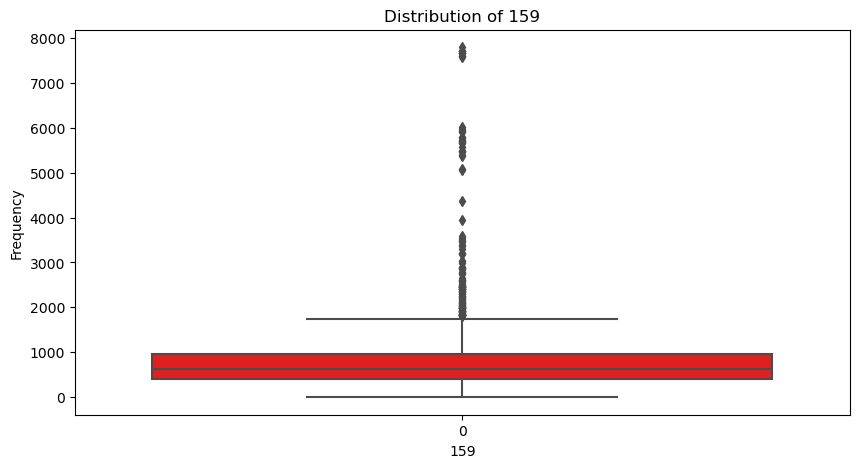

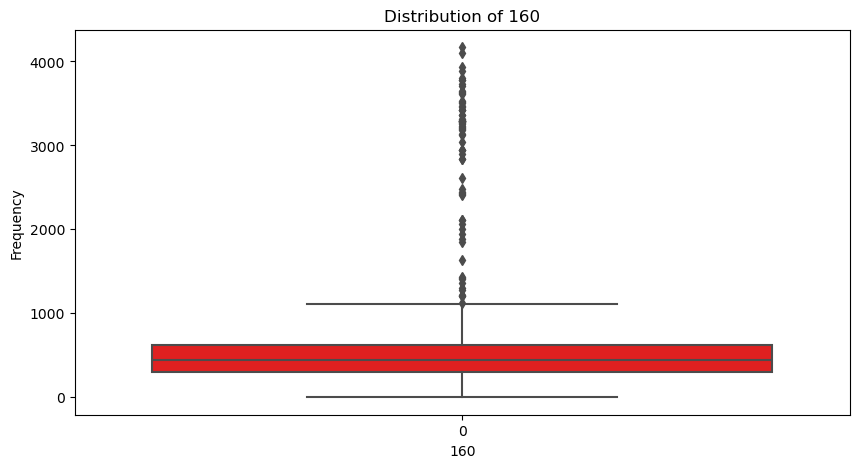

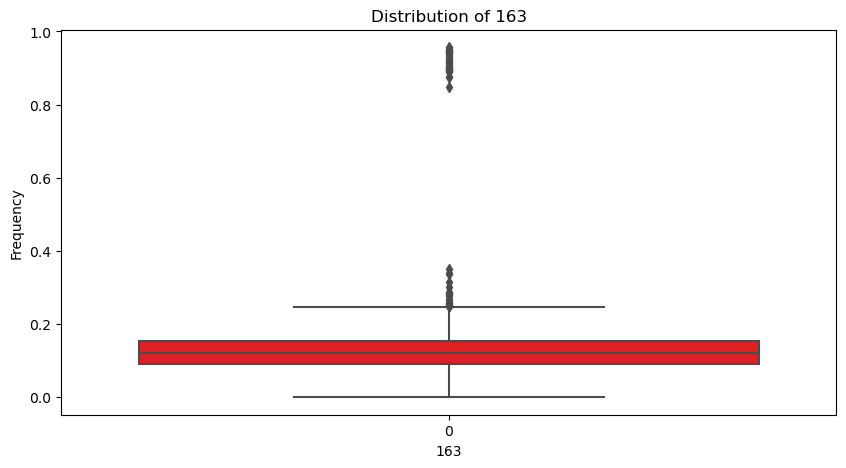

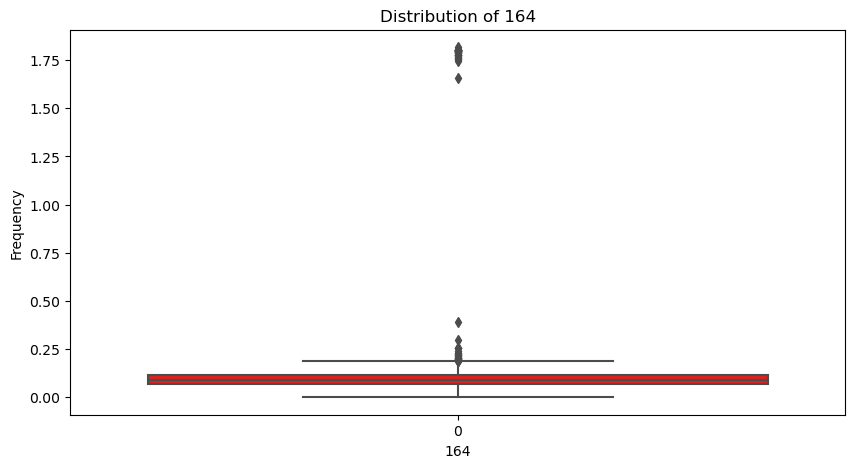

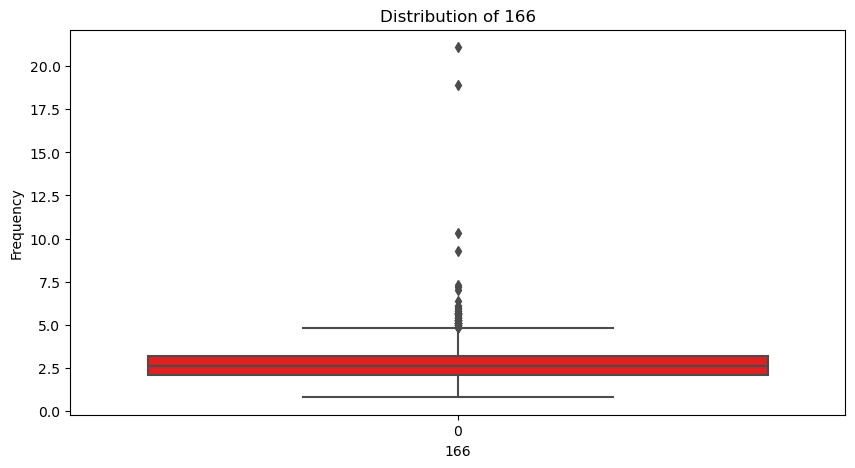

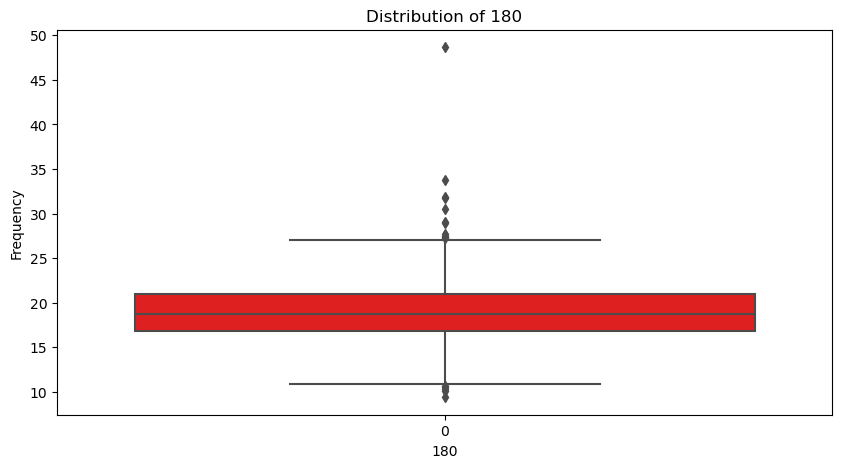

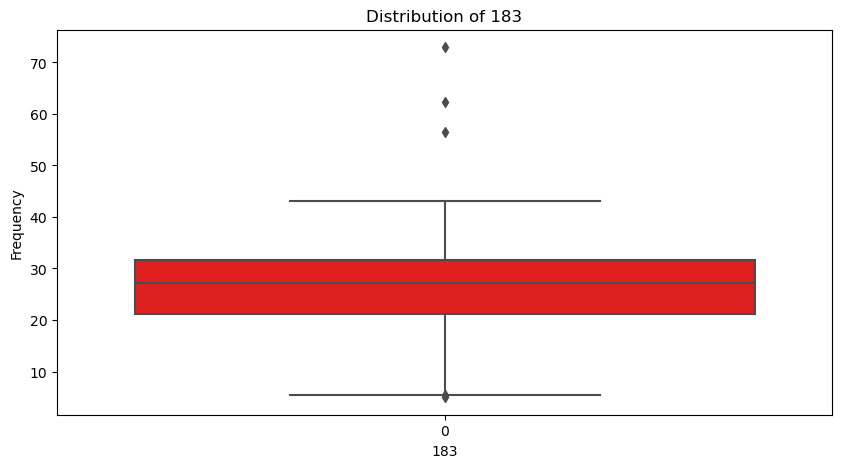

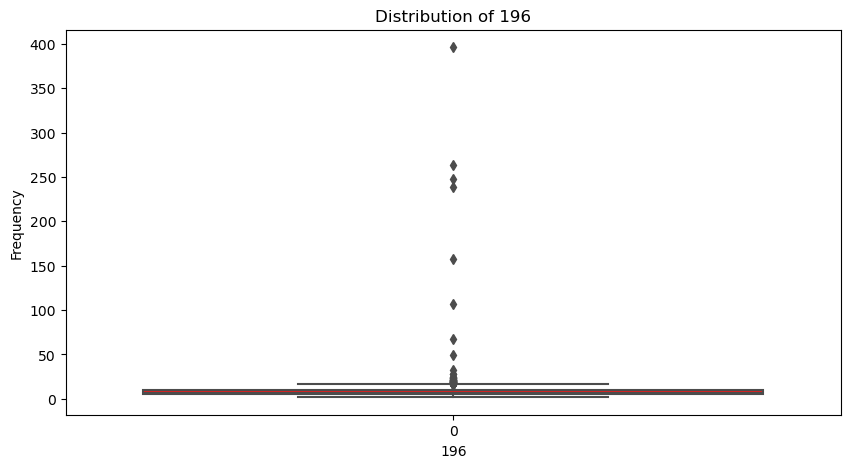

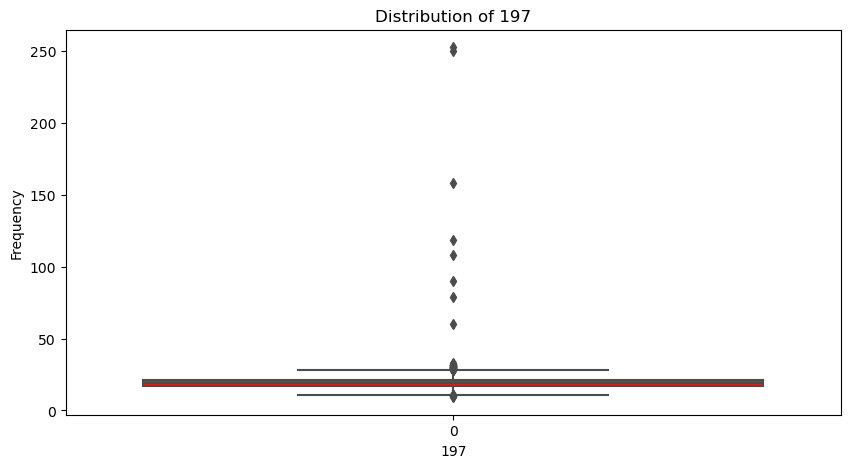

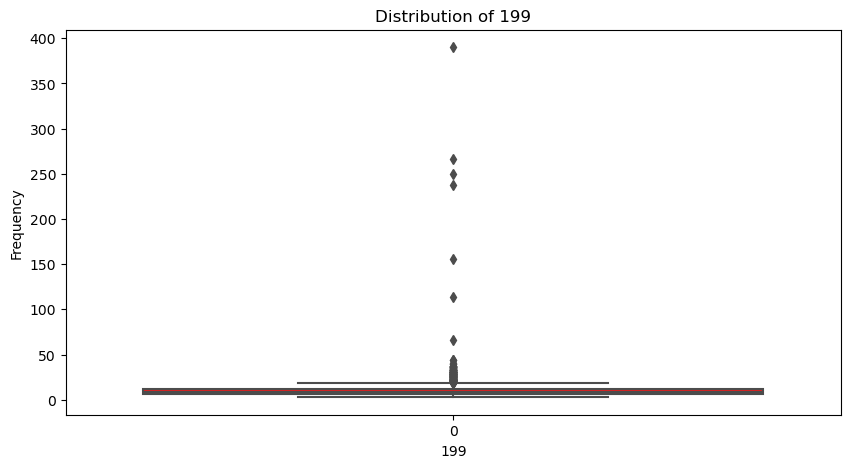

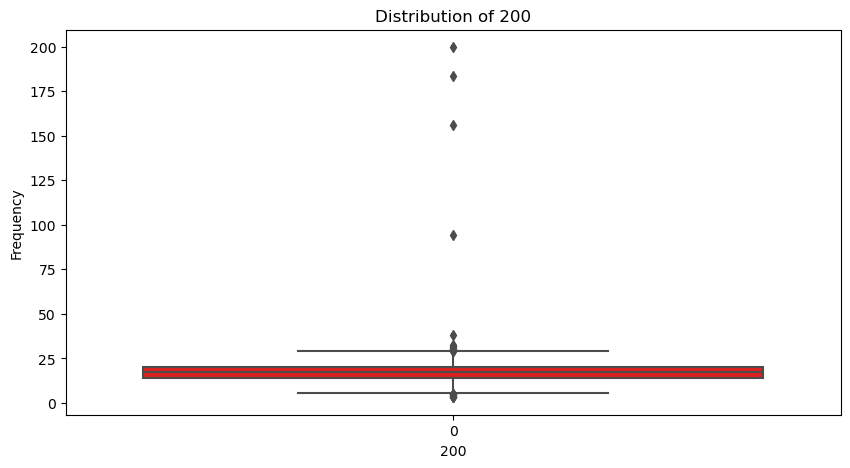

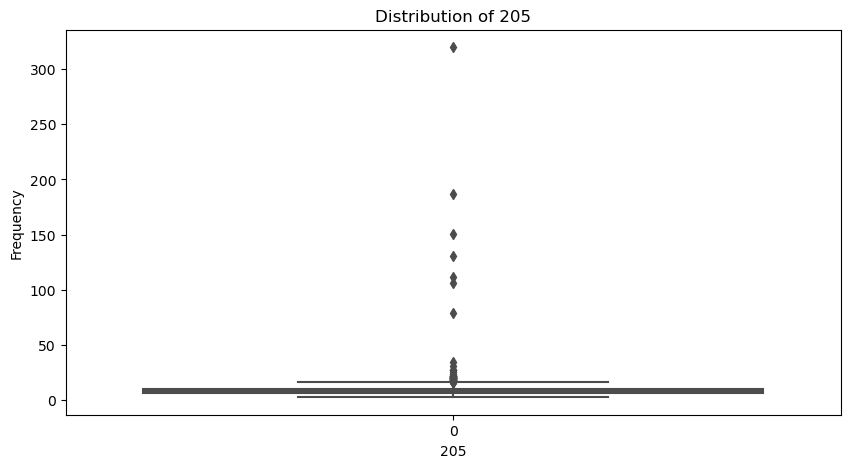

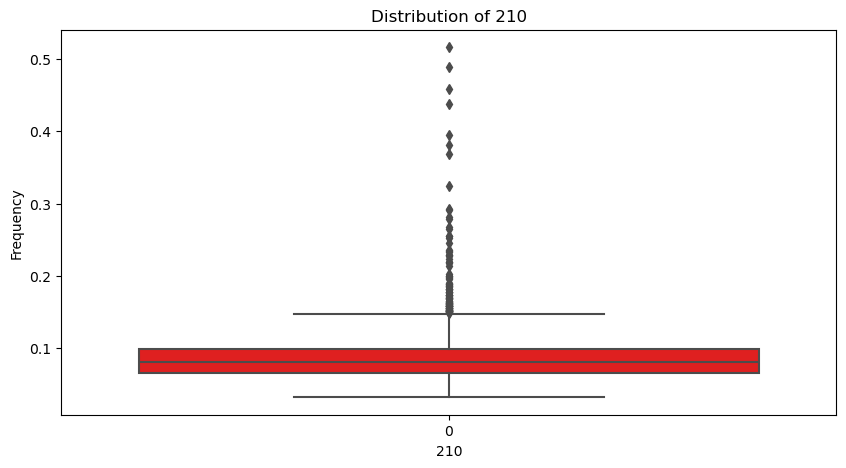

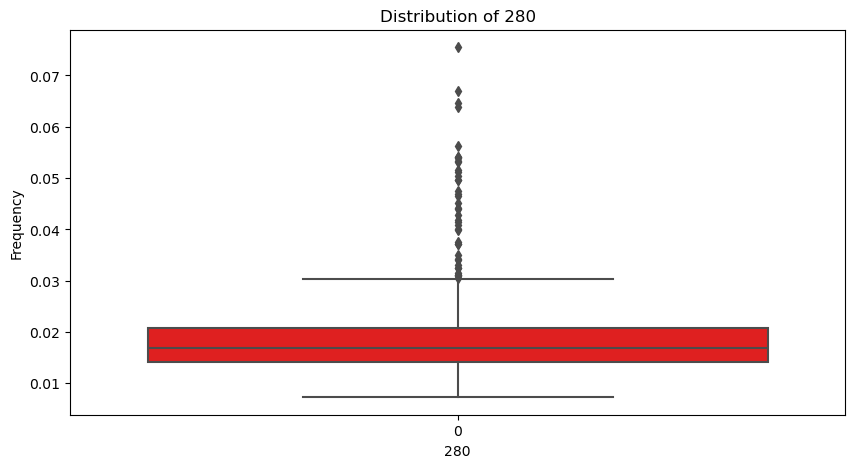

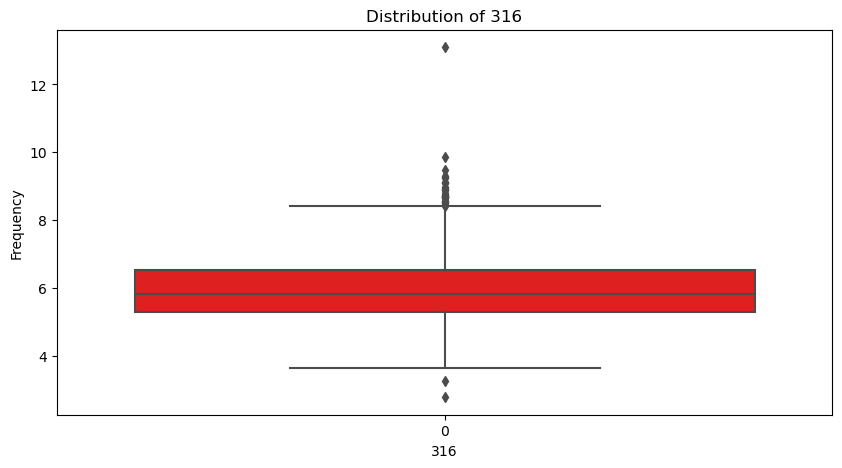

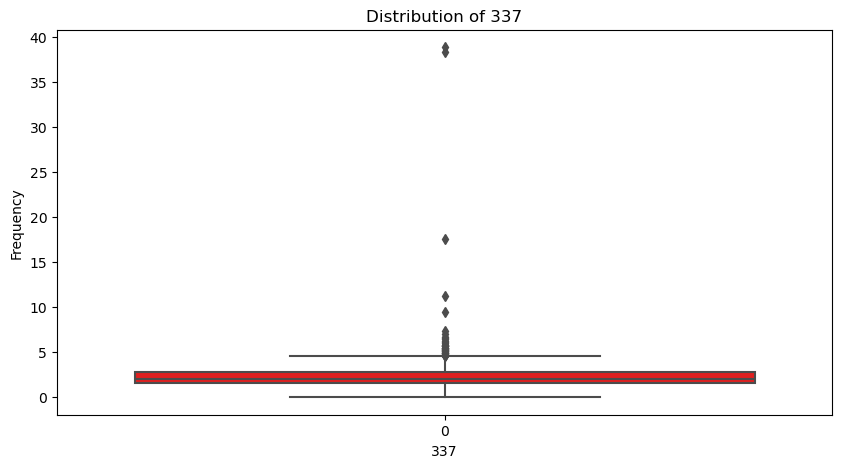

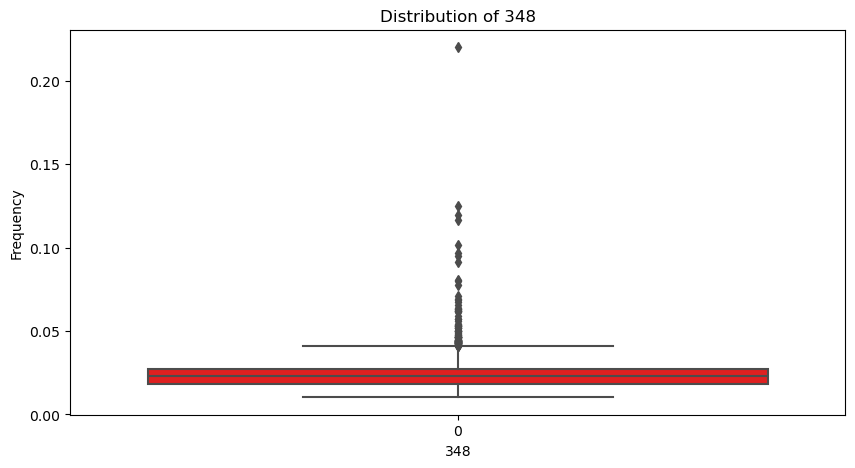

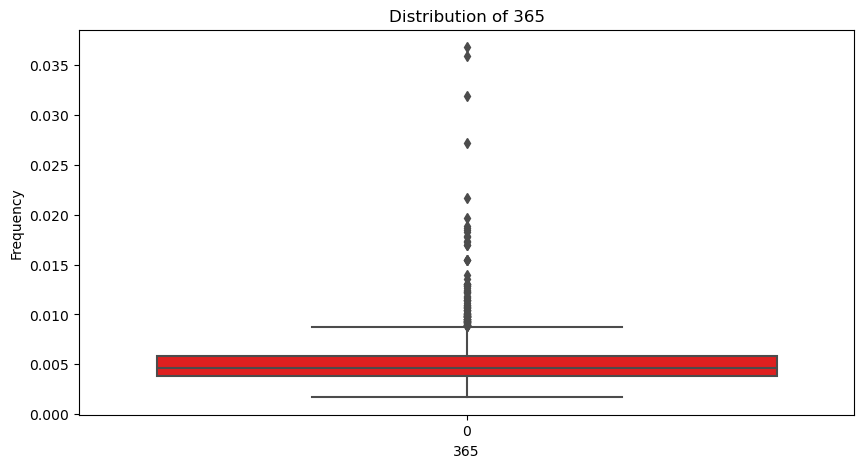

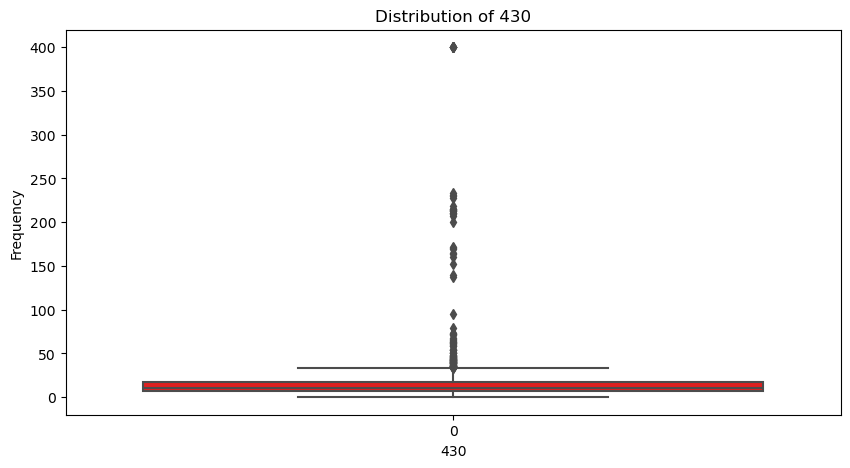

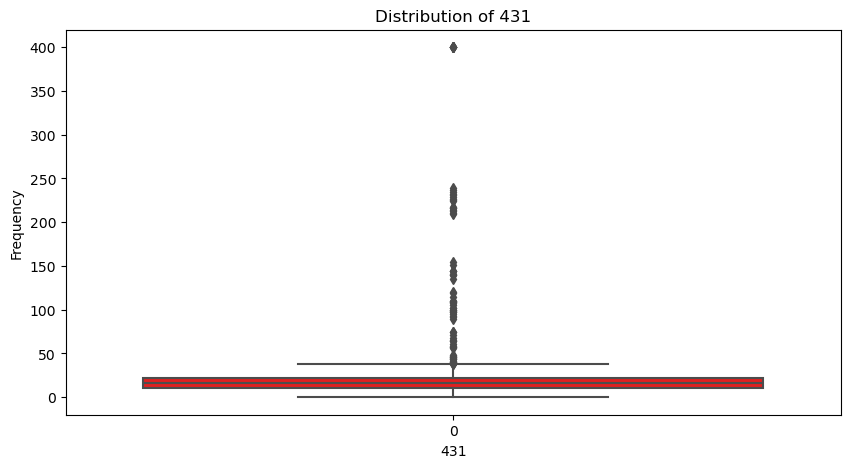

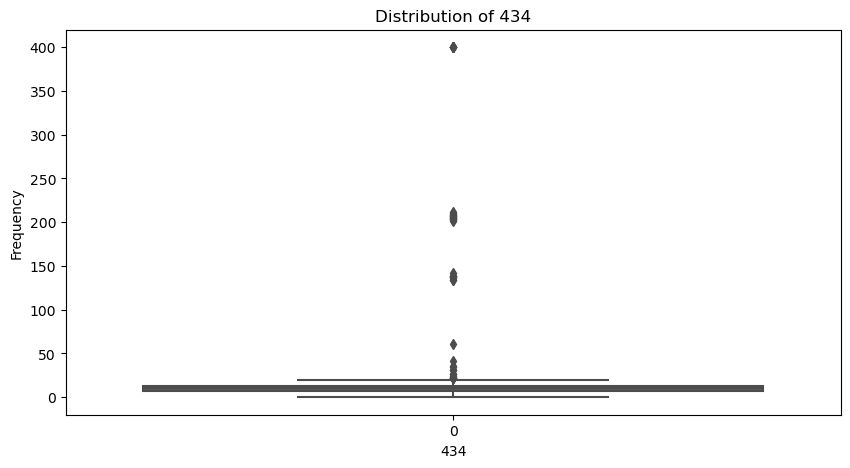

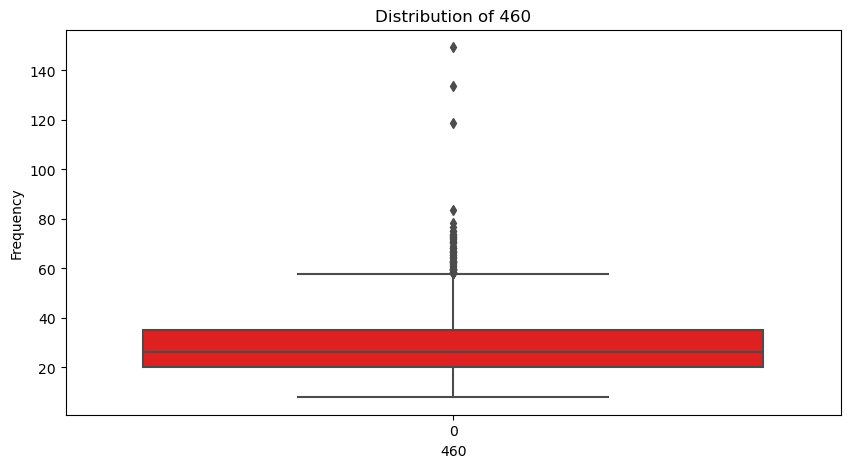

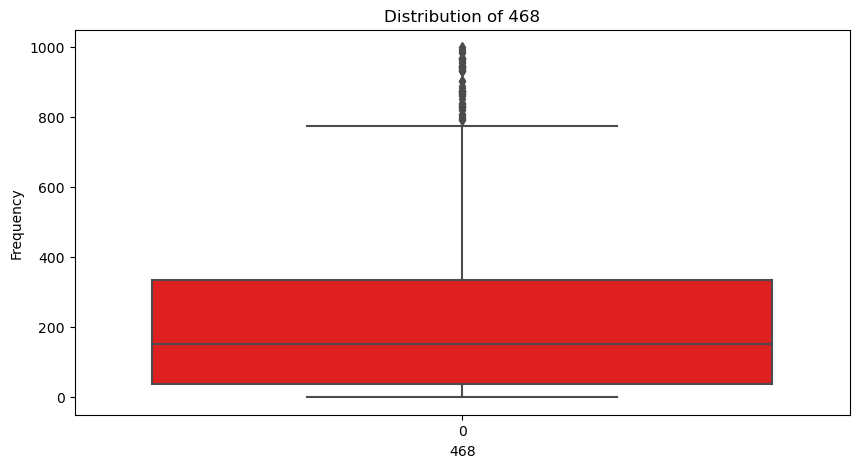

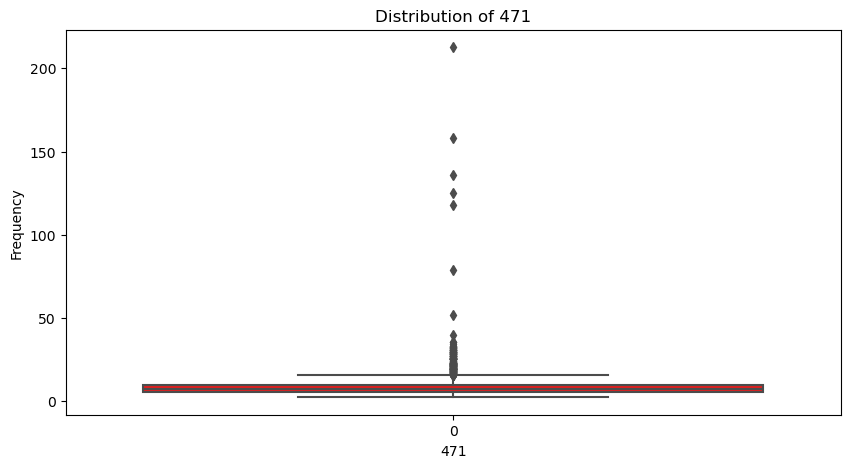

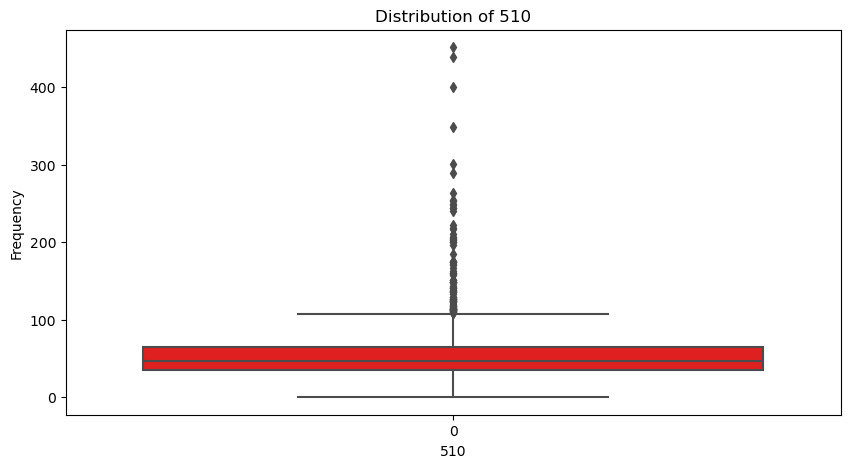

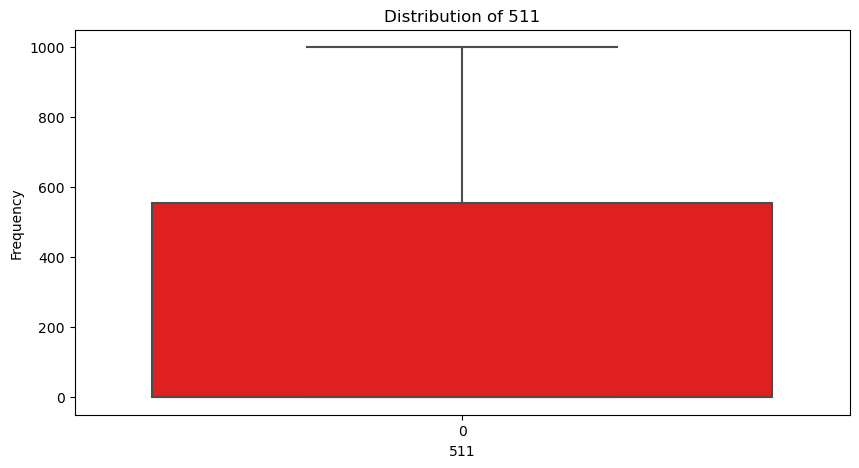

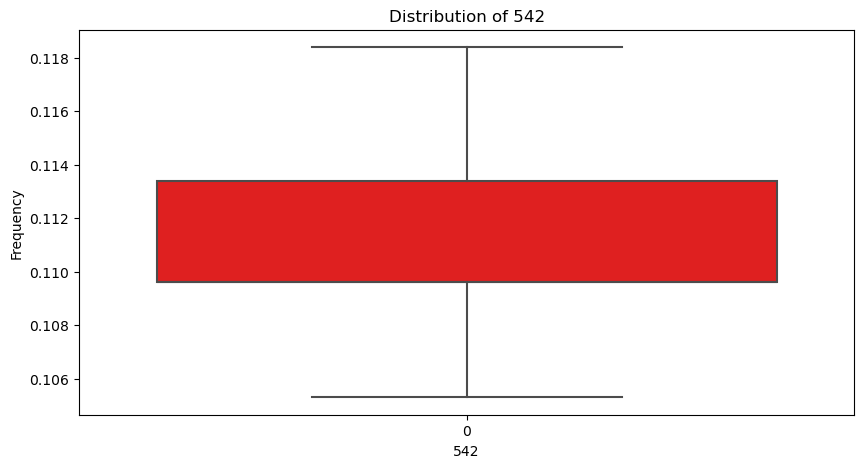

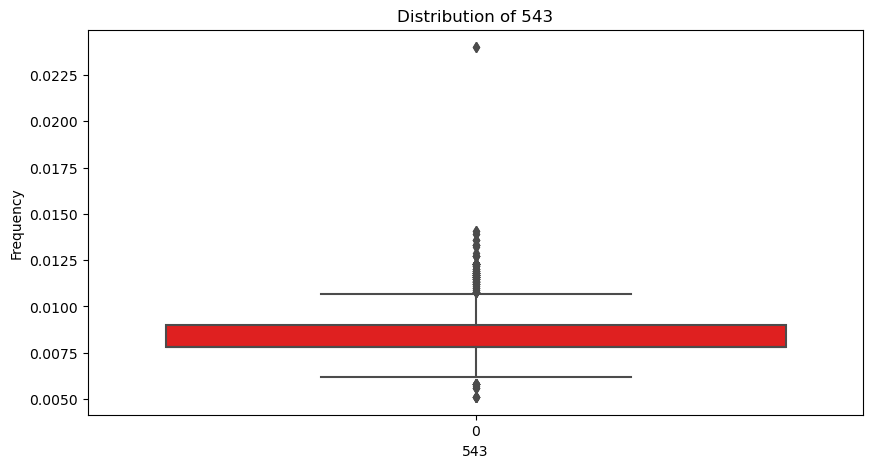

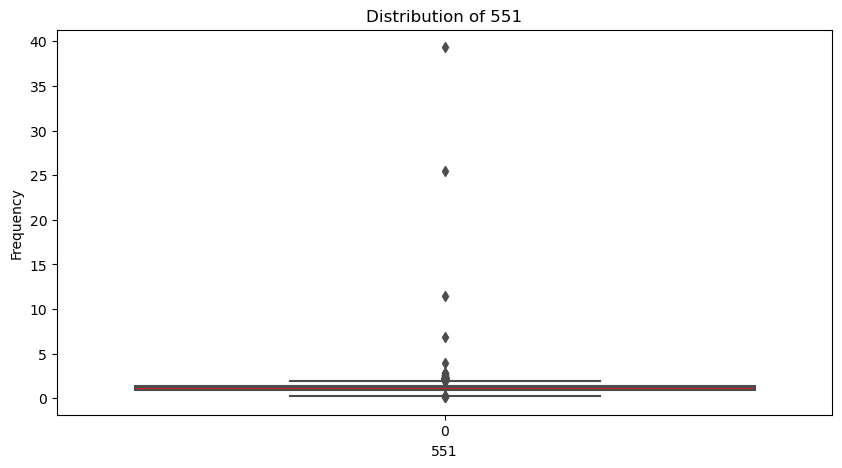

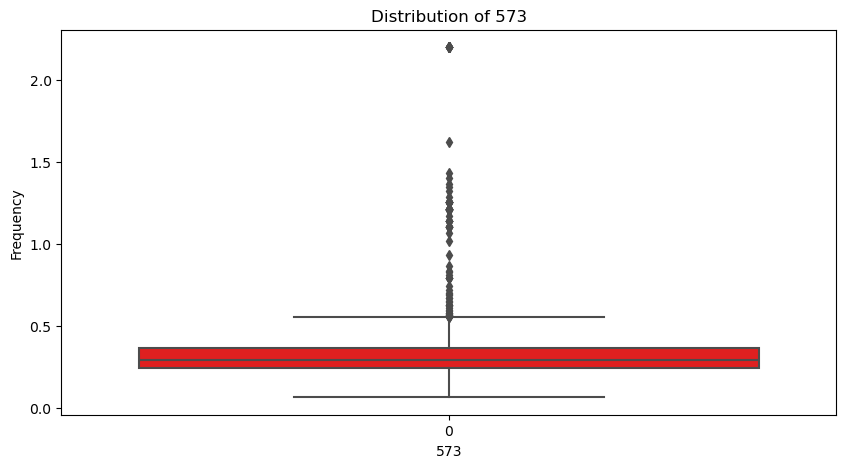

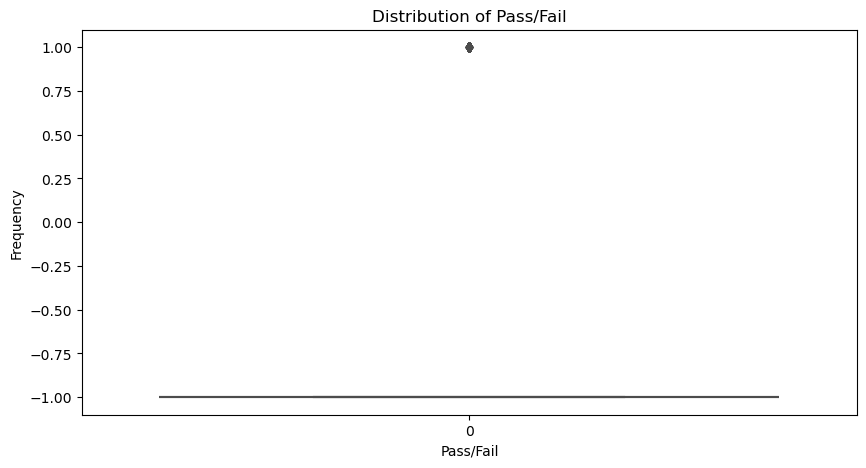

In [55]:
for col in data.columns:
    plt.figure(figsize=(10, 5))
    plt.title(f'Distribution of {col}')
    sns.boxplot(data[col], color = 'red')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# INSIGHTS FROM THE ABOVE BOXPLOTS

#### Mostly all of the features consists of outliers

In [58]:
#plt.figure(figsize=(20, 10))
#plt.title('Correlation between each feature')
#sns.pairplot(data, hue = 'Pass/Fail')
#plt.show()

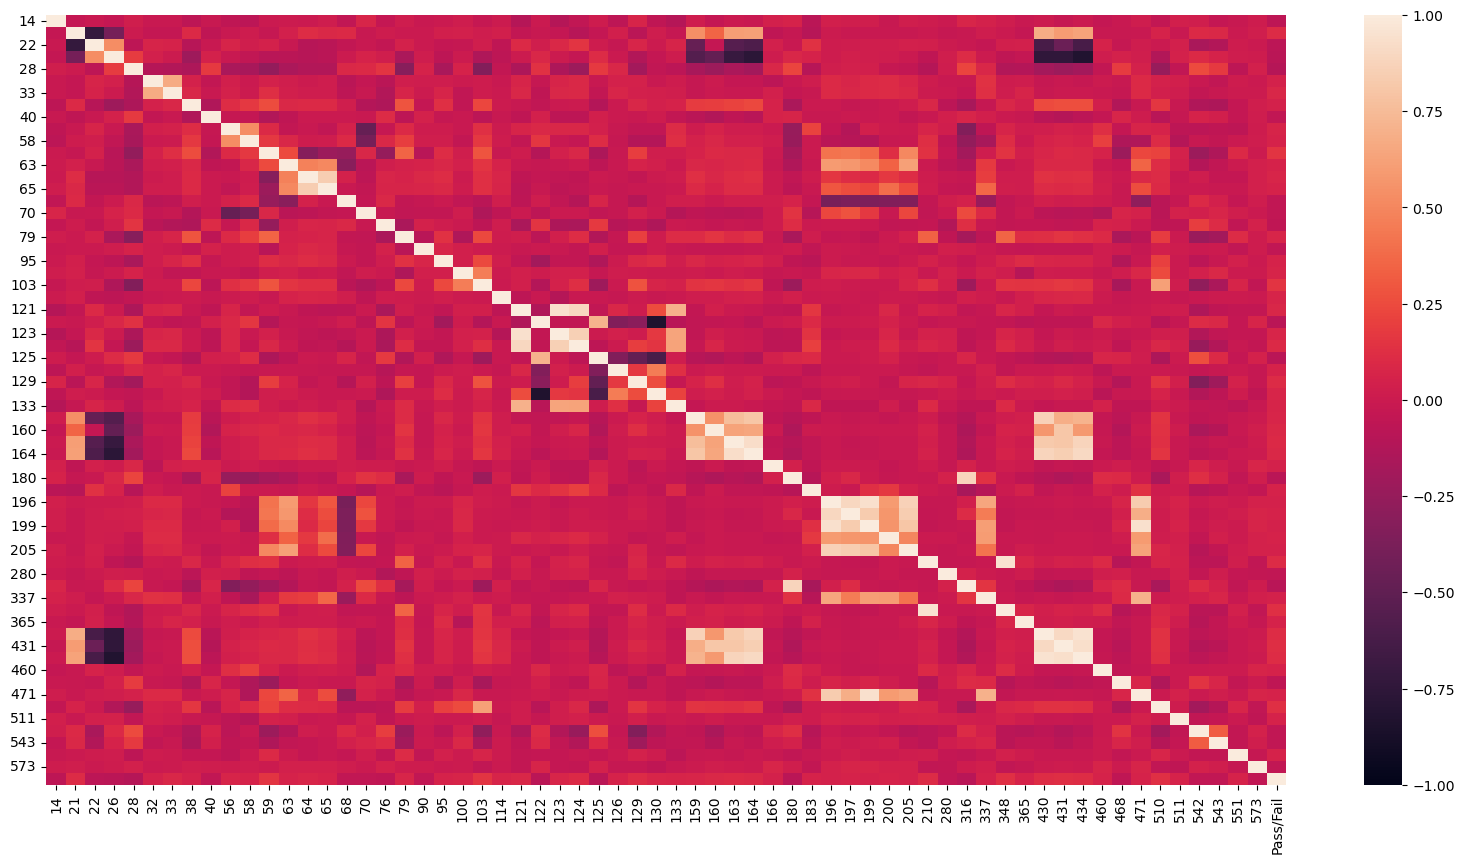

In [59]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), vmin = -1, vmax = 1)
plt.show()

# INSIGHTS FROM THE ABOVE HEATMAP

#### Their are few features having postive correlation and negative correlation

# --------------------------------------DATA PRE-PROCESSING-----------------------------------------

#### Extracting independent and dependent features

In [64]:
X = data.drop('Pass/Fail', axis = 1)
y = data[['Pass/Fail']]

In [65]:
X.head()

14        21       22    26     28     32    33     38     40    56  \
0  7.956 -5419.000 2916.500 1.773 64.233 83.397 9.513 86.956 61.290 0.932   
1 10.155 -5441.500 2604.250 2.014 68.422 84.905 9.800 87.524 78.250 0.932   
2  9.516 -5447.750 2701.750 2.030 67.133 84.757 8.659 84.733 14.370 0.914   
3  9.605 -5468.250 2648.250 2.004 62.933 84.910 8.679 86.687 76.900 0.914   
4 10.566 -5476.250 2635.250 1.991 62.833 86.327 8.768 86.147 76.390 0.930   

     58      59     63     64     65      68      70     76     79       90  \
0 4.706  -1.726 16.145 21.726 29.537 148.601 608.170 -0.021 -0.008 8671.930   
1 4.682   0.807 10.904 19.193 27.630 154.371 620.358 -0.020 -0.036 8407.030   
2 4.587  23.825 11.302 16.175 24.283 145.800 625.964 -0.033 -0.005 9317.170   
3 4.587  24.379 13.560 15.621 23.474 147.655 625.294 -0.046  0.068 8205.700   
4 4.641 -12.294 21.978 32.294 44.150 146.664 645.764  0.018  0.003 9014.460   

      95    100    103   114    121   122    123    124   125   126    129  \
0  0.000  0.000 -0.004 0.000 15.880 2.639 15.940 15.930 0.866 3.353 -0.047   
1  0.000 -0.000 -0.004 0.000 15.880 2.541 15.910 15.880 0.870 2.771 -0.095   
2  0.000  0.001 -0.003 0.000 15.900 2.882 15.940 15.950 0.880 3.094 -0.189   
3  0.000 -0.000 -0.006 0.000 15.550 3.132 15.610 15.590 1.366 2.480  0.284   
4 -0.000  0.000 -0.004 0.000 15.750 3.148 15.730 15.710 0.946 3.027 -0.568   

    130      133      159     160   163   164   166    180    183   196  \
0 0.724 1000.726 1017.000 967.000 0.090 0.048 2.000 20.950 16.713 5.380   
1 0.812  998.108  568.000  59.000 0.112 0.115 2.200 17.990 16.358 3.740   
2 0.819  998.444  562.000 788.000 0.187 0.117 2.100 17.780 22.912 5.090   
3 0.724  980.451  859.000 355.000 0.068 0.108 1.700 16.220 22.562 5.920   
4 0.778  993.127  699.000 283.000 0.147 0.040 3.900 15.240 37.715 5.520   

     197    199    200    205   210   280   316   337   348   365    430  \
0 20.100 10.620 10.300  8.640 0.077 0.020 6.270 1.599 0.021 0.017 18.767   
1 19.590 11.650  8.020  8.960 0.057 0.017 5.652 1.151 0.014 0.005 10.438   
2 19.750  9.710 16.730 13.300 0.034 0.015 5.725 1.548 0.011 0.005 10.316   
3 23.600 10.630 13.560  9.560 0.125 0.011 5.444 1.732 0.041 0.005 15.709   
4 15.760 10.710 19.770  9.090 0.091 0.012 4.896 1.622 0.025 0.006 12.764   

     431    434    460     468    471     510     511   542   543    551   573  
0 33.156 10.050 29.939 311.638  9.775  64.671   0.000 0.110 0.008  0.780 0.316  
1  2.265  8.634 40.447 463.288 10.221 141.436   0.000 0.110 0.008  1.330 0.265  
2 29.166 14.250 32.359  21.364  8.398 240.777 244.275 0.110 0.008  0.850 0.188  
3 13.405  5.176 27.682  24.283  9.149 113.559   0.000 0.110 0.008 39.330 0.174  
4 10.739 11.406 30.892  44.898  7.436 148.066   0.000 0.110 0.008  1.980 0.222

In [66]:
y.head()

Pass/Fail
0         -1
1         -1
2          1
3         -1
4         -1

In [67]:
X.shape, y.shape

((1567, 63), (1567, 1))

### Distribution of Target feature

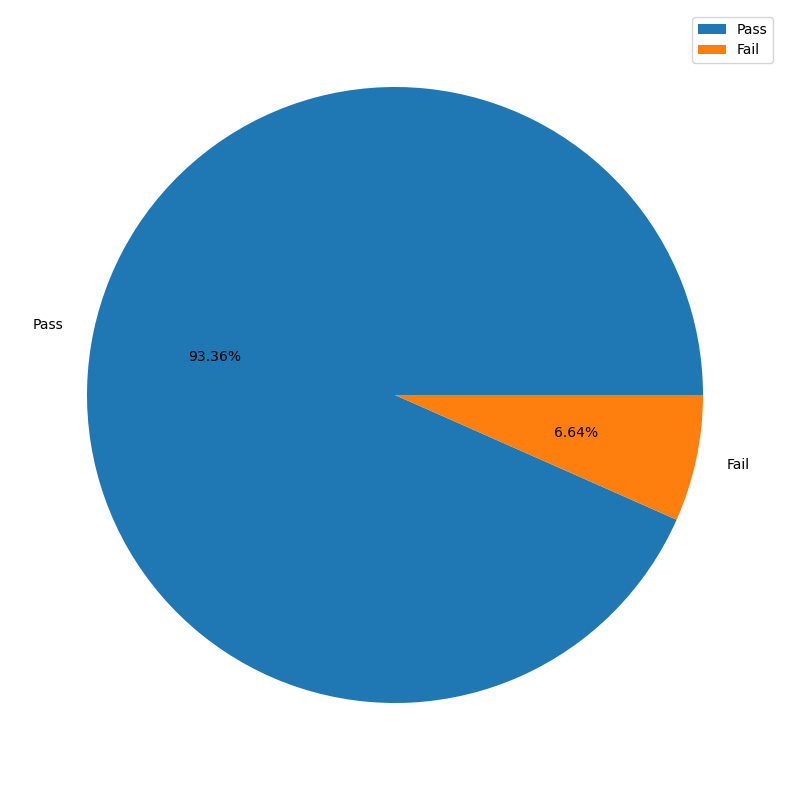

In [69]:
plt.figure(figsize =(20, 10))
plt.pie(y.value_counts(), labels = ['Pass', 'Fail'], autopct = '%.2f%%')
plt.legend()
plt.show()

# INSIGHTS FROM THE ABOVE PIE CHART

#### The target feature is completely imbalanced with 93.36% majority of 'Pass' and 6.64% minority of 'Fail'

# OVERSAMPLING USING SMOTE(SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE)

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
smote = SMOTE(random_state = 1, k_neighbors = 5)

In [75]:
x_bal, y_bal = smote.fit_resample(X, y)

In [76]:
x_bal.shape, y_bal.shape

((2926, 63), (2926, 1))

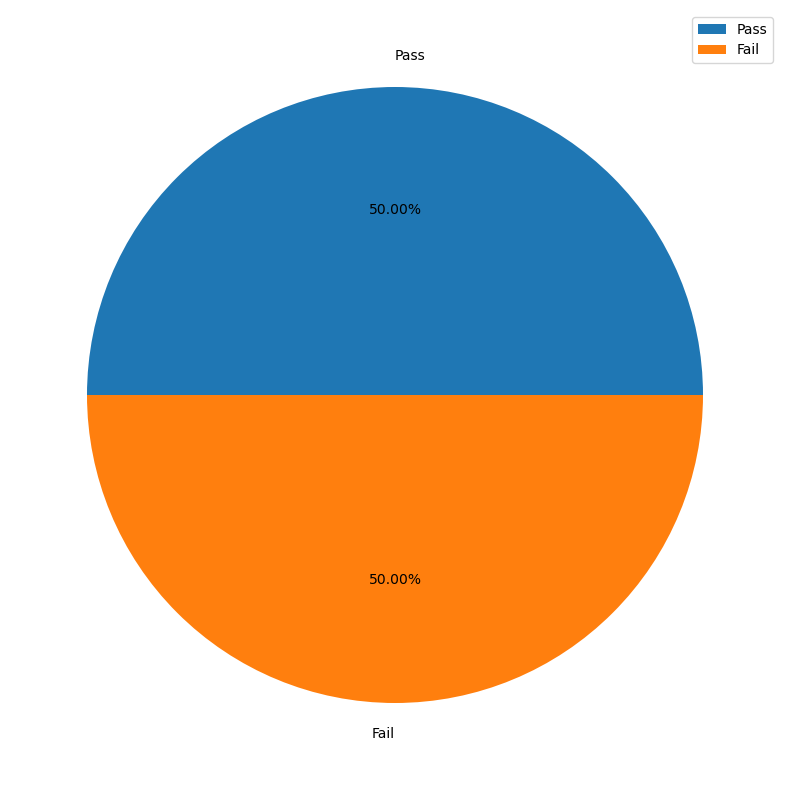

In [77]:
plt.figure(figsize =(20, 10))
plt.pie(y_bal.value_counts(), labels = ['Pass', 'Fail'], autopct = '%.2f%%')
plt.legend()
plt.show()

# SPLITTING DATA INTO TRAINING AND TESTING

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.2, random_state = 1)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2340, 63), (586, 63), (2340, 1), (586, 1))

In [522]:
x_bal.shape, y_bal.shape

((2926, 63), (2926, 1))

# STANDARDIZATION

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
std_scalar = StandardScaler()

In [85]:
x_train_std_scalar = std_scalar.fit_transform(X_train)

In [86]:
x_test_std_scalar = std_scalar.transform(X_test)

In [87]:
x_train_std_scalar.shape, x_test_std_scalar.shape

((2340, 63), (586, 63))

In [88]:
x_train_std_scalar = pd.DataFrame(x_train_std_scalar)

In [89]:
x_test_std_scalar = pd.DataFrame(x_test_std_scalar)

In [90]:
x_train_std_scalar.head()

0      1      2      3      4      5      6      7      8      9   \
0 -0.093  0.175  0.021  0.339  0.693  0.653 -0.210 -0.281 -0.756  0.009   
1 -1.082 -1.236  1.126 -0.115 -0.414 -0.362 -0.380  0.233  0.502  0.614   
2  1.334 -0.045 -0.251  0.195  2.102 -0.817 -0.515 -0.526  0.650  0.854   
3  0.211 -0.127  0.108  0.090  0.197  0.307 -0.213 -0.339  0.455  1.306   
4 -1.105  0.026 -0.230  0.265  0.069 -0.374 -0.192 -0.586  0.597 -0.093   

      10     11     12     13     14     15     16     17     18     19  \
0  1.319 -0.580 -0.398 -0.187 -0.318  0.009 -0.068 -0.274 -1.565 -0.035   
1 -0.550 -1.644 -0.281  1.615  1.099  2.471 -0.379  2.186  0.230  1.270   
2  1.567 -0.294 -0.403 -0.671 -0.830 -0.369 -1.595  1.030 -1.249  0.784   
3  0.906  0.023  3.020  2.258  1.475  0.437 -3.754 -0.385 -0.019  0.114   
4 -1.266 -0.455  0.274 -0.399 -0.383 -0.982  0.008  0.343 -0.512 -1.261   

      20     21     22     23     24     25     26     27     28     29  \
0  0.282  0.395  0.113 -0.144  0.546 -0.573  0.718  0.329 -0.197 -0.321   
1  1.274 -0.623  1.256 -0.144 -0.221 -1.299 -0.531  0.168 -0.589  0.105   
2 -0.709  0.228 -0.422 -0.144 -1.758  1.228 -1.337 -1.334  0.071 -1.115   
3  0.282  0.236  0.129 -0.144  0.083  0.481  0.252  0.314  1.665 -0.750   
4 -0.375  0.228 -0.173 -0.144  0.520  0.997  0.820  0.367  0.189 -0.110   

      30     31     32     33     34     35     36     37     38     39  \
0 -0.681  0.981 -0.273 -0.171 -0.290 -0.180 -0.205 -0.097 -0.078  0.352   
1  0.325  0.908  1.283 -0.453  0.307 -0.333 -0.293 -0.988  3.013  0.835   
2 -0.235 -1.195 -0.003 -0.400 -0.316 -0.264  0.124 -0.270  0.117 -0.902   
3  0.180 -0.766  1.580 -0.080 -0.100 -0.133 -0.096 -0.064 -0.572  0.733   
4  0.171  0.018  0.358 -0.241 -0.408 -0.136 -0.137  0.209  1.282  0.308   

      40     41     42     43     44     45     46     47     48     49  \
0 -0.066 -0.351  0.183  0.157 -0.463 -0.467 -0.204 -0.109  0.006 -0.322   
1  0.024  0.057 -0.129  0.810  0.566 -0.402 -1.164  2.171  0.177 -0.427   
2 -0.294 -0.390 -0.422 -0.131 -0.172  0.474 -0.120 -0.169 -0.433 -0.028   
3  0.054 -0.547  0.032  0.256 -0.337  0.512 -0.493 -0.514  0.603  0.612   
4  0.573  0.511  0.863  1.245 -0.016  0.361 -0.040  1.277  1.451  0.278   

      50     51     52     53     54     55     56     57     58     59  \
0  0.337 -0.178 -0.231 -0.199 -0.750  0.243  0.256  1.340  1.078 -0.126   
1  0.067 -0.312 -0.045 -0.182  1.403 -0.468 -0.052 -0.150 -0.935 -0.577   
2 -0.769 -0.271 -0.230 -0.215 -0.813 -0.058 -0.504 -0.604 -0.935 -0.990   
3 -0.454 -0.107 -0.121 -0.118  0.417 -0.073  0.418 -0.361  1.378 -0.576   
4 -0.745 -0.209 -0.274 -0.186  0.858 -0.912  1.166 -0.294 -0.935  0.585   

      60     61     62  
0  1.215 -0.152 -0.462  
1 -0.411 -0.649 -1.157  
2 -1.349 -0.156  0.144  
3 -0.394  0.129 -0.056  
4  0.163  0.006  0.821

In [91]:
x_test_std_scalar.head()

0      1      2      3      4      5      6      7      8      9   \
0 -0.573 -1.178  0.805 -0.168 -1.231  0.572 -0.073 -0.417  0.585 -0.788   
1  1.597  0.227 -0.026  0.320 -1.614 -0.575  0.066  0.769 -0.130  0.670   
2 -0.339 -0.707 -0.122  0.217 -0.097 -0.471 -0.370  0.235  0.074  0.179   
3 -1.374 -0.041 -0.075  0.319  0.049 -0.621  0.936  1.256  0.604  0.042   
4  1.127  0.036  0.167  0.338  0.316 -0.447 -0.319 -0.245  0.596 -0.096   

      10     11     12     13     14     15     16     17     18     19  \
0  0.266 -0.395  0.416 -0.500 -0.296 -0.543 -1.070 -0.681 -0.101 -0.368   
1  1.532 -0.348  1.945  2.986  2.839  0.538 -0.986 -1.196  0.597  3.313   
2 -0.565  1.509 -0.151 -0.157  0.135 -0.972  0.369  0.216  1.354 -0.112   
3  0.028 -0.033  1.261  2.453  1.504  1.800 -2.220 -0.466  0.427  0.421   
4  0.173  0.178  1.545  1.085  0.939 -0.460 -1.191 -0.121 -0.336  0.340   

      20     21     22     23     24     25     26     27     28     29  \
0 -1.701 -1.474 -0.817 -0.144  0.218 -1.316  0.174 -0.770  0.710  0.179   
1  1.274  0.512  1.157 -0.144 -0.990  0.451 -0.733 -0.864  0.091 -0.636   
2  0.933 -0.153  1.048 -0.144  1.010 -1.005  0.883  1.017  0.122  0.111   
3  1.274 -0.906  1.124 -0.144  0.108 -0.760  0.577  0.168 -0.085 -0.615   
4  0.993 -0.055  0.429 -0.144  0.091 -0.417 -0.113 -0.487  0.374 -0.294   

      30     31     32     33     34     35     36     37     38     39  \
0 -2.146  0.548  0.707 -0.576 -0.653 -0.606 -0.339 -0.342  1.058 -0.553   
1  0.138 -0.572 -1.029 -0.467 -0.716 -0.397 -0.220 -0.413 -0.227  0.889   
2  0.788  1.071  0.990  0.940 -0.106  0.278 -0.265 -1.119  0.059  0.425   
3 -0.095  0.210 -0.460 -0.589 -0.670 -0.587 -0.351 -0.701 -0.041  1.087   
4 -0.442  0.081  0.146 -0.374  0.257 -0.132 -0.120  0.191 -0.715 -1.434   

      40     41     42     43     44     45     46     47     48     49  \
0 -0.274 -0.076 -0.385  0.084 -0.501  4.671 -1.241  0.351 -0.482  3.062   
1 -0.118 -0.180 -0.319 -0.367  0.296  0.529 -0.159 -0.491 -0.040  0.260   
2 -0.215  0.363 -0.236 -0.353  0.110 -0.002 -0.409  0.018 -0.294  0.038   
3  0.075  0.172 -0.058  0.469  1.082 -0.810 -0.197 -0.503  0.518 -0.881   
4 -0.236 -0.697 -0.181 -1.033 -0.178 -0.568 -1.027 -0.639 -0.321 -0.453   

      50     51     52     53     54     55     56    57     58     59     60  \
0 -0.455 -0.351 -0.400 -0.268 -0.121  0.545 -0.447 0.782  1.080  0.538 -1.974   
1  0.032 -0.290 -0.413 -0.245  0.141  0.796 -0.364 0.941 -0.935 -0.577 -0.411   
2 -0.600  0.171 -0.143 -0.092 -0.207 -0.762 -0.312 0.550 -0.672 -0.577 -0.411   
3 -0.455 -0.342 -0.393 -0.290 -1.256  0.070  0.160 1.215  1.033 -0.577 -0.411   
4  0.943 -0.259 -0.004 -0.187  0.335 -0.177 -0.121 0.077  1.427 -0.776 -0.522   

      61     62  
0  0.297 -0.007  
1 -0.603  0.577  
2 -0.449 -0.315  
3 -0.439  1.326  
4 -0.073  0.273

# Statistical analysis of original data w.r.t data of X_train and X_test

In [93]:
data.describe().T

count      mean     std       min       25%       50%       75%  \
14        1567.000     9.005   2.794     2.249     7.097     8.974    10.859   
21        1567.000 -5618.394 626.422 -7150.250 -5932.625 -5523.250 -5356.625   
22        1567.000  2699.378 295.310     0.000  2578.125  2664.000  2840.625   
26        1567.000     1.938   0.189     0.000     1.907     1.986     2.003   
28        1567.000    69.500   3.459    59.400    67.383    69.156    72.256   
32        1567.000    85.337   2.026    83.183    84.490    85.140    85.742   
33        1567.000     8.960   1.344     7.603     8.580     8.770     9.061   
38        1567.000    86.837   0.447    84.733    86.578    86.821    87.002   
40        1567.000    67.905  23.878     1.434    74.240    78.270    80.180   
56        1567.000     0.929   0.007     0.875     0.925     0.931     0.933   
58        1567.000     4.593   0.085     4.220     4.532     4.573     4.669   
59        1567.000     2.960   9.511   -28.988    -1.855     0.974     4.338   
63        1567.000    13.990   7.104     1.659    10.384    13.263    16.325   
64        1567.000    20.542   4.966     6.448    17.377    20.044    22.800   
65        1567.000    27.132   7.106     4.308    23.074    26.275    29.907   
68        1567.000   147.438   4.232    87.025   145.242   147.593   149.936   
70        1567.000   619.102   9.521   581.777   612.784   619.062   625.160   
76        1567.000    -0.029   0.033    -0.186    -0.051    -0.029    -0.007   
79        1567.000     0.003   0.023    -0.057    -0.011     0.001     0.013   
90        1567.000  8827.537 389.807  7397.310  8578.570  8827.537  9055.260   
95        1567.000     0.000   0.000    -0.001     0.000     0.000     0.000   
100       1567.000    -0.000   0.000    -0.003    -0.000     0.000     0.000   
103       1567.000    -0.010   0.003    -0.033    -0.012    -0.010    -0.008   
114       1567.000     0.000   0.002     0.000     0.000     0.000     0.000   
121       1567.000    15.796   0.099    15.460    15.730    15.790    15.860   
122       1567.000     3.898   0.902     1.671     3.202     3.879     4.392   
123       1567.000    15.830   0.108    15.170    15.770    15.830    15.900   
124       1567.000    15.795   0.114    15.430    15.730    15.780    15.870   
125       1567.000     1.185   0.280     0.312     0.974     1.144     1.338   
126       1567.000     2.751   0.253     2.340     2.574     2.736     2.873   
129       1567.000    -0.554   1.217    -3.779    -0.899    -0.142     0.047   
130       1567.000     0.745   0.082     0.420     0.689     0.759     0.815   
133       1567.000  1004.043   6.521   980.451  1000.045  1004.043  1008.671   
159       1567.000   882.681 982.415     0.000   411.500   623.000   963.500   
160       1567.000   555.346 574.441     0.000   295.000   438.000   624.500   
163       1567.000     0.140   0.122     0.000     0.091     0.120     0.154   
164       1567.000     0.128   0.242     0.000     0.069     0.089     0.116   
166       1567.000     2.789   1.119     0.800     2.100     2.600     3.200   
180       1567.000    19.013   3.311     9.400    16.850    18.690    20.965   
183       1567.000    26.661   6.834     5.014    21.172    27.197    31.687   
196       1567.000     8.688  15.686     1.750     5.045     6.800     9.510   
197       1567.000    20.093  10.532     9.220    17.150    19.390    21.450   
199       1567.000    11.532  16.414     2.770     6.745     8.570    11.500   
200       1567.000    17.600   8.671     3.210    14.175    17.280    20.160   
205       1567.000     9.050  11.519     2.300     6.050     7.760     9.930   
210       1567.000     0.089   0.042     0.032     0.066     0.080     0.099   
280       1567.000     0.018   0.006     0.007     0.014     0.017     0.021   
316       1567.000     5.977   1.018     2.788     5.302     5.832     6.547   
337       1567.000     2.327   1.696     0.000     1.544     2.060     2.780   
348       156

In [94]:
X_train.describe().T

count      mean      std       min       25%       50%       75%  \
14  2340.000     8.653    2.584     2.249     6.789     8.633    10.393   
21  2340.000 -5514.459  784.048 -7150.250 -5733.438 -5482.125 -5334.087   
22  2340.000  2660.227  365.924     0.000  2579.692  2651.350  2782.772   
26  2340.000     1.917    0.257     0.000     1.949     1.987     2.001   
28  2340.000    68.910    3.195    59.400    67.031    68.676    70.878   
32  2340.000    85.484    2.088    83.183    84.665    85.215    85.720   
33  2340.000     9.130    1.612     8.079     8.654     8.835     9.134   
38  2340.000    86.887    0.496    84.733    86.596    86.840    87.027   
40  2340.000    65.627   22.949     1.434    65.010    77.330    79.335   
56  2340.000     0.930    0.005     0.875     0.927     0.931     0.933   
58  2340.000     4.604    0.074     4.220     4.544     4.600     4.662   
59  2340.000     5.345    9.496   -28.988    -0.517     2.798     9.489   
63  2340.000    14.785    6.740     1.659    10.887    13.531    17.244   
64  2340.000    21.212    5.609     6.448    17.445    20.347    24.152   
65  2340.000    27.863    7.337     4.308    23.127    26.996    31.324   
68  2340.000   147.209    4.307    87.025   145.115   147.283   149.629   
70  2340.000   617.998    9.185   581.777   612.261   618.293   623.813   
76  2340.000    -0.033    0.030    -0.186    -0.053    -0.034    -0.012   
79  2340.000     0.006    0.022    -0.057    -0.009     0.003     0.017   
90  2340.000  8782.892  338.972  7397.310  8577.311  8771.903  8981.325   
95  2340.000     0.000    0.000    -0.001     0.000     0.000     0.000   
100 2340.000     0.000    0.000    -0.003    -0.000     0.000     0.000   
103 2340.000    -0.009    0.003    -0.033    -0.011    -0.009    -0.007   
114 2340.000     0.000    0.002     0.000     0.000     0.000     0.000   
121 2340.000    15.810    0.091    15.460    15.750    15.806    15.870   
122 2340.000     3.794    0.782     1.671     3.205     3.700     4.255   
123 2340.000    15.843    0.099    15.170    15.786    15.840    15.900   
124 2340.000    15.812    0.107    15.430    15.740    15.800    15.880   
125 2340.000     1.146    0.244     0.312     0.974     1.104     1.273   
126 2340.000     2.772    0.244     2.340     2.611     2.745     2.875   
129 2340.000    -0.329    1.014    -3.779    -0.568    -0.092     0.157   
130 2340.000     0.754    0.071     0.420     0.709     0.764     0.812   
133 2340.000  1004.610    5.804   984.038  1001.255  1004.538  1008.712   
159 2340.000   972.958 1143.929     0.000   439.773   656.500   955.236   
160 2340.000   617.460  637.798     0.000   335.908   470.052   632.000   
163 2340.000     0.161    0.158     0.000     0.100     0.130     0.160   
164 2340.000     0.158    0.328     0.000     0.071     0.091     0.117   
166 2340.000     2.876    1.393     0.800     2.200     2.700     3.200   
180 2340.000    18.496    2.849     9.400    16.630    18.210    20.130   
183 2340.000    27.248    5.956     5.014    22.565    28.132    31.536   
196 2340.000     9.331   15.979     1.830     5.306     7.175     9.623   
197 2340.000    20.545    9.585     9.220    17.718    19.748    21.504   
199 2340.000    12.124   16.585     2.770     7.114     8.755    11.728   
200 2340.000    18.192    7.741     3.210    15.228    17.770    20.420   
205 2340.000     9.888   10.072     2.300     6.646     8.634    11.189   
210 2340.000     0.096    0.049     0.034     0.069     0.084     0.108   
280 2340.000     0.018    0.005     0.007     0.014     0.017     0.020   
316 2340.000     5.812    0.897     2.788     5.213     5.700     6.228   
337 2340.000     2.413    1.866     0.000     1.602     2.122     2.844   
348 2340.000     0.027    0.016     0.010     0.020     0.024     0.030   
365 2340.000     0.006    0.003     0.002     0.004     0.005     0.006   
430 2340.000    24.271   55.284     0.000     7.635    12.012    17.337   
431 2340.000    28.942   55.318 

In [95]:
X_test.describe().T

count      mean      std       min       25%       50%       75%  \
14  586.000     8.679    2.511     2.970     6.887     8.725    10.362   
21  586.000 -5464.571  800.878 -6874.242 -5690.625 -5473.750 -5305.906   
22  586.000  2647.385  390.706   613.531  2575.202  2635.178  2754.506   
26  586.000     1.909    0.273     0.439     1.955     1.987     2.003   
28  586.000    68.868    3.344    59.967    66.986    68.679    70.956   
32  586.000    85.473    2.128    83.183    84.693    85.179    85.713   
33  586.000     9.069    1.350     7.603     8.656     8.844     9.130   
38  586.000    86.849    0.548    84.733    86.564    86.821    86.983   
40  586.000    65.179   23.154     2.126    64.390    77.155    79.480   
56  586.000     0.929    0.007     0.876     0.927     0.931     0.933   
58  586.000     4.603    0.085     4.220     4.542     4.597     4.668   
59  586.000     5.244    9.309   -15.310    -0.732     2.629     9.049   
63  586.000    14.045    5.906     3.150    10.471    13.198    16.721   
64  586.000    21.050    5.407     7.114    17.326    20.174    23.820   
65  586.000    27.552    6.869     9.623    23.193    26.345    30.677   
68  586.000   147.561    3.406   127.589   145.385   147.436   149.884   
70  586.000   619.022    8.364   596.418   613.361   618.922   624.705   
76  586.000    -0.033    0.029    -0.128    -0.051    -0.032    -0.015   
79  586.000     0.007    0.023    -0.049    -0.008     0.004     0.019   
90  586.000  8792.414  343.124  7889.870  8592.519  8764.021  8964.463   
95  586.000     0.000    0.000    -0.001     0.000     0.000     0.000   
100 586.000     0.000    0.000    -0.002    -0.000     0.000     0.000   
103 586.000    -0.009    0.003    -0.017    -0.011    -0.009    -0.007   
114 586.000     0.000    0.002     0.000     0.000     0.000     0.000   
121 586.000    15.812    0.091    15.500    15.750    15.801    15.866   
122 586.000     3.771    0.766     1.671     3.175     3.720     4.250   
123 586.000    15.847    0.098    15.540    15.787    15.840    15.907   
124 586.000    15.815    0.109    15.470    15.740    15.805    15.890   
125 586.000     1.140    0.243     0.312     0.974     1.099     1.244   
126 586.000     2.747    0.198     2.377     2.609     2.742     2.852   
129 586.000    -0.326    1.033    -3.779    -0.615    -0.095     0.236   
130 586.000     0.758    0.069     0.420     0.720     0.766     0.815   
133 586.000  1004.761    5.967   980.451  1001.392  1004.807  1008.916   
159 586.000  1043.599 1274.231    74.920   457.076   670.000   988.078   
160 586.000   669.411  756.288    38.000   327.346   461.980   637.000   
163 586.000     0.167    0.174     0.021     0.099     0.131     0.160   
164 586.000     0.174    0.362     0.012     0.071     0.094     0.118   
166 586.000     2.865    1.382     1.000     2.200     2.700     3.200   
180 586.000    18.674    3.033    11.500    16.662    18.253    20.200   
183 586.000    27.184    6.134     5.381    22.787    28.233    31.607   
196 586.000     8.575   12.689     1.750     5.075     6.881     9.367   
197 586.000    20.356   11.304     9.750    17.582    19.545    21.238   
199 586.000    11.796   13.411     3.100     7.080     8.880    11.876   
200 586.000    17.739    8.597     4.519    14.703    17.615    20.249   
205 586.000     9.367    8.170     3.090     6.445     8.285    10.959   
210 586.000     0.098    0.048     0.032     0.070     0.087     0.111   
280 586.000     0.018    0.006     0.008     0.014     0.017     0.020   
316 586.000     5.825    0.933     3.781     5.216     5.673     6.314   
337 586.000     2.224    0.981     0.537     1.535     2.040     2.691   
348 586.000     0.028    0.017     0.011     0.020     0.025     0.031   
365 586.000     0.006    0.003     0.002     0.004     0.005     0.006   
430 586.000    26.787   59.242     1.368     7.925    12.221    17.993   
431 586.000    31.817   59.476     1.700    12.363    17.325    22.586   
434 586.00

# INSIGHTS

### From above statistical analysis we can notice that their is slight change in standard deviation of the original data w.r.t X_train & X_test

# ----------------------MODEL TRAINING , TESTING & HYPERPARAMETER TUNING-------------------

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [110]:
def fetch_classification_report(actuals, predictions, labels):
    print('Classification report')
    print(metrics.classification_report(actuals, predictions, labels = labels))

    cm = metrics.confusion_matrix(actuals, predictions, labels=labels)
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm_df, annot = True, cmap = 'coolwarm', fmt='g')
    plt.title('Confusion matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

#### Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

In [115]:
lr = LogisticRegression()

In [117]:
lr.fit(x_train_std_scalar, y_train)

LogisticRegression()

Classification report
              precision    recall  f1-score   support

          -1       0.85      0.81      0.83      1163
           1       0.82      0.86      0.84      1177

    accuracy                           0.83      2340
   macro avg       0.83      0.83      0.83      2340
weighted avg       0.83      0.83      0.83      2340



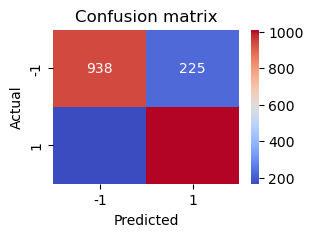

In [119]:
fetch_classification_report(actuals = y_train, predictions = lr.predict(x_train_std_scalar), labels = y['Pass/Fail'].unique())

In [121]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

### Leave One-Out cross validation(LOO)

In [124]:
loo = LeaveOneOut()

In [126]:
loo_score = cross_val_score(LogisticRegression(), x_train_std_scalar, y_train, cv = loo)

In [127]:
loo_score[0:9]

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [128]:
print(f'----The overall accuracy is {loo_score.mean()*100}-----------')

----The overall accuracy is 81.7094017094017-----------


In [129]:
print(f'-------The overall accuracy w.r.t standard-deviation : {loo_score.std()*100}--------------')

-------The overall accuracy w.r.t standard-deviation : 38.65894260364337--------------


### K-fold cross validation

In [134]:
from sklearn.model_selection import KFold

In [136]:
k_fold = KFold(n_splits=10, shuffle=True, random_state = 1)

In [138]:
k_fold_score = cross_val_score(LogisticRegression(), x_train_std_scalar, y_train, cv = k_fold)

In [140]:
k_fold_score

array([0.80769231, 0.82905983, 0.79059829, 0.86752137, 0.82051282,
       0.81623932, 0.81196581, 0.84188034, 0.8034188 , 0.82051282])

In [142]:
print(f'----The overall accuracy is {k_fold_score.mean()*100}-----------')

----The overall accuracy is 82.09401709401709-----------


In [144]:
print(f'-------The overall accuracy w.r.t standard-deviation : {k_fold_score.std()*100}--------------')

-------The overall accuracy w.r.t standard-deviation : 2.044593797248836--------------


### Stratified K-fold cross validation

In [146]:
from sklearn.model_selection import StratifiedKFold

In [148]:
skfcv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [150]:
skfcv_score = cross_val_score(LogisticRegression(), x_train_std_scalar, y_train, cv = skfcv)

In [152]:
skfcv_score

array([0.81196581, 0.81623932, 0.82905983, 0.83760684, 0.82051282,
       0.8034188 , 0.82478632, 0.83333333, 0.78632479, 0.84188034])

In [154]:
print(f'----The overall accuracy is {skfcv_score.mean()*100}-----------')

----The overall accuracy is 82.05128205128204-----------


In [156]:
print(f'-------The overall accuracy w.r.t standard-deviation : {skfcv_score.std()*100}--------------')

-------The overall accuracy w.r.t standard-deviation : 1.598998883236728--------------


### Hyperparameter tunning of LogisticRegression

In [158]:
lr_params = {'penalty' : ['l1', 'l2', 'elasticnet', None]}

In [160]:
from sklearn.model_selection import GridSearchCV

### GridSearchCV

In [162]:
grid_search = GridSearchCV(LogisticRegression(), param_grid = lr_params)
grid_search.fit(x_train_std_scalar, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None]})

In [164]:
print(f'----Best parameter : {grid_search.best_params_}')

----Best parameter : {'penalty': None}


In [166]:
lr_best_est = grid_search.best_estimator_

In [206]:
lr_best_params = grid_search.best_params_
lr_best_params

{'penalty': None}

In [168]:
lr_best_est.fit(x_train_std_scalar, y_train)

LogisticRegression(penalty=None)

Classification report
              precision    recall  f1-score   support

          -1       0.84      0.80      0.82      1163
           1       0.81      0.85      0.83      1177

    accuracy                           0.83      2340
   macro avg       0.83      0.83      0.83      2340
weighted avg       0.83      0.83      0.83      2340



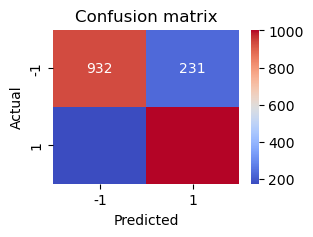

In [170]:
fetch_classification_report(actuals = y_train, predictions = lr_best_est.predict(x_train_std_scalar), labels = y['Pass/Fail'].unique())

### RandomizedSearchCV

In [172]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
random_csv = RandomizedSearchCV(LogisticRegression(), param_distributions = lr_params, random_state = 1)
random_csv.fit(x_train_std_scalar, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'penalty': ['l1', 'l2', 'elasticnet',
                                                    None]},
                   random_state=1)

In [176]:
random_csv.best_params_

{'penalty': None}

In [178]:
lr_rdscv = random_csv.best_estimator_
lr_rdscv.fit(x_train_std_scalar, y_train)

LogisticRegression(penalty=None)

Classification report
              precision    recall  f1-score   support

          -1       0.84      0.80      0.82      1163
           1       0.81      0.85      0.83      1177

    accuracy                           0.83      2340
   macro avg       0.83      0.83      0.83      2340
weighted avg       0.83      0.83      0.83      2340



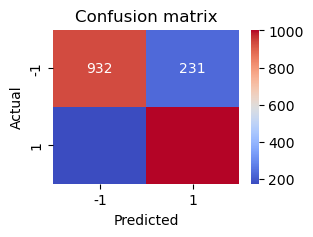

In [180]:
fetch_classification_report(actuals = y_train, predictions = lr_rdscv.predict(x_train_std_scalar), labels = y['Pass/Fail'].unique())

# ----------------------IMPLEMENTATING Principal Component Analysis (PCA)-----------------------

### PCA with 40 components

In [182]:
from sklearn.decomposition import PCA

In [184]:
pca40 = PCA(n_components = 40)

In [186]:
pca40.fit(x_train_std_scalar)

PCA(n_components=40)

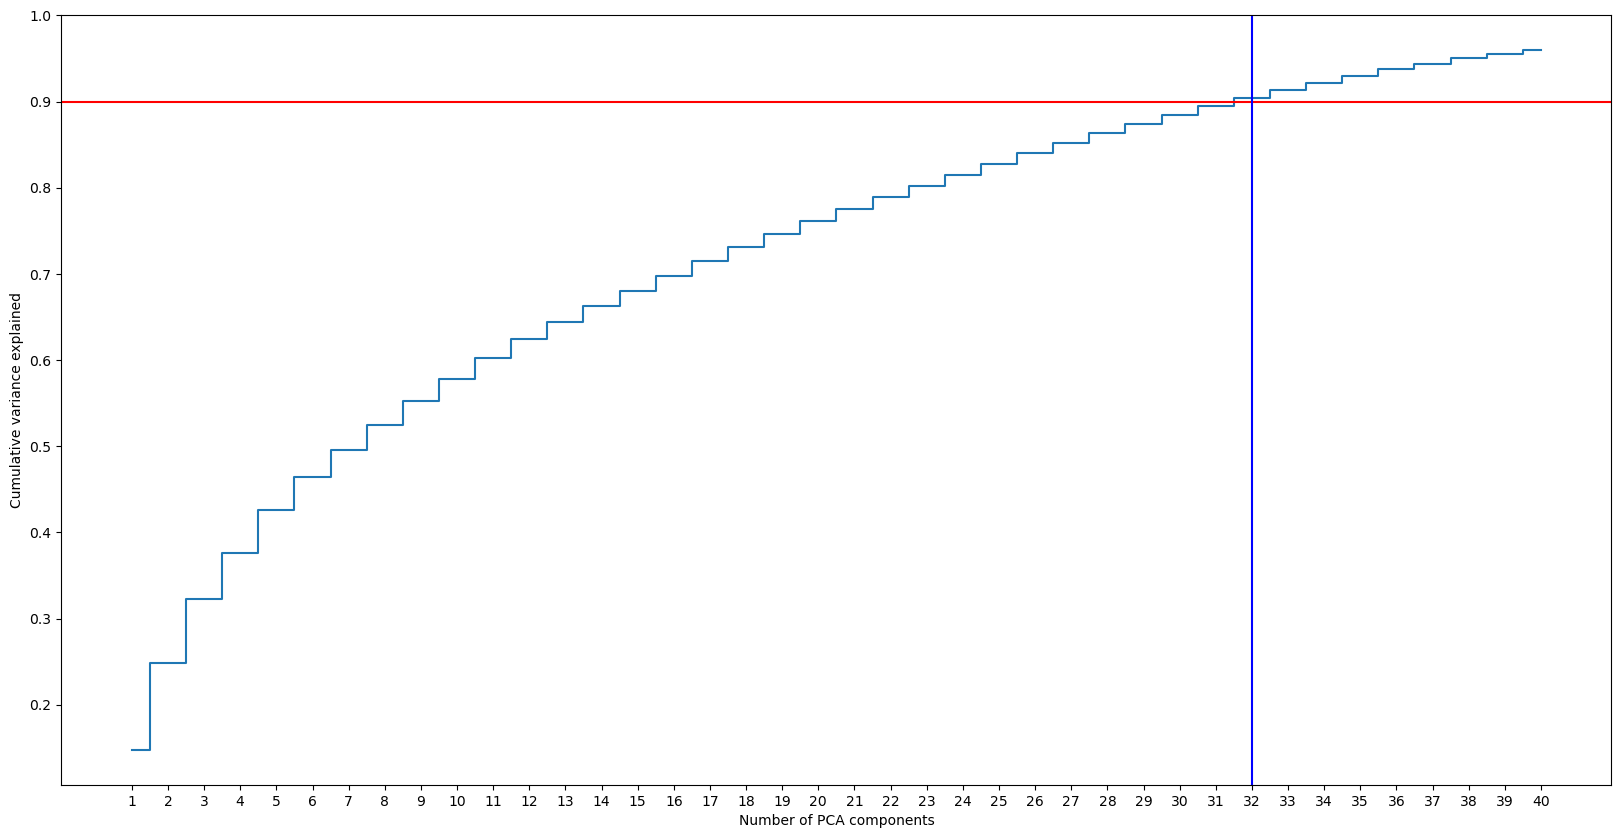

Number of components explaining at least 90% variance: 32


In [188]:
# Cumulative variance explained
cumulative_variance = np.cumsum(pca40.explained_variance_ratio_)

# Find the number of components that explain at least 90% of the variance
num_components_90_variance = np.argmax(cumulative_variance >= 0.9) + 1

# Plot the cumulative variance explained
plt.figure(figsize=(20, 10))
plt.step(list(range(1, 41)), cumulative_variance, where='mid')
plt.ylabel('Cumulative variance explained')
plt.xlabel('Number of PCA components')
plt.xticks(list(range(1, 41)))
plt.axhline(0.9, color='r')
plt.axvline(num_components_90_variance, color='b')
plt.show()

print(f"Number of components explaining at least 90% variance: {num_components_90_variance}")

In [190]:
pca_32 = PCA(n_components = 32)
pca_32.fit(x_train_std_scalar)

PCA(n_components=32)

In [194]:
x_train_pca_32 = pca_32.transform(x_train_std_scalar)

In [214]:
x_train_pca_32.shape

(2340, 32)

In [200]:
x_test_pca_32 = pca_32.transform(x_test_std_scalar)

In [202]:
x_test_pca_32.shape

(586, 32)

In [218]:
lr_pca_32 = LogisticRegression(**lr_best_params)
lr_pca_32.fit(x_train_pca_32, y_train)

LogisticRegression(penalty=None)

Classification report
              precision    recall  f1-score   support

          -1       0.79      0.76      0.78      1163
           1       0.77      0.80      0.78      1177

    accuracy                           0.78      2340
   macro avg       0.78      0.78      0.78      2340
weighted avg       0.78      0.78      0.78      2340



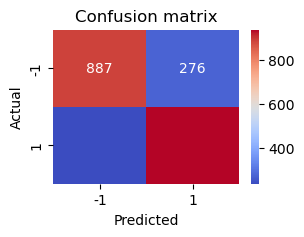

In [226]:
fetch_classification_report(actuals = y_train, predictions = lr_pca_32.predict(x_train_pca_32), labels = y['Pass/Fail'].unique())

# INSIGHTS ABOUT LOGISTICREGRESSION

### The model accuracy is 83% when trained on 62 features of train data
### But the model accuracy is 78% when trained on 32 featues after performing PCA

Classification report
              precision    recall  f1-score   support

          -1       0.78      0.74      0.76       300
           1       0.74      0.78      0.76       286

    accuracy                           0.76       586
   macro avg       0.76      0.76      0.76       586
weighted avg       0.76      0.76      0.76       586



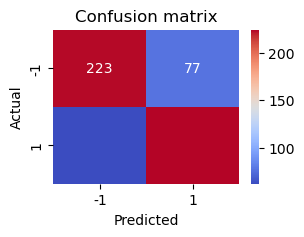

In [235]:
fetch_classification_report(actuals = y_test, predictions = lr_pca_32.predict(x_test_pca_32), labels = y['Pass/Fail'].unique())

### The model accuracy is 76% when trained on 32 features of test data

In [240]:
def best_estimator(model, params, x, y):
    randomized_search = RandomizedSearchCV(model, param_distributions = params, random_state = 1, n_jobs = -1)
    randomized_search.fit(x, y)
    print(f'--------Best score : {randomized_search.best_score_}--------------')
    print(f'---------Best parameters : {randomized_search.best_params_}')
    return randomized_search.best_estimator_, randomized_search.best_params_

# SUPPORT VECTOR CLASSIFIER

In [243]:
from sklearn.svm import SVC

In [247]:
svc = SVC()
svc.fit(x_train_pca_32, y_train)

SVC()

Classification report
              precision    recall  f1-score   support

          -1       0.98      0.94      0.96      1163
           1       0.94      0.98      0.96      1177

    accuracy                           0.96      2340
   macro avg       0.96      0.96      0.96      2340
weighted avg       0.96      0.96      0.96      2340



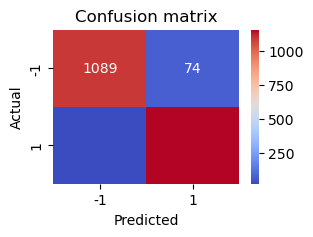

In [249]:
fetch_classification_report(actuals = y_train, predictions = svc.predict(x_train_pca_32), labels = y['Pass/Fail'].unique())

# HYPERPARAMETER TUNNING OF SVC

In [252]:
params = {'C' : [10, 100], 'kernel' : ['rbf', 'linear'], 'gamma' : [0.1, 0.05]}

In [254]:
svc_best_est, svc_best_params = best_estimator(model = SVC(), params = params, x = x_train_pca_32, y = y_train)

--------Best score : 0.9841880341880342--------------
---------Best parameters : {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


# KNeighborsClassifier

In [257]:
from sklearn.neighbors import KNeighborsClassifier

In [259]:
knc = KNeighborsClassifier()

In [261]:
knc.fit(x_train_pca_32, y_train)

KNeighborsClassifier()

Classification report
              precision    recall  f1-score   support

          -1       1.00      0.77      0.87      1163
           1       0.82      1.00      0.90      1177

    accuracy                           0.89      2340
   macro avg       0.91      0.89      0.88      2340
weighted avg       0.91      0.89      0.88      2340



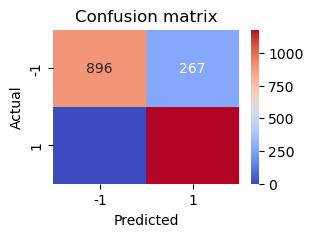

In [263]:
fetch_classification_report(actuals = y_train, predictions = knc.predict(x_train_pca_32), labels = y['Pass/Fail'].unique())

# HYPERPARAMETER TUNNING OF KNeighborsClassifier

In [271]:
knc_params = {'n_neighbors' : list(range(1, 50, 2))}

In [273]:
knc_best_est, knc_best_params = best_estimator(model = KNeighborsClassifier(), params = knc_params, x = x_train_pca_32, y = y_train)

--------Best score : 0.8367521367521367--------------
---------Best parameters : {'n_neighbors': 5}


# GaussianNB classifier

In [288]:
from sklearn.naive_bayes import GaussianNB

In [290]:
gnb = GaussianNB()

In [292]:
gnb.fit(x_train_pca_32, y_train)

GaussianNB()

Classification report
              precision    recall  f1-score   support

          -1       0.79      0.78      0.78      1163
           1       0.78      0.79      0.79      1177

    accuracy                           0.78      2340
   macro avg       0.78      0.78      0.78      2340
weighted avg       0.78      0.78      0.78      2340



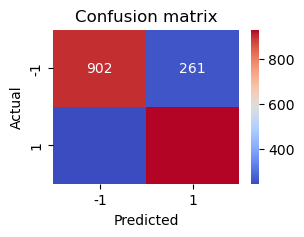

In [294]:
fetch_classification_report(actuals = y_train, predictions = gnb.predict(x_train_pca_32), labels = y['Pass/Fail'].unique())

# HYPERPARAMETER TUNNING OF GaussianNB

In [299]:
gnb_params = {'var_smoothing': np.logspace(0,-9, num=20)}

In [301]:
gnb_best_est, gnb_best_params = best_estimator(model = GaussianNB(), params = gnb_params, x = x_train_pca_32, y = y_train)

--------Best score : 0.7726495726495727--------------
---------Best parameters : {'var_smoothing': 1.8329807108324375e-05}


# DecisionTreeClassifier

In [304]:
from sklearn.tree import DecisionTreeClassifier

In [306]:
dt = DecisionTreeClassifier()

In [308]:
dt.fit(x_train_pca_32, y_train)

DecisionTreeClassifier()

Classification report
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1177

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340



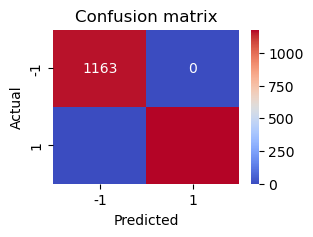

In [311]:
fetch_classification_report(actuals = y_train, predictions = dt.predict(x_train_pca_32), labels = y['Pass/Fail'].unique())

# HYPERPARAMETER TUNNING OF DecisionTreeClassifier

In [314]:
dt_params = {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_depth': list(range(3, 21)), 'min_samples_leaf': list(range(3, 21))}

In [316]:
dt_best_est, dt_best_params = best_estimator(model = DecisionTreeClassifier(), params = dt_params, x = x_train_pca_32, y = y_train)

--------Best score : 0.8068376068376069--------------
---------Best parameters : {'splitter': 'best', 'min_samples_leaf': 11, 'max_depth': 15, 'criterion': 'entropy'}


# BAGGING-CLASSIFIER

In [332]:
from sklearn.ensemble import BaggingClassifier

In [334]:
bc = BaggingClassifier()

In [323]:
bc.fit(x_train_pca_32, y_train)

BaggingClassifier()

Classification report
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      1163
           1       1.00      0.99      1.00      1177

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340



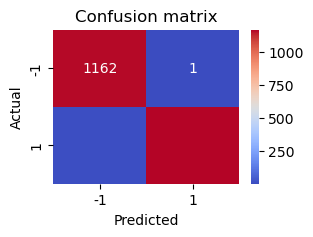

In [325]:
fetch_classification_report(actuals = y_train, predictions = bc.predict(x_train_pca_32), labels = y['Pass/Fail'].unique())

# HYPERPARAMETER TUNNING OF BAGGING-CLASSIFIER

In [328]:
bc_params = {'n_estimators': list(range(5, 50, 5)), 'max_features': list(range(4, 33, 4)), 'bootstrap_features': [True, False]}

In [340]:
bc_best_est, bc_best_params = best_estimator(model = BaggingClassifier(), params = bc_params, x = x_train_pca_32, y = y_train)

--------Best score : 0.9538461538461538--------------
---------Best parameters : {'n_estimators': 35, 'max_features': 20, 'bootstrap_features': True}


# AdaBoostClassifier

In [343]:
from sklearn.ensemble import AdaBoostClassifier

In [345]:
abc = AdaBoostClassifier()

In [347]:
abc.fit(x_train_pca_32, y_train)

AdaBoostClassifier()

Classification report
              precision    recall  f1-score   support

          -1       0.90      0.87      0.88      1163
           1       0.87      0.91      0.89      1177

    accuracy                           0.89      2340
   macro avg       0.89      0.89      0.89      2340
weighted avg       0.89      0.89      0.89      2340



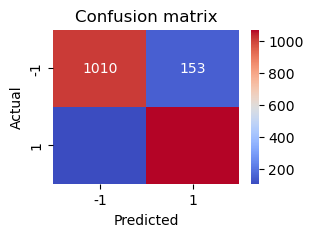

In [349]:
fetch_classification_report(actuals = y_train, predictions = abc.predict(x_train_pca_32), labels = y['Pass/Fail'].unique())

# HYPERPARAMETER TUNNING OF AdaBoostClassifer

In [352]:
abc_params = {'n_estimators': list(range(5, 50, 5))}

In [354]:
abc_best_estimator, abc_best_params = best_estimator(model = AdaBoostClassifier(), params = abc_params, x = x_train_pca_32, y = y_train)

--------Best score : 0.8341880341880342--------------
---------Best parameters : {'n_estimators': 45}


# Gradient Boosting Classifier

In [357]:
from sklearn.ensemble import GradientBoostingClassifier

In [359]:
gbc = GradientBoostingClassifier()

In [361]:
gbc.fit(x_train_pca_32, y_train)

GradientBoostingClassifier()

Classification report
              precision    recall  f1-score   support

          -1       0.99      0.96      0.97      1163
           1       0.96      0.99      0.97      1177

    accuracy                           0.97      2340
   macro avg       0.97      0.97      0.97      2340
weighted avg       0.97      0.97      0.97      2340



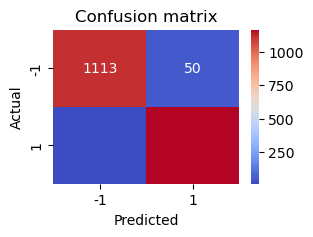

In [363]:
fetch_classification_report(actuals = y_train, predictions = gbc.predict(x_train_pca_32), labels = y['Pass/Fail'].unique())

# HYPERPARAMETER TUNNING OF GradientBoostingClassifier

In [366]:
gbc_params = {'loss': ['log_loss', 'exponential'], 'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(3, 21))}

In [368]:
gbc_best_estimator, gbc_best_params = best_estimator(model = GradientBoostingClassifier(), params = gbc_params, x = x_train_pca_32, y = y_train)

--------Best score : 0.9175213675213675--------------
---------Best parameters : {'n_estimators': 35, 'max_depth': 8, 'loss': 'exponential'}


# RandomForestClassifier

In [373]:
from sklearn.ensemble import RandomForestClassifier

In [375]:
rfc = RandomForestClassifier()

In [377]:
rfc.fit(x_train_pca_32, y_train)

RandomForestClassifier()

Classification report
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1177

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340



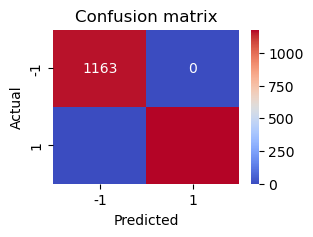

In [379]:
fetch_classification_report(actuals = y_train, predictions = rfc.predict(x_train_pca_32), labels = y['Pass/Fail'].unique())

# HYPERPARAMETER TUNNING OF RandomForestClassifier

In [384]:
rfc_params = {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': list(range(10, 100, 10)), 'max_depth': list(range(3, 21))}

In [386]:
rfc_best_est, rfc_best_params = best_estimator(model = RandomForestClassifier(), params = rfc_params, x = x_train_pca_32, y = y_train)

--------Best score : 0.9551282051282051--------------
---------Best parameters : {'n_estimators': 50, 'max_depth': 18, 'criterion': 'gini'}


In [400]:
def fetch_model_scores(x, y, cv = False):
    model_scores = list()
    kf_cv = KFold(n_splits=5, shuffle = True, random_state = 1) if cv else None
    for model in [rfc_best_est, gbc_best_estimator, abc_best_estimator, bc_best_est, dt_best_est, gnb_best_est, knc_best_est, svc_best_est, lr_pca_32]:
        cr = metrics.classification_report(y, model.predict(x), labels = y['Pass/Fail'].unique(), output_dict = True)
        scores = {
            'model' : model.__class__.__name__,
            'accuracy' : cr['accuracy'],
            'precision' : cr['weighted avg']['precision'],
            'recall' : cr['weighted avg']['recall'],
            'f1_score' : cr['weighted avg']['f1-score'],
        }

        if kf_cv:
            kf_cv_score = cross_val_score(model, x , y , cv = kf_cv)
            scores.update({
                'cv_mean' : kf_cv_score.mean(),
                'cv_std' : kf_cv_score.std()
            })
        model_scores.append(scores)
    return pd.DataFrame(model_scores)

In [402]:
print(f'---------Training performance of each model---------------')
fetch_model_scores(x = x_train_pca_32, y = y_train, cv = True)

---------Training performance of each model---------------


model  accuracy  precision  recall  f1_score  cv_mean  \
0      RandomForestClassifier     1.000      1.000   1.000     1.000    0.960   
1  GradientBoostingClassifier     1.000      1.000   1.000     1.000    0.929   
2          AdaBoostClassifier     0.894      0.894   0.894     0.894    0.835   
3           BaggingClassifier     1.000      1.000   1.000     1.000    0.952   
4      DecisionTreeClassifier     0.933      0.934   0.933     0.933    0.805   
5                  GaussianNB     0.783      0.783   0.783     0.783    0.770   
6        KNeighborsClassifier     0.886      0.907   0.886     0.884    0.838   
7                         SVC     1.000      1.000   1.000     1.000    0.988   
8          LogisticRegression     0.780      0.780   0.780     0.780    0.773   

   cv_std  
0   0.015  
1   0.012  
2   0.012  
3   0.016  
4   0.003  
5   0.019  
6   0.012  
7   0.003  
8   0.007

In [407]:
print(f'-----------Testing performance of each model------------------')
fetch_model_scores(x = x_test_pca_32, y = y_test)

-----------Testing performance of each model------------------


model  accuracy  precision  recall  f1_score
0      RandomForestClassifier     0.964      0.965   0.964     0.964
1  GradientBoostingClassifier     0.937      0.940   0.937     0.937
2          AdaBoostClassifier     0.841      0.841   0.841     0.841
3           BaggingClassifier     0.962      0.963   0.962     0.962
4      DecisionTreeClassifier     0.840      0.844   0.840     0.839
5                  GaussianNB     0.765      0.764   0.765     0.764
6        KNeighborsClassifier     0.834      0.876   0.834     0.831
7                         SVC     0.986      0.986   0.986     0.986
8          LogisticRegression     0.763      0.764   0.763     0.763

# INSIGHTS

### we can notice that SVC is performing better than other models with an accuracy of 98.6%

In [419]:
from sklearn.pipeline import Pipeline

In [428]:
pipeline = Pipeline(
    [
        ('scalar' , StandardScaler()),
        ('pca' , PCA(n_components = 32)),
        ('svc' , SVC(**svc_best_params))
    ]
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('pca', PCA(n_components=32)),
                ('svc', SVC(C=10, gamma=0.1))])

Classification report
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       300
           1       0.99      0.99      0.99       286

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



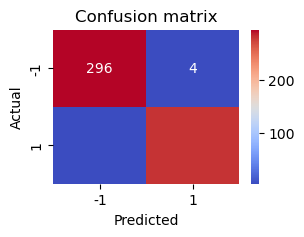

In [442]:
fetch_classification_report(actuals = y_test, predictions = pipeline.predict(X_test), labels = y['Pass/Fail'].unique())

# SAVING THE MODEL AS PICKLE FORMAT

In [445]:
import pickle

In [447]:
with open('SECOM_svc_model.pkl', 'wb') as f:
    pickle.dump(pipeline , f)

In [524]:
x_bal.shape, y_bal.shape

((2926, 63), (2926, 1))

In [536]:
preprocessed_data = pd.concat([x_bal, y_bal], axis=1)

preprocessed_data.head()

14        21       22    26     28     32    33     38     40    56  \
0  7.956 -5419.000 2916.500 1.773 64.233 83.397 9.513 86.956 61.290 0.932   
1 10.155 -5441.500 2604.250 2.014 68.422 84.905 9.800 87.524 78.250 0.932   
2  9.516 -5447.750 2701.750 2.030 67.133 84.757 8.659 84.733 14.370 0.914   
3  9.605 -5468.250 2648.250 2.004 62.933 84.910 8.679 86.687 76.900 0.914   
4 10.566 -5476.250 2635.250 1.991 62.833 86.327 8.768 86.147 76.390 0.930   

     58      59     63     64     65      68      70     76     79       90  \
0 4.706  -1.726 16.145 21.726 29.537 148.601 608.170 -0.021 -0.008 8671.930   
1 4.682   0.807 10.904 19.193 27.630 154.371 620.358 -0.020 -0.036 8407.030   
2 4.587  23.825 11.302 16.175 24.283 145.800 625.964 -0.033 -0.005 9317.170   
3 4.587  24.379 13.560 15.621 23.474 147.655 625.294 -0.046  0.068 8205.700   
4 4.641 -12.294 21.978 32.294 44.150 146.664 645.764  0.018  0.003 9014.460   

      95    100    103   114    121   122    123    124   125   126    129  \
0  0.000  0.000 -0.004 0.000 15.880 2.639 15.940 15.930 0.866 3.353 -0.047   
1  0.000 -0.000 -0.004 0.000 15.880 2.541 15.910 15.880 0.870 2.771 -0.095   
2  0.000  0.001 -0.003 0.000 15.900 2.882 15.940 15.950 0.880 3.094 -0.189   
3  0.000 -0.000 -0.006 0.000 15.550 3.132 15.610 15.590 1.366 2.480  0.284   
4 -0.000  0.000 -0.004 0.000 15.750 3.148 15.730 15.710 0.946 3.027 -0.568   

    130      133      159     160   163   164   166    180    183   196  \
0 0.724 1000.726 1017.000 967.000 0.090 0.048 2.000 20.950 16.713 5.380   
1 0.812  998.108  568.000  59.000 0.112 0.115 2.200 17.990 16.358 3.740   
2 0.819  998.444  562.000 788.000 0.187 0.117 2.100 17.780 22.912 5.090   
3 0.724  980.451  859.000 355.000 0.068 0.108 1.700 16.220 22.562 5.920   
4 0.778  993.127  699.000 283.000 0.147 0.040 3.900 15.240 37.715 5.520   

     197    199    200    205   210   280   316   337   348   365    430  \
0 20.100 10.620 10.300  8.640 0.077 0.020 6.270 1.599 0.021 0.017 18.767   
1 19.590 11.650  8.020  8.960 0.057 0.017 5.652 1.151 0.014 0.005 10.438   
2 19.750  9.710 16.730 13.300 0.034 0.015 5.725 1.548 0.011 0.005 10.316   
3 23.600 10.630 13.560  9.560 0.125 0.011 5.444 1.732 0.041 0.005 15.709   
4 15.760 10.710 19.770  9.090 0.091 0.012 4.896 1.622 0.025 0.006 12.764   

     431    434    460     468    471     510     511   542   543    551  \
0 33.156 10.050 29.939 311.638  9.775  64.671   0.000 0.110 0.008  0.780   
1  2.265  8.634 40.447 463.288 10.221 141.436   0.000 0.110 0.008  1.330   
2 29.166 14.250 32.359  21.364  8.398 240.777 244.275 0.110 0.008  0.850   
3 13.405  5.176 27.682  24.283  9.149 113.559   0.000 0.110 0.008 39.330   
4 10.739 11.406 30.892  44.898  7.436 148.066   0.000 0.110 0.008  1.980   

    573  Pass/Fail  
0 0.316         -1  
1 0.265         -1  
2 0.188          1  
3 0.174         -1  
4 0.222         -1

In [538]:
preprocessed_data.shape

(2926, 64)

In [540]:
preprocessed_data.to_csv('preprocessed_data.csv', header = True, index = False)